In [1]:
import pandas as pd

# Cargar el archivo CSV
datos = pd.read_csv('roberta_embeddings.csv')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(datos.head())

          0         1         2         3         4         5         6  \
0  0.078024  0.197045 -0.020739  0.094564  0.128243  0.240600  0.061715   
1  0.052997  0.107680 -0.061091  0.094924  0.126485  0.117220  0.073628   
2  0.006776  0.080573  0.000706  0.088957  0.300749  0.077344  0.004417   
3  0.085982  0.116390 -0.055298  0.097156  0.335350  0.113604  0.056604   
4  0.068320  0.085632  0.012033  0.116684  0.203147  0.144610  0.073214   

          7         8         9  ...       759       760       761       762  \
0  0.006835 -0.033821 -0.023071  ... -0.006843 -0.031174  0.046497  0.116659   
1  0.067239 -0.050363  0.002889  ... -0.070450  0.000615  0.063038  0.083126   
2  0.052031 -0.048849 -0.019900  ... -0.059084 -0.078838  0.081961  0.086060   
3  0.096919 -0.015422  0.023740  ... -0.076255  0.014202  0.088253  0.141161   
4  0.088204  0.010259 -0.019471  ... -0.044627 -0.060569  0.031133  0.050084   

        763       764       765       766       767      cat_one_hot

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [3]:
def random_forest_classification(dataset,n_estimators,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_random_forest = RandomForestClassifier(n_estimators=n_estimators)
        
        # Entrenar el modelo de regresión logística
        modelo_random_forest.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_random_forest.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "Random_Forest_val_sim_" + str(n_estimators) + "_estimators"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/random_forest_roberta_embedding_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_random_forest, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_random_forest = RandomForestClassifier(n_estimators=n_estimators)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_random_forest, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "Random_Forest_val_cruz_" + str(n_estimators) + "_estimators"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/random_forest_roberta_embedding__val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_random_forest, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_sim_1_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.1.png


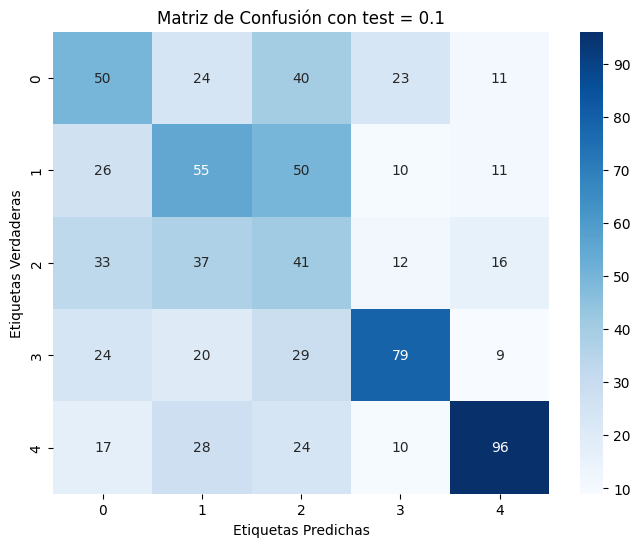

Exactitud del modelo: 0.41419354838709677
Precisión del modelo: 0.4434608994924724
Recall del modelo: 0.41419354838709677
Puntuación F1 del modelo: 0.42548984963216246
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.2.png


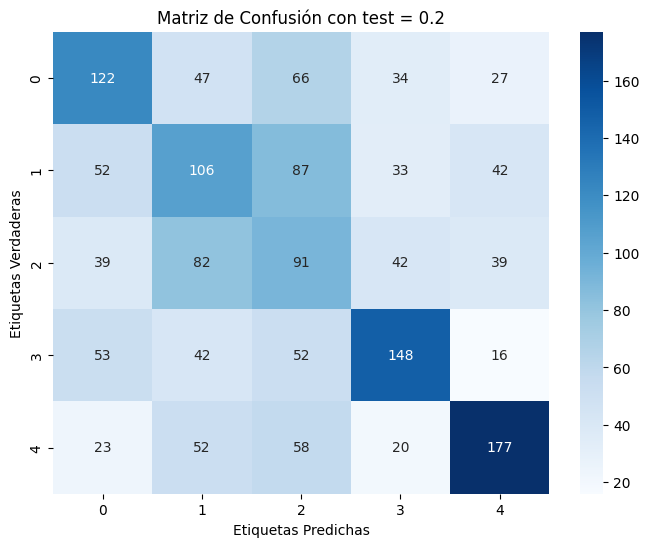

Exactitud del modelo: 0.4154838709677419
Precisión del modelo: 0.42812500091618244
Recall del modelo: 0.4154838709677419
Puntuación F1 del modelo: 0.42071148844086215
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.3.png


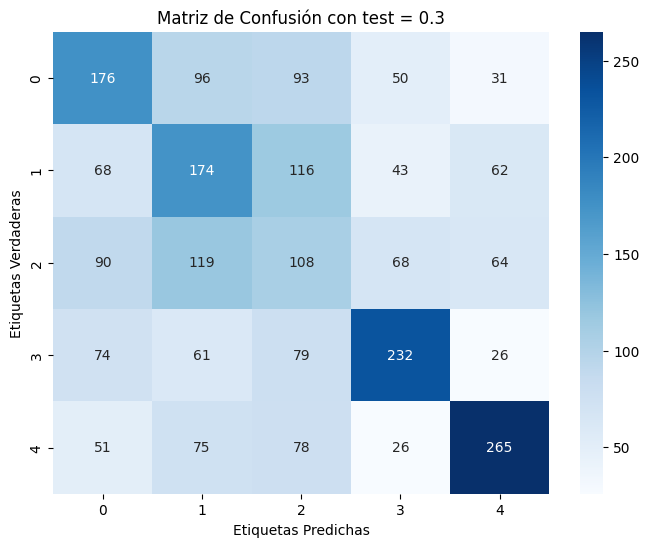

Exactitud del modelo: 0.410752688172043
Precisión del modelo: 0.421900162547383
Recall del modelo: 0.410752688172043
Puntuación F1 del modelo: 0.4153271496158194
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.4.png


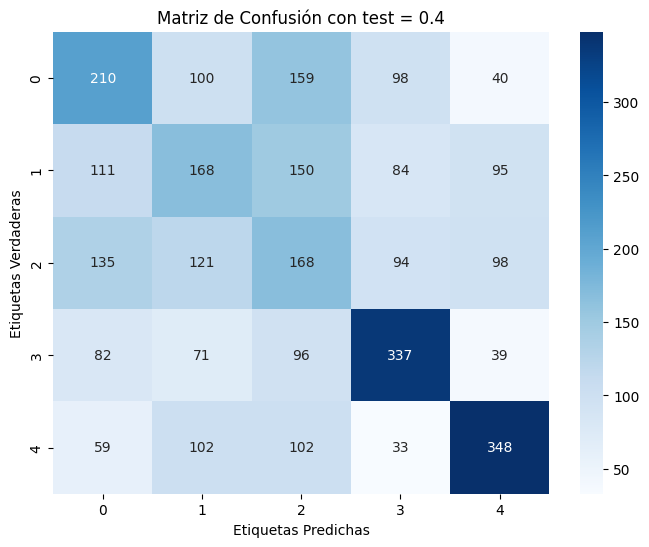

Exactitud del modelo: 0.3970967741935484
Precisión del modelo: 0.39874190082508765
Recall del modelo: 0.3970967741935484
Puntuación F1 del modelo: 0.39764873657059846
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.5.png


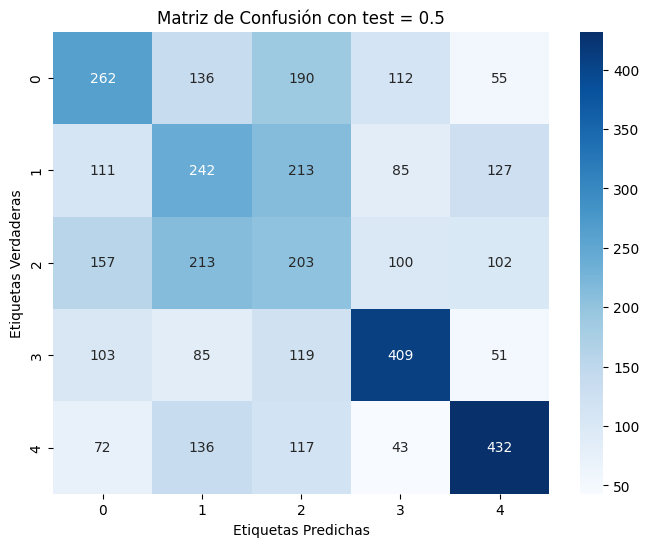

Exactitud del modelo: 0.39948387096774196
Precisión del modelo: 0.4048286853199671
Recall del modelo: 0.39948387096774196
Puntuación F1 del modelo: 0.4018942822939703
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.6.png


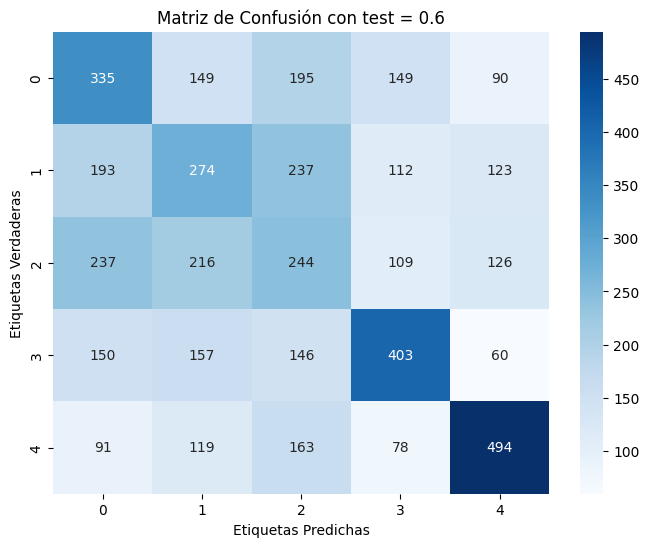

Exactitud del modelo: 0.3763440860215054
Precisión del modelo: 0.3815701435139312
Recall del modelo: 0.3763440860215054
Puntuación F1 del modelo: 0.3785546979265754
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.7.png


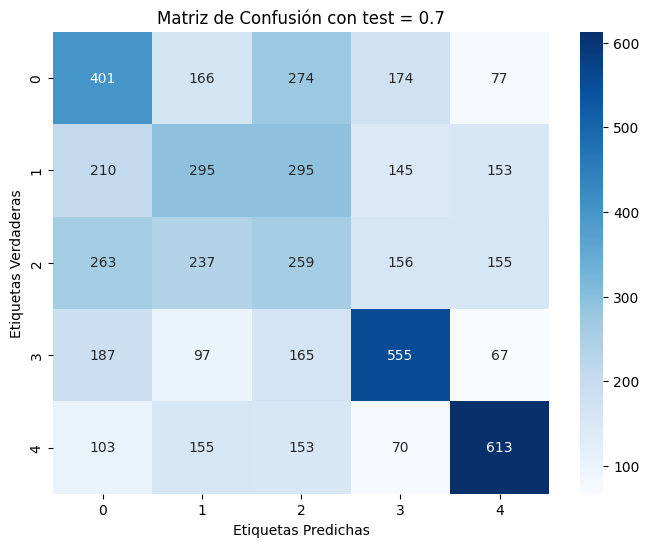

Exactitud del modelo: 0.3913364055299539
Precisión del modelo: 0.3924493467930913
Recall del modelo: 0.3913364055299539
Puntuación F1 del modelo: 0.39142084532165244
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.8.png


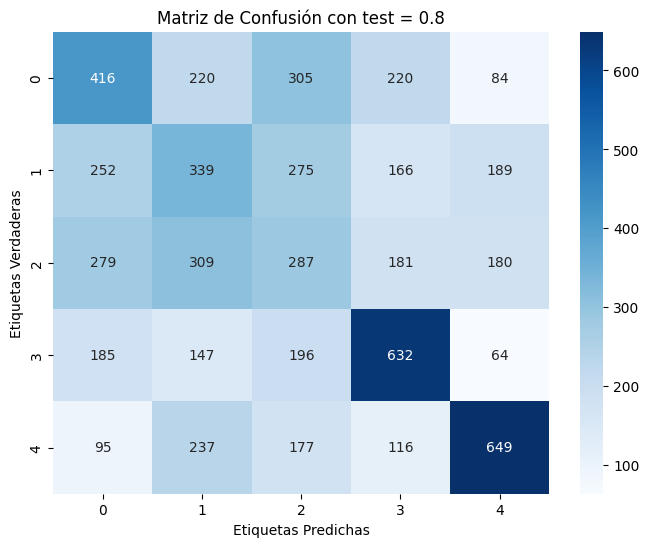

Exactitud del modelo: 0.3746774193548387
Precisión del modelo: 0.3768001547415045
Recall del modelo: 0.3746774193548387
Puntuación F1 del modelo: 0.37538560847690594
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.9.png


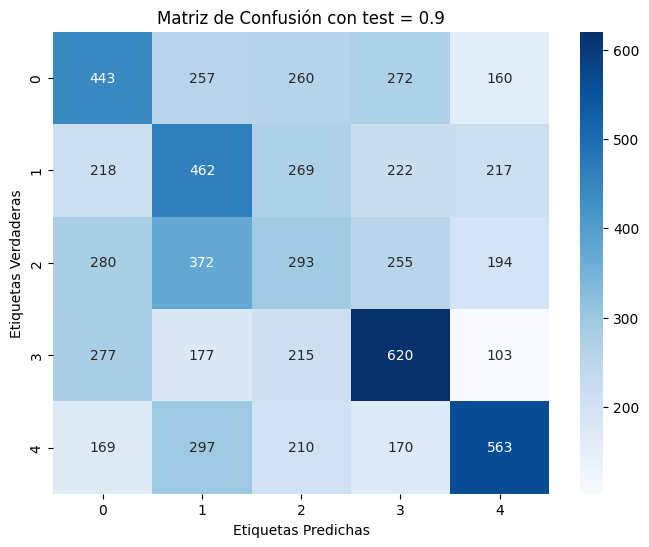

Exactitud del modelo: 0.34136200716845877
Precisión del modelo: 0.34178459923447946
Recall del modelo: 0.34136200716845877
Puntuación F1 del modelo: 0.34063308159200184
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_1_estimators/random_forest_roberta_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_cruz_1_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_2.png


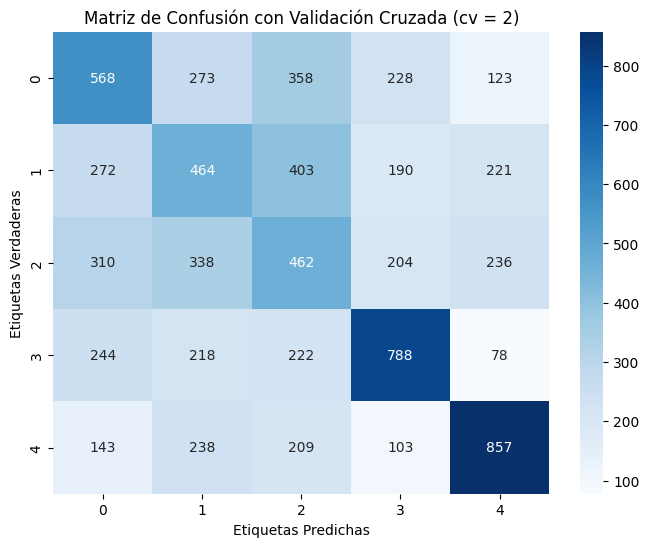

Exactitud media: 0.40503225806451615
Precisión media: 0.407687989521334
Recall media: 0.40503225806451615
Puntuación F1 media: 0.40626608898168387
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_3.png


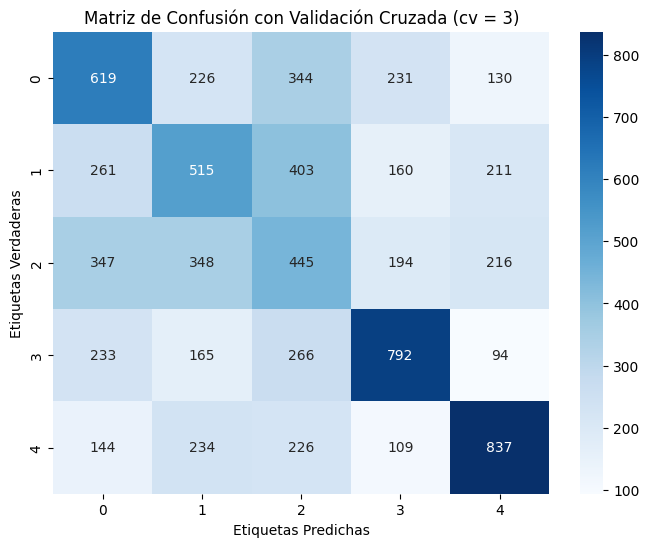

Exactitud media: 0.41393548387096774
Precisión media: 0.41834771688876754
Recall media: 0.41393548387096774
Puntuación F1 media: 0.4159033615202976
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_4.png


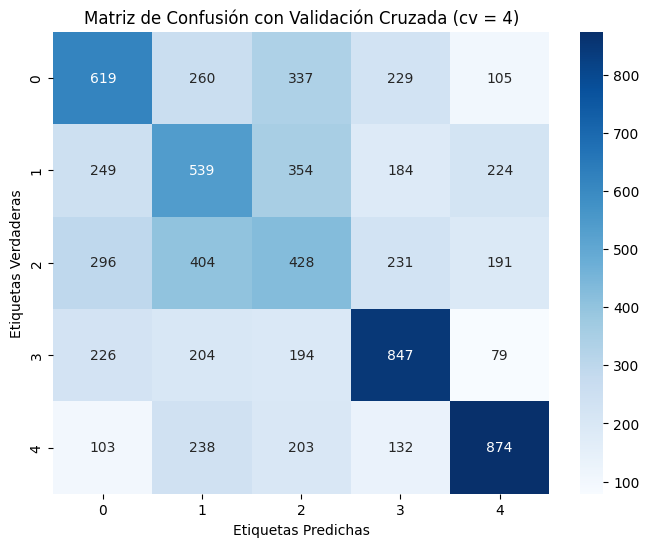

Exactitud media: 0.42670967741935484
Precisión media: 0.4279605866733166
Recall media: 0.42670967741935484
Puntuación F1 media: 0.4271083662625326
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_5.png


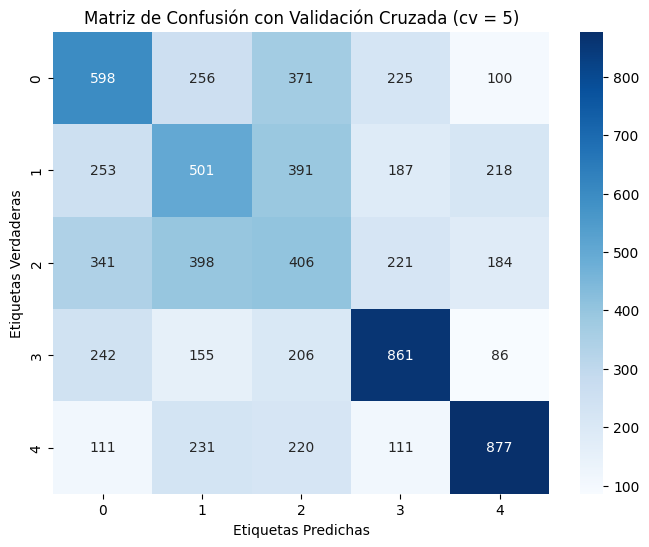

Exactitud media: 0.4184516129032258
Precisión media: 0.42039142670230517
Recall media: 0.4184516129032258
Puntuación F1 media: 0.41928491519386535
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_6.png


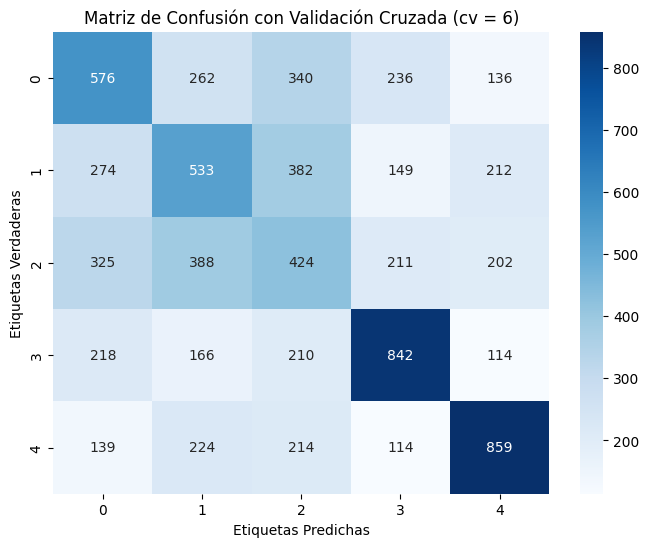

Exactitud media: 0.41729032258064513
Precisión media: 0.41828598794169036
Recall media: 0.41729032258064513
Puntuación F1 media: 0.417770991052131
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_7.png


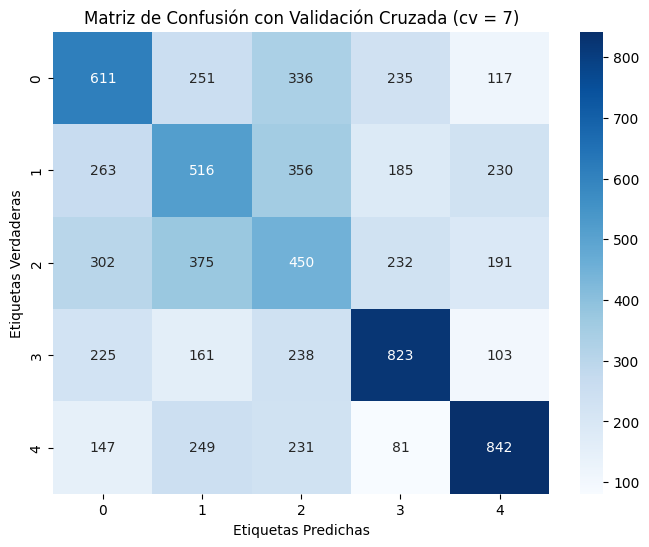

Exactitud media: 0.4183225806451613
Precisión media: 0.4206390048729034
Recall media: 0.4183225806451613
Puntuación F1 media: 0.4194049081896046
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_8.png


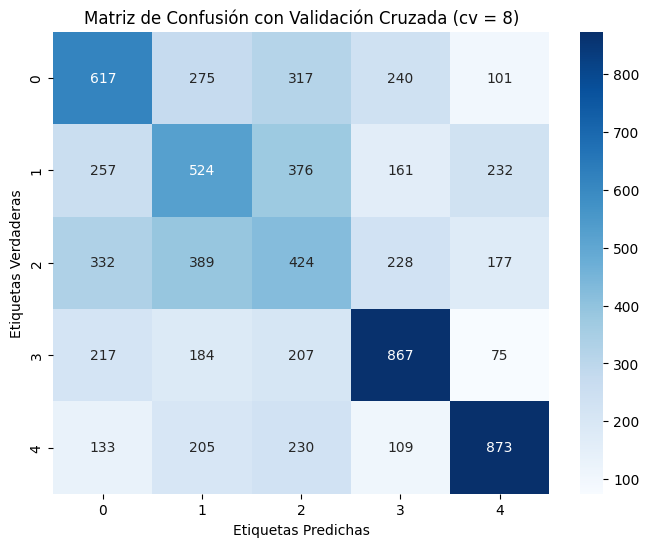

Exactitud media: 0.4264516129032258
Precisión media: 0.42812053162624397
Recall media: 0.4264516129032258
Puntuación F1 media: 0.4271385742593682
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_9.png


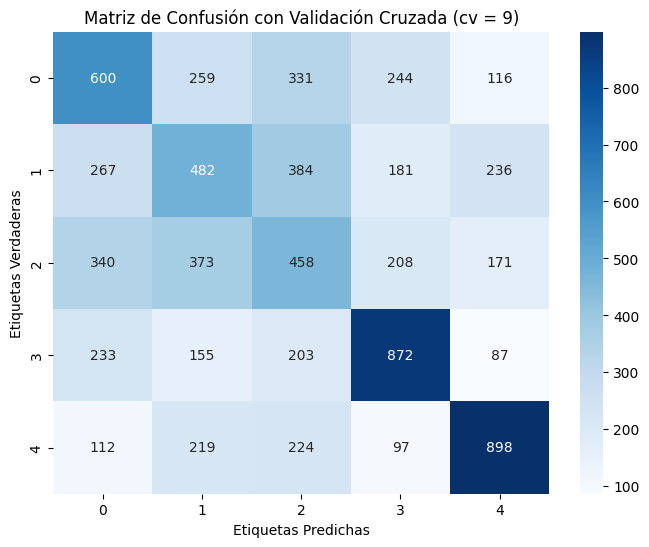

Exactitud media: 0.4270967741935484
Precisión media: 0.42731659720137455
Recall media: 0.4270967741935484
Puntuación F1 media: 0.4271132659054701
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_10.png


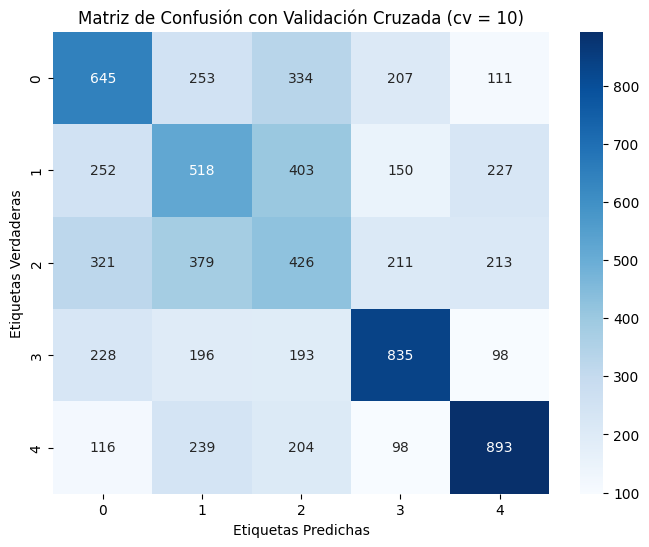

Exactitud media: 0.428
Precisión media: 0.42964735456397257
Recall media: 0.428
Puntuación F1 media: 0.4287846219827673
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_1_estimators/random_forest_roberta_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_sim_2_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.1.png


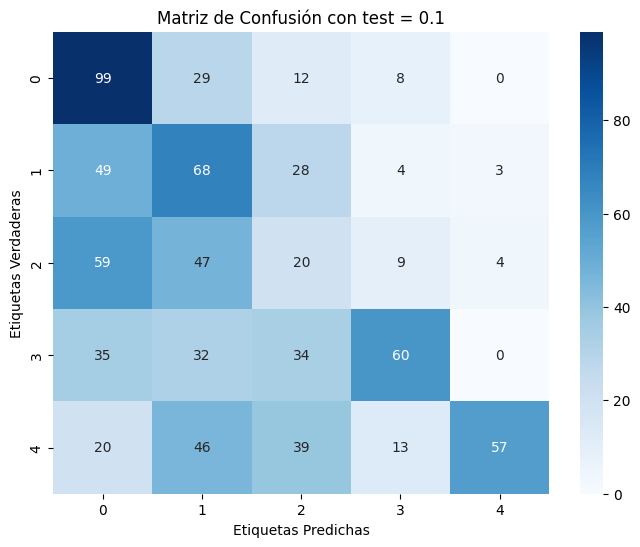

Exactitud del modelo: 0.39225806451612905
Precisión del modelo: 0.49291588486013194
Recall del modelo: 0.39225806451612905
Puntuación F1 del modelo: 0.39538655961891106
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.2.png


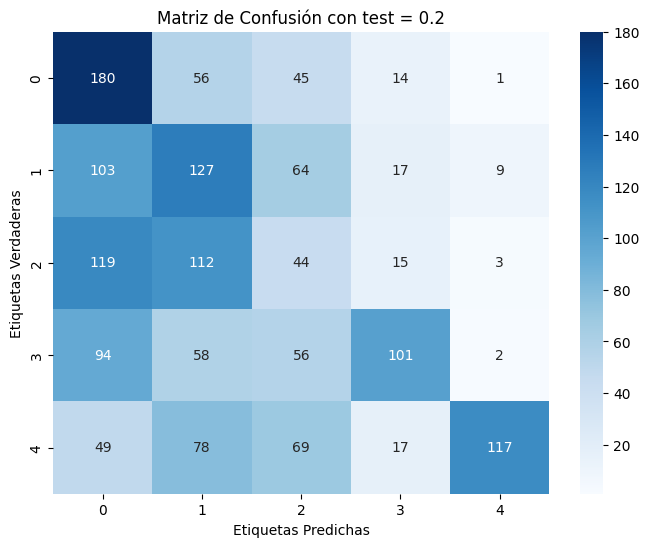

Exactitud del modelo: 0.3670967741935484
Precisión del modelo: 0.4661021934204398
Recall del modelo: 0.3670967741935484
Puntuación F1 del modelo: 0.3738650942789773
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.3.png


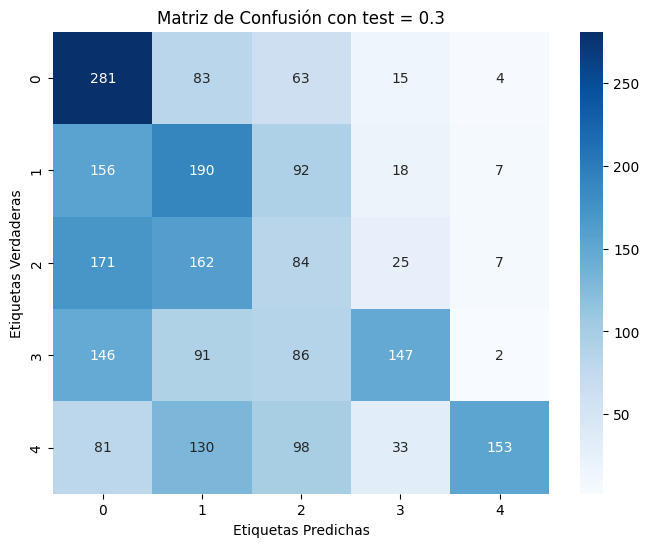

Exactitud del modelo: 0.36774193548387096
Precisión del modelo: 0.4742618178607482
Recall del modelo: 0.36774193548387096
Puntuación F1 del modelo: 0.3705817846970186
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.4.png


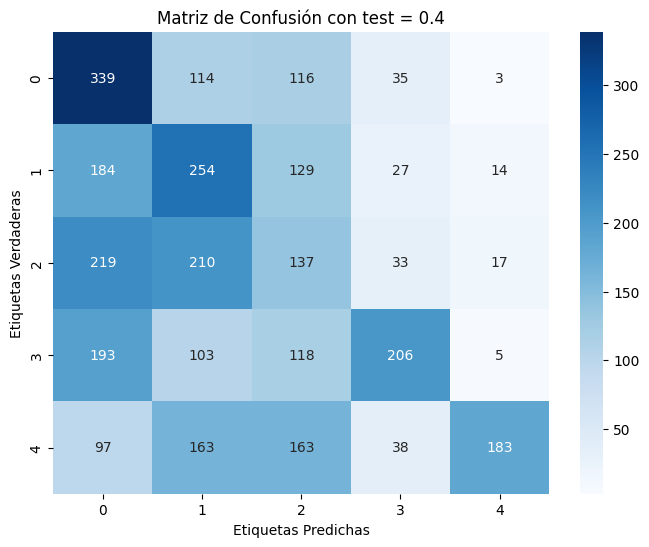

Exactitud del modelo: 0.36096774193548387
Precisión del modelo: 0.4581661951070659
Recall del modelo: 0.36096774193548387
Puntuación F1 del modelo: 0.3661514012535753
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.5.png


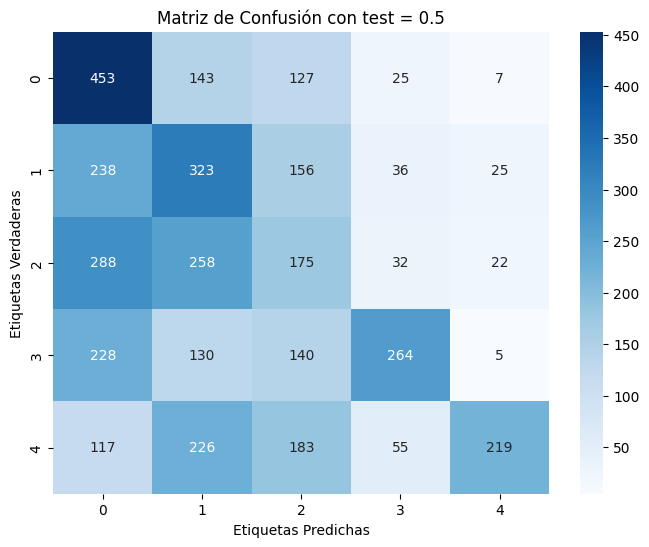

Exactitud del modelo: 0.37006451612903224
Precisión del modelo: 0.4609925784026485
Recall del modelo: 0.37006451612903224
Puntuación F1 del modelo: 0.3722273264372916
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.6.png


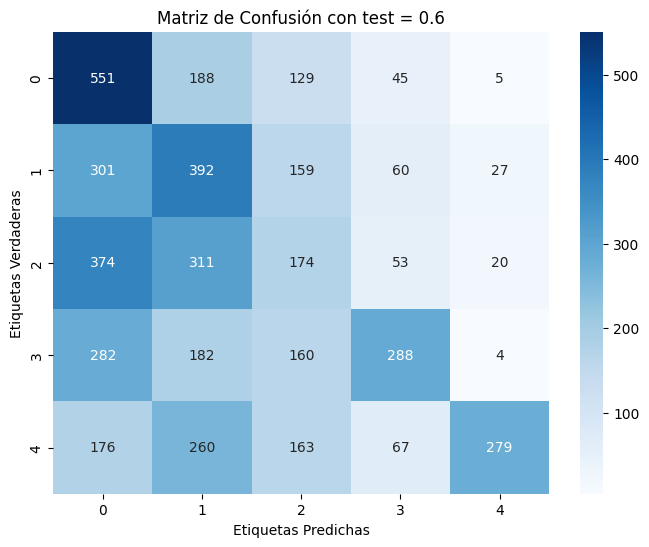

Exactitud del modelo: 0.3621505376344086
Precisión del modelo: 0.44824966051680926
Recall del modelo: 0.3621505376344086
Puntuación F1 del modelo: 0.3619120666762256
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.7.png


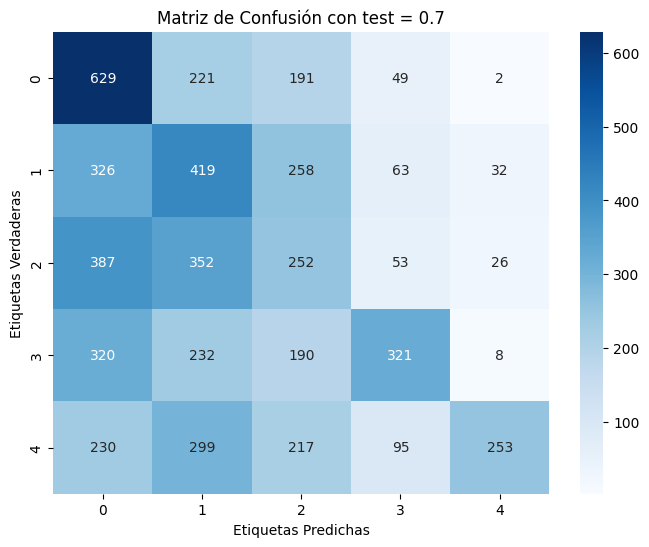

Exactitud del modelo: 0.34543778801843317
Precisión del modelo: 0.4354734993370096
Recall del modelo: 0.34543778801843317
Puntuación F1 del modelo: 0.34404647824954054
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.8.png


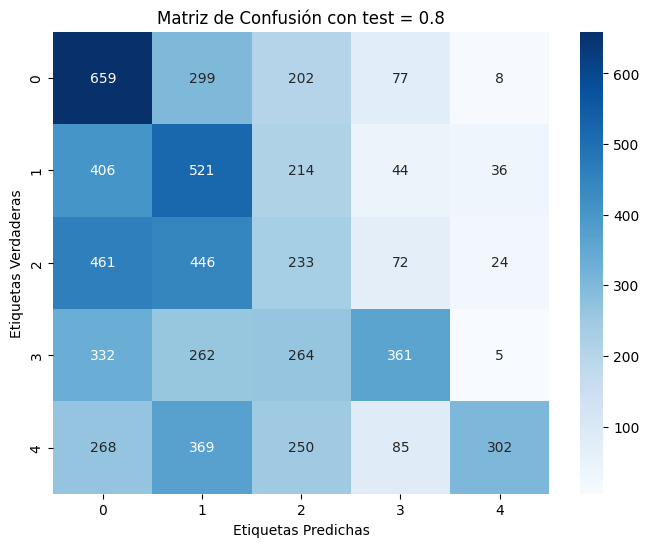

Exactitud del modelo: 0.33483870967741935
Precisión del modelo: 0.4332851827707248
Recall del modelo: 0.33483870967741935
Puntuación F1 del modelo: 0.3348239165062067
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.9.png


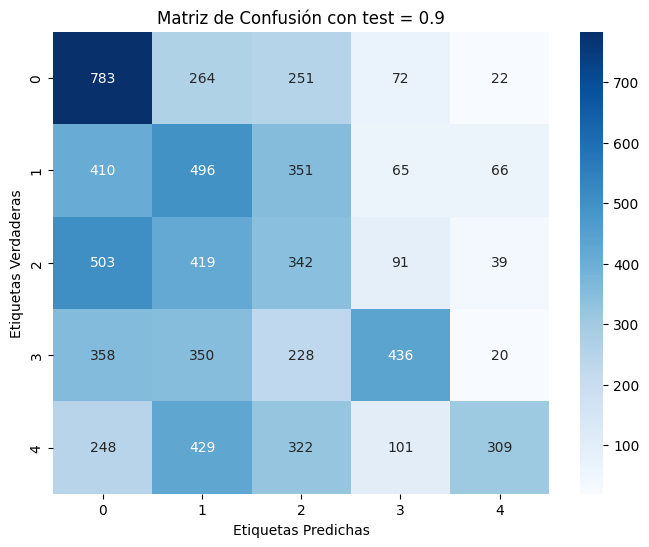

Exactitud del modelo: 0.3392114695340502
Precisión del modelo: 0.4146697652195459
Recall del modelo: 0.3392114695340502
Puntuación F1 del modelo: 0.3385531408314715
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_2_estimators/random_forest_roberta_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_cruz_2_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_2.png


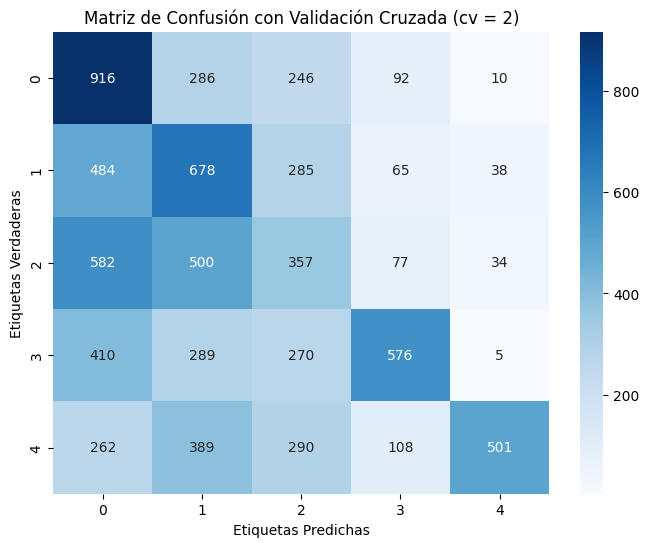

Exactitud media: 0.39070967741935486
Precisión media: 0.47754095617937997
Recall media: 0.39070967741935486
Puntuación F1 media: 0.39533036975367597
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_3.png


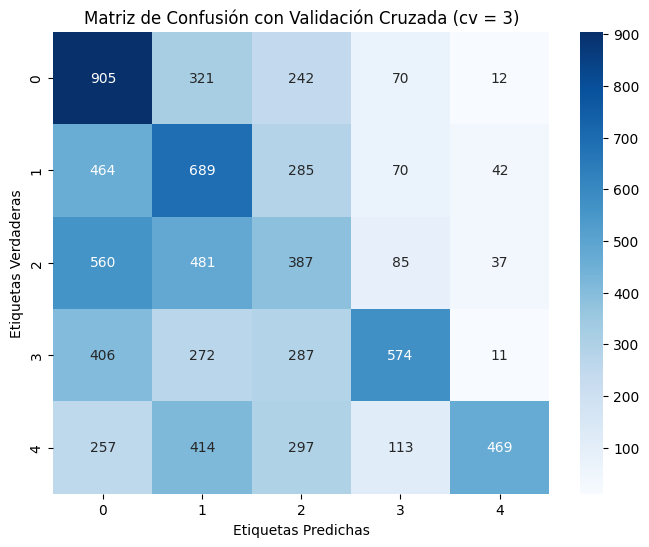

Exactitud media: 0.3901935483870968
Precisión media: 0.47494765332984434
Recall media: 0.3901935483870968
Puntuación F1 media: 0.39383802740087887
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_4.png


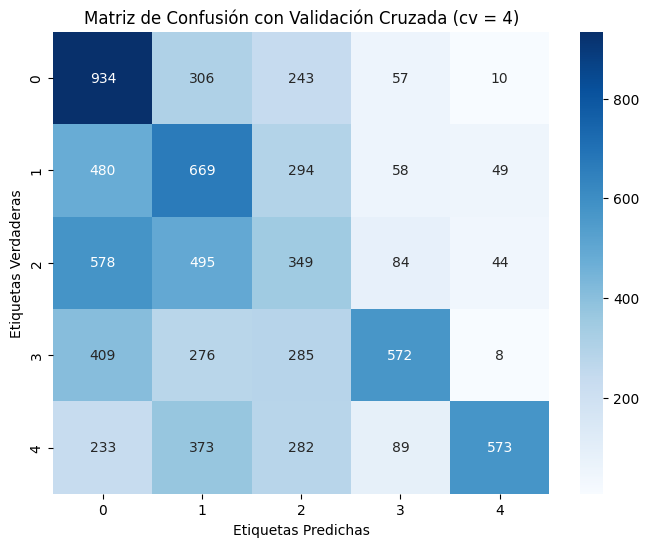

Exactitud media: 0.39961290322580645
Precisión media: 0.48266740313581724
Recall media: 0.39961290322580645
Puntuación F1 media: 0.4062487935147948
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_5.png


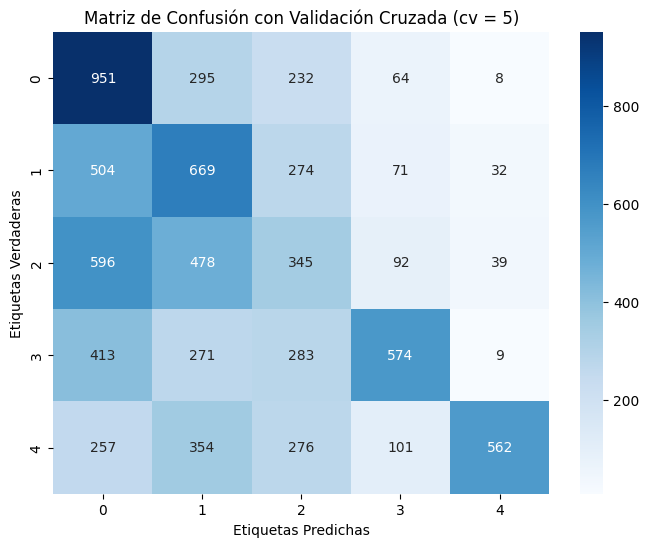

Exactitud media: 0.4001290322580645
Precisión media: 0.48376424110382704
Recall media: 0.4001290322580645
Puntuación F1 media: 0.4054910436252244
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_6.png


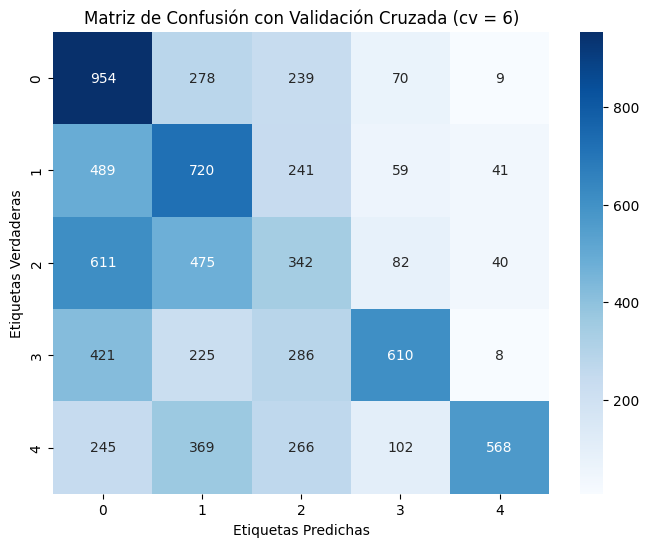

Exactitud media: 0.4121290322580645
Precisión media: 0.4923431531299325
Recall media: 0.4121290322580645
Puntuación F1 media: 0.4169695691717456
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_7.png


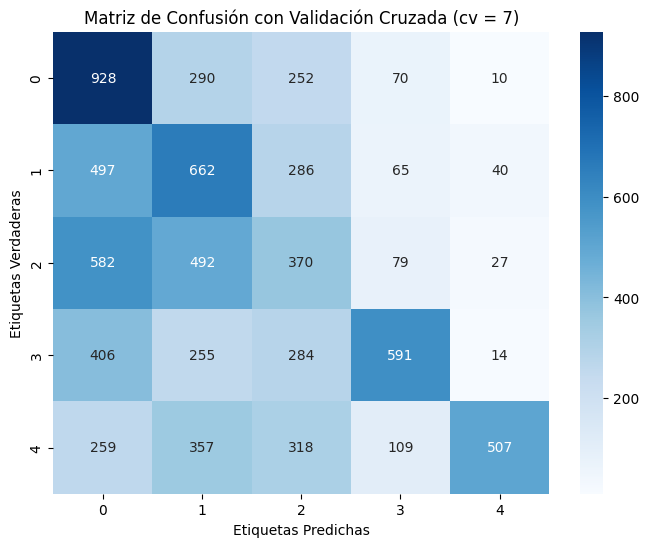

Exactitud media: 0.3945806451612903
Precisión media: 0.4817514679313987
Recall media: 0.3945806451612903
Puntuación F1 media: 0.40007456314271056
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_8.png


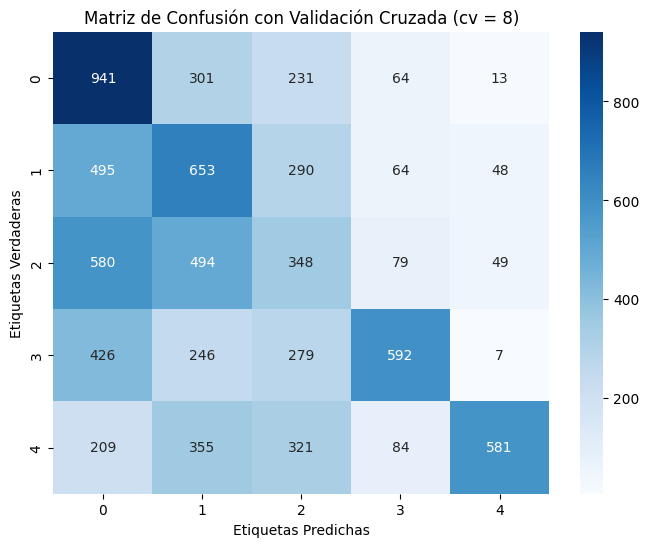

Exactitud media: 0.4019354838709677
Precisión media: 0.4826736368639902
Recall media: 0.4019354838709677
Puntuación F1 media: 0.4089905971510693
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_9.png


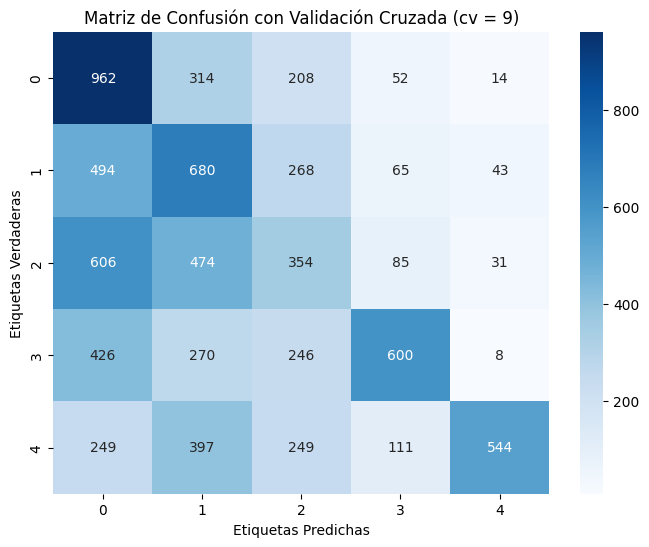

Exactitud media: 0.40516129032258064
Precisión media: 0.4888649711509418
Recall media: 0.40516129032258064
Puntuación F1 media: 0.4096275413886252
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_10.png


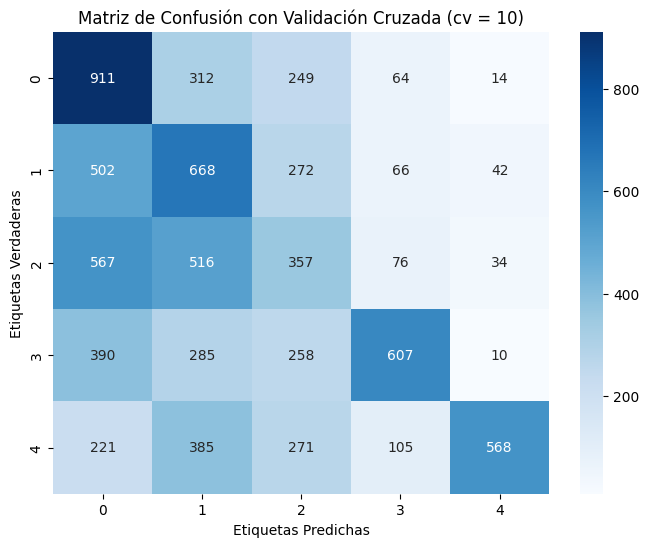

Exactitud media: 0.40141935483870966
Precisión media: 0.4850510143302192
Recall media: 0.40141935483870966
Puntuación F1 media: 0.4090094108626469
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_2_estimators/random_forest_roberta_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_sim_3_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.1.png


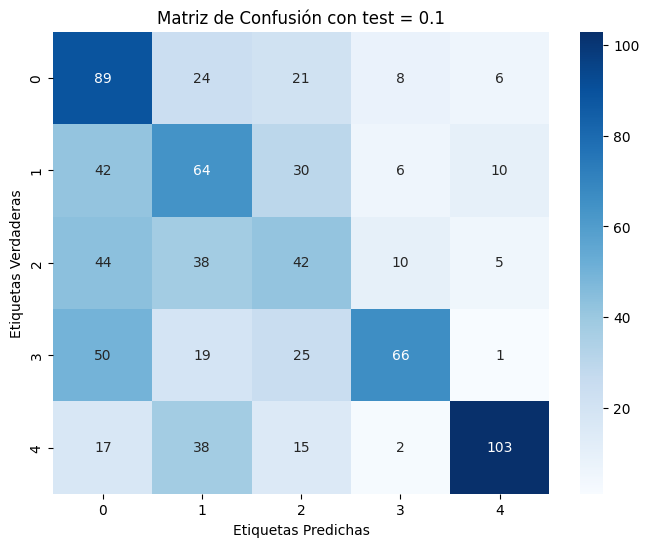

Exactitud del modelo: 0.4696774193548387
Precisión del modelo: 0.5305586565852596
Recall del modelo: 0.4696774193548387
Puntuación F1 del modelo: 0.48092834470183027
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.2.png


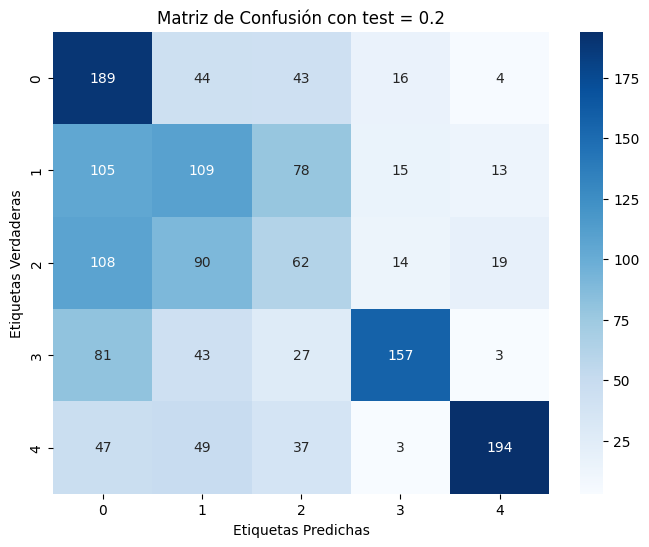

Exactitud del modelo: 0.4587096774193548
Precisión del modelo: 0.5136549128860596
Recall del modelo: 0.4587096774193548
Puntuación F1 del modelo: 0.4683350805960051
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.3.png


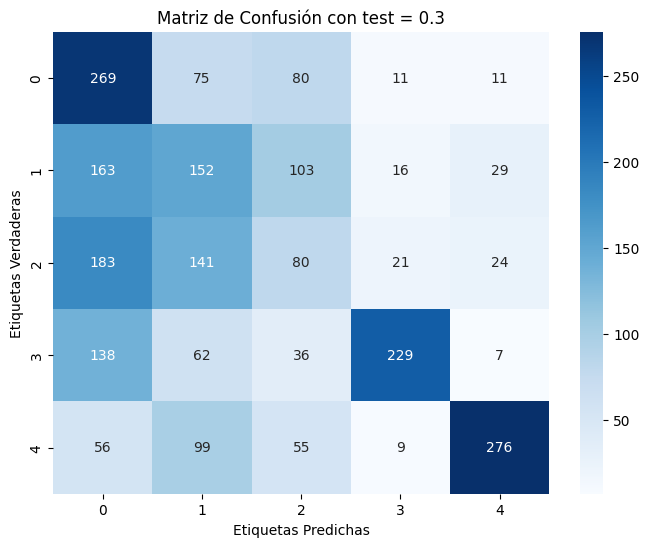

Exactitud del modelo: 0.43268817204301074
Precisión del modelo: 0.4965383343195265
Recall del modelo: 0.43268817204301074
Puntuación F1 del modelo: 0.4439788845750823
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.4.png


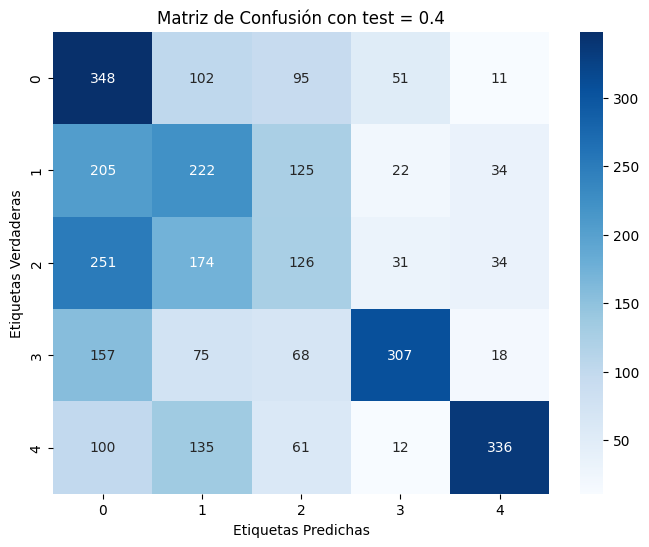

Exactitud del modelo: 0.43193548387096775
Precisión del modelo: 0.48595964477667636
Recall del modelo: 0.43193548387096775
Puntuación F1 del modelo: 0.44151496122195977
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.5.png


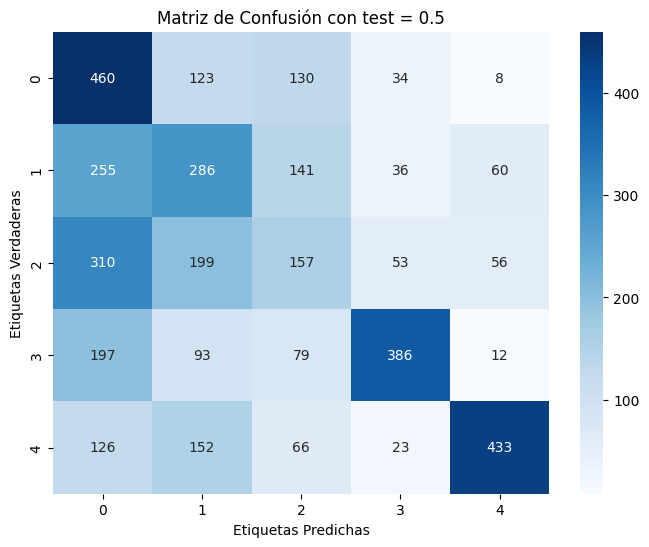

Exactitud del modelo: 0.4443870967741935
Precisión del modelo: 0.4893255659082396
Recall del modelo: 0.4443870967741935
Puntuación F1 del modelo: 0.450466783417661
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.6.png


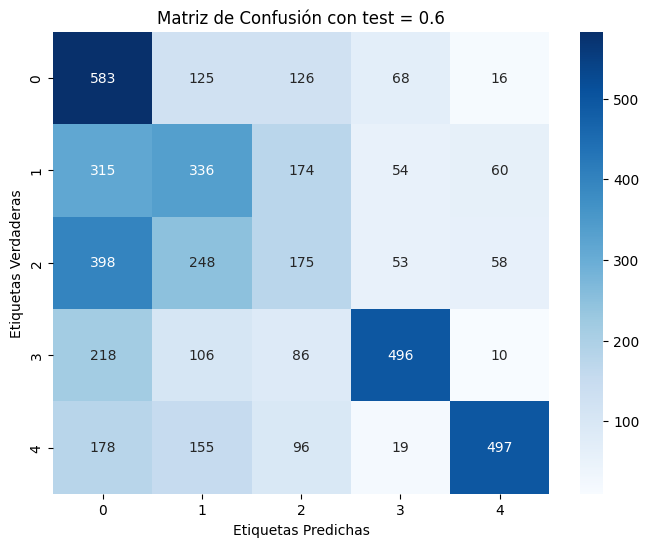

Exactitud del modelo: 0.44881720430107525
Precisión del modelo: 0.4905343365749936
Recall del modelo: 0.44881720430107525
Puntuación F1 del modelo: 0.45247360027355316
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.7.png


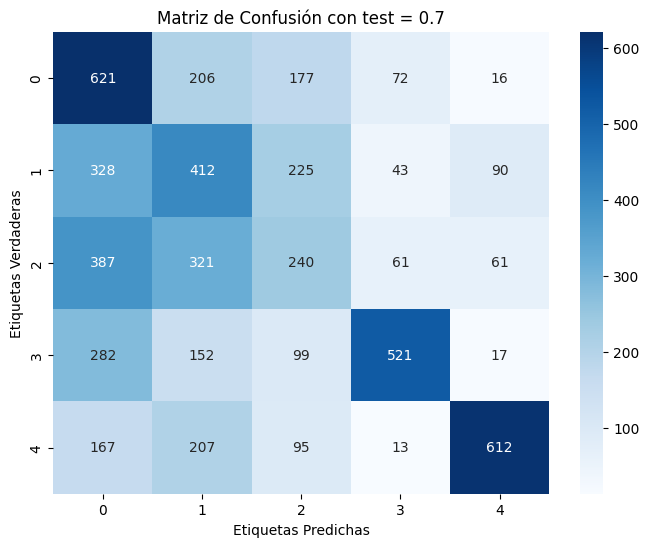

Exactitud del modelo: 0.44350230414746544
Precisión del modelo: 0.4908053511898962
Recall del modelo: 0.44350230414746544
Puntuación F1 del modelo: 0.4522745895340596
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.8.png


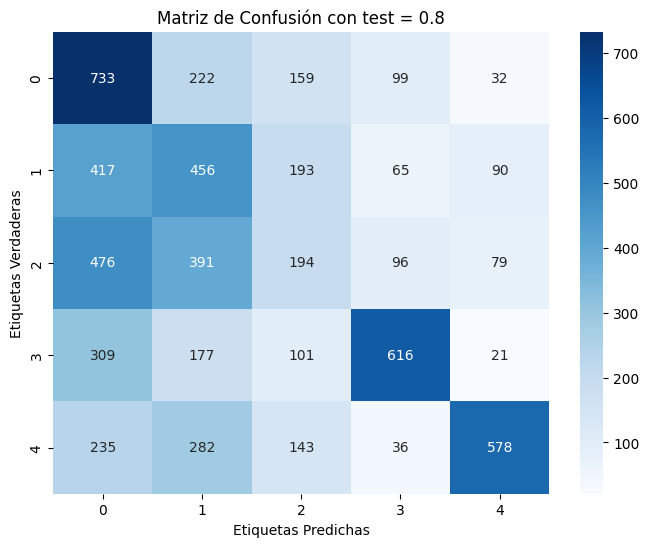

Exactitud del modelo: 0.4156451612903226
Precisión del modelo: 0.45736357655489723
Recall del modelo: 0.4156451612903226
Puntuación F1 del modelo: 0.41811529169435685
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.9.png


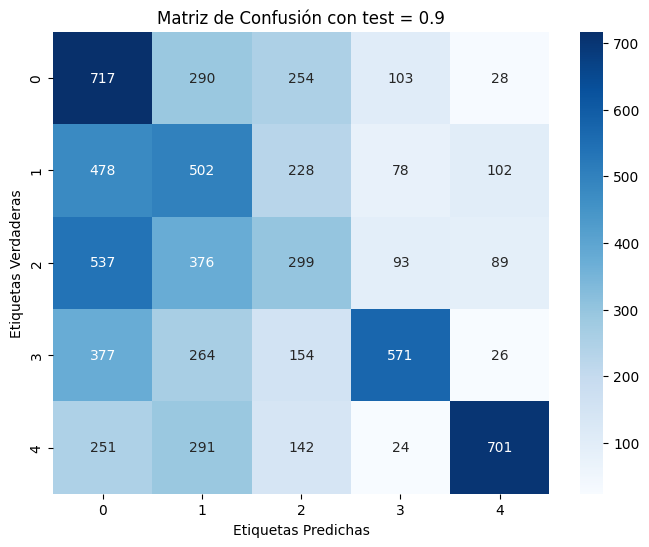

Exactitud del modelo: 0.4
Precisión del modelo: 0.4549180116829799
Recall del modelo: 0.4
Puntuación F1 del modelo: 0.4099236380557982
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_3_estimators/random_forest_roberta_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_cruz_3_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_2.png


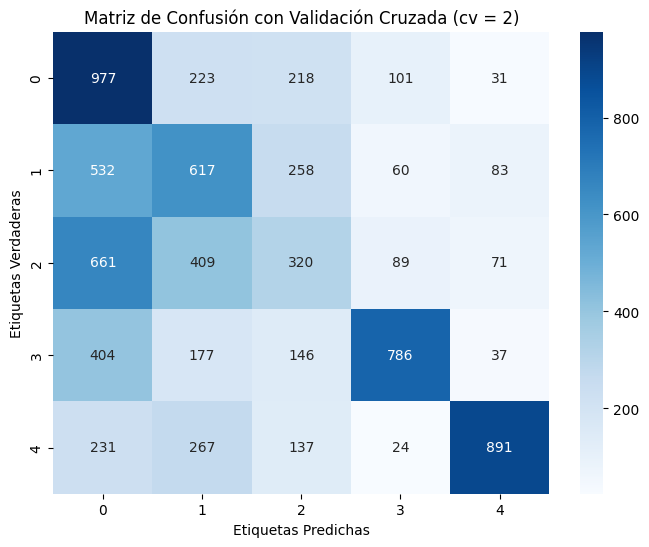

Exactitud media: 0.4633548387096774
Precisión media: 0.5102735662243861
Recall media: 0.4633548387096774
Puntuación F1 media: 0.46881981590539795
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_3.png


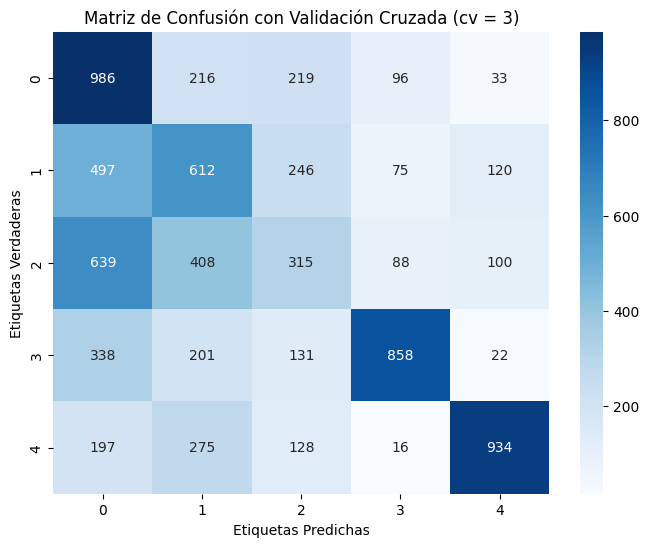

Exactitud media: 0.4780645161290323
Precisión media: 0.5123137657297234
Recall media: 0.4780645161290323
Puntuación F1 media: 0.48078982990834773
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_4.png


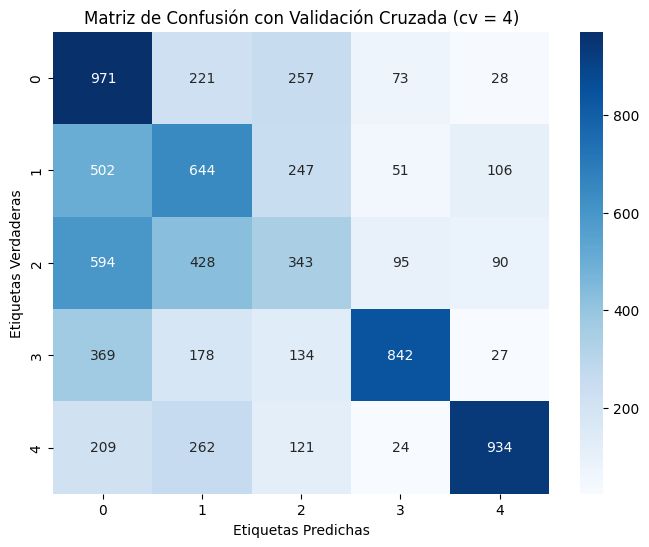

Exactitud media: 0.48180645161290325
Precisión media: 0.5228384928857182
Recall media: 0.48180645161290325
Puntuación F1 media: 0.48720324231030065
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_5.png


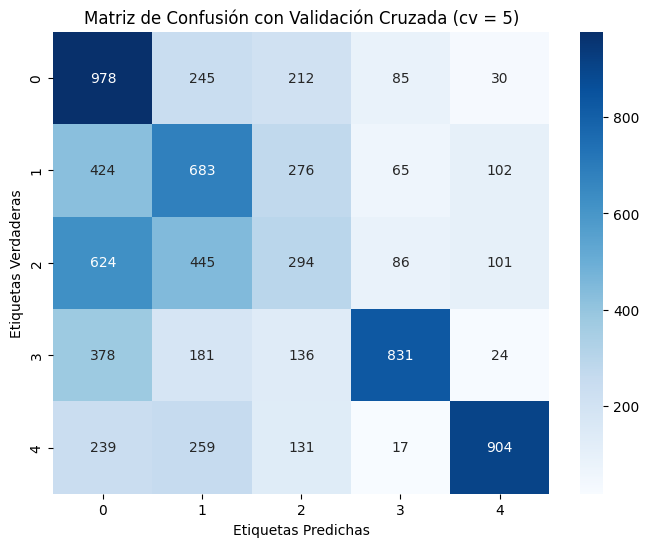

Exactitud media: 0.4761290322580645
Precisión media: 0.5144537811601055
Recall media: 0.4761290322580645
Puntuación F1 media: 0.4793619330053022
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_6.png


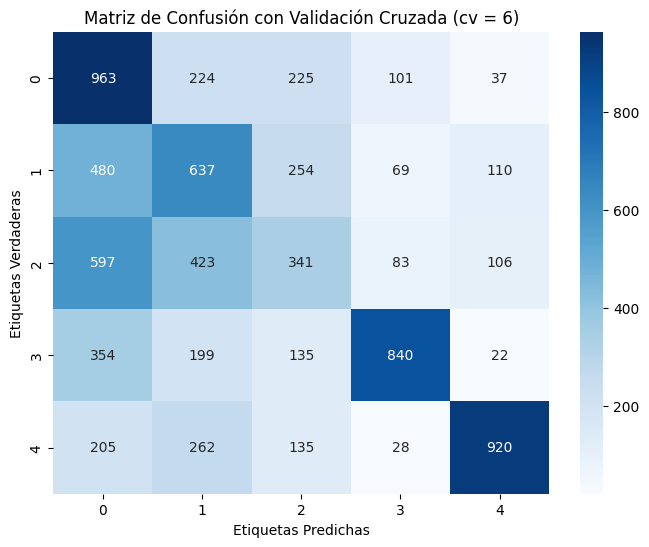

Exactitud media: 0.4775483870967742
Precisión media: 0.5135239147899834
Recall media: 0.4775483870967742
Puntuación F1 media: 0.48169511501706896
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_7.png


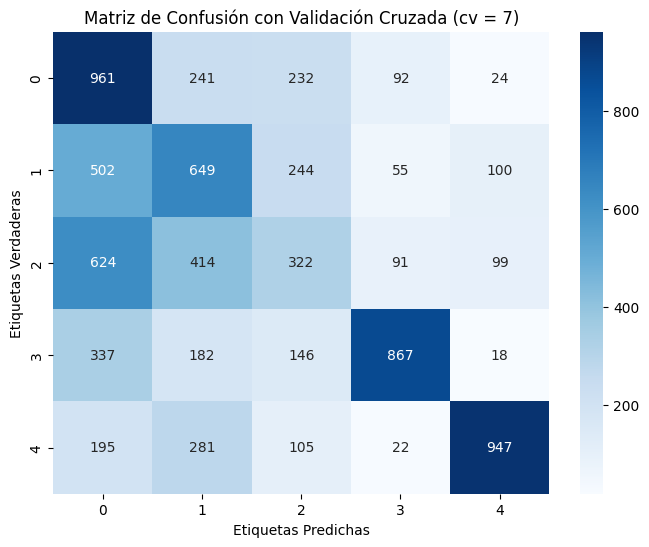

Exactitud media: 0.48335483870967744
Precisión media: 0.5215238429294641
Recall media: 0.48335483870967744
Puntuación F1 media: 0.4879225402505959
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_8.png


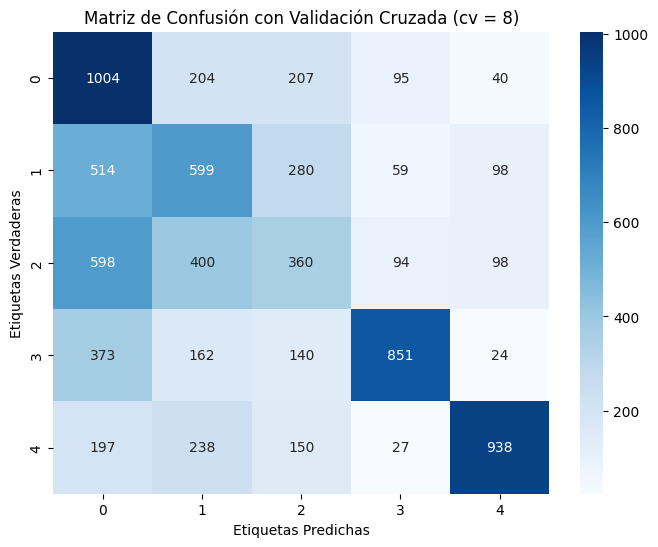

Exactitud media: 0.48412903225806453
Precisión media: 0.5205662680213741
Recall media: 0.48412903225806453
Puntuación F1 media: 0.4881293521146486
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_9.png


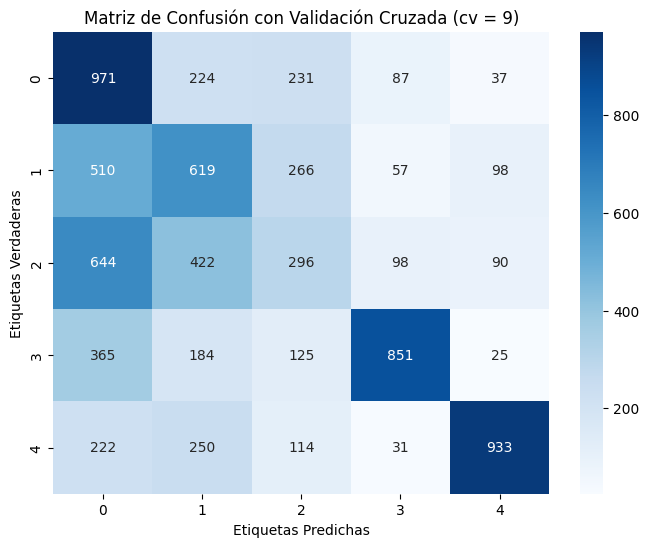

Exactitud media: 0.4735483870967742
Precisión media: 0.5109964633607543
Recall media: 0.4735483870967742
Puntuación F1 media: 0.47704807751281847
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_10.png


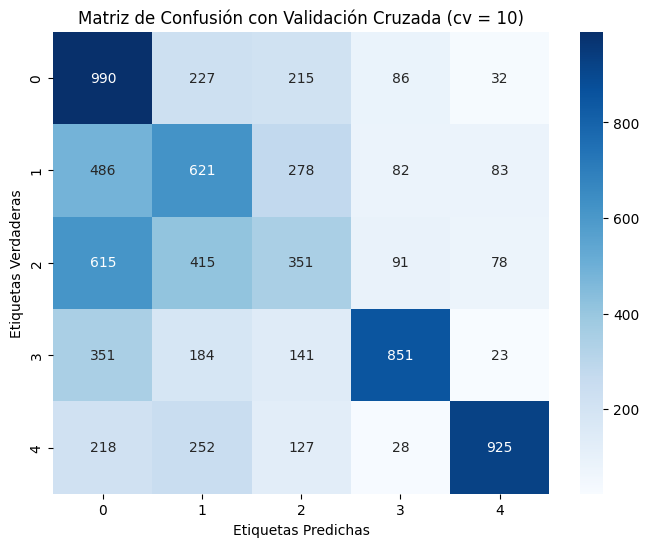

Exactitud media: 0.4823225806451613
Precisión media: 0.5223665189419877
Recall media: 0.4823225806451613
Puntuación F1 media: 0.4873906100203786
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_3_estimators/random_forest_roberta_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_sim_4_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.1.png


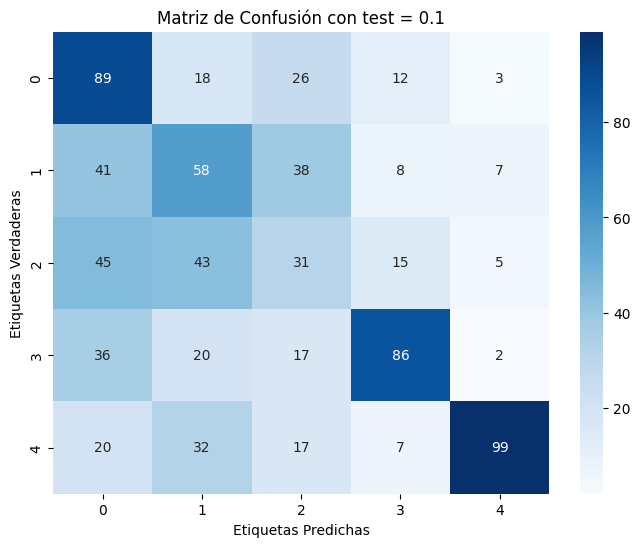

Exactitud del modelo: 0.46838709677419355
Precisión del modelo: 0.5154911285525889
Recall del modelo: 0.46838709677419355
Puntuación F1 del modelo: 0.47889860734597417
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.2.png


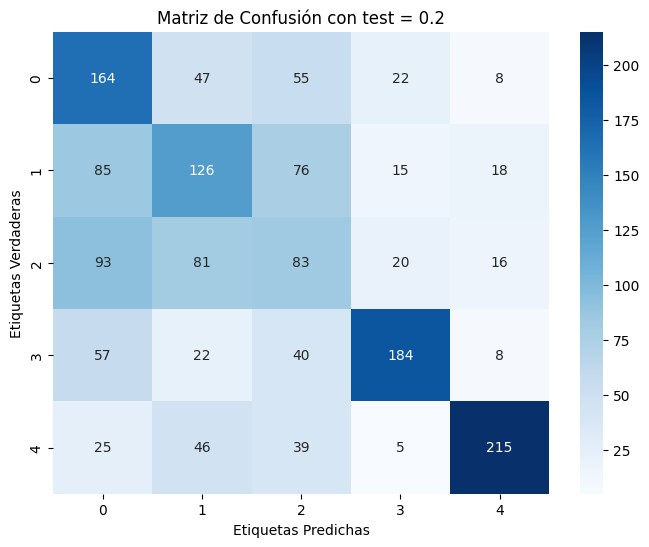

Exactitud del modelo: 0.49806451612903224
Precisión del modelo: 0.5310075435984188
Recall del modelo: 0.49806451612903224
Puntuación F1 del modelo: 0.5080074118644043
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.3.png


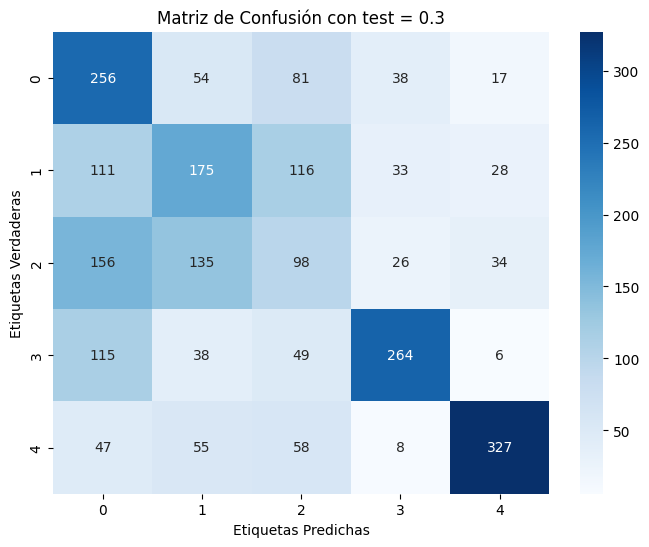

Exactitud del modelo: 0.4817204301075269
Precisión del modelo: 0.5092485449093345
Recall del modelo: 0.4817204301075269
Puntuación F1 del modelo: 0.4880487583770298
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.4.png


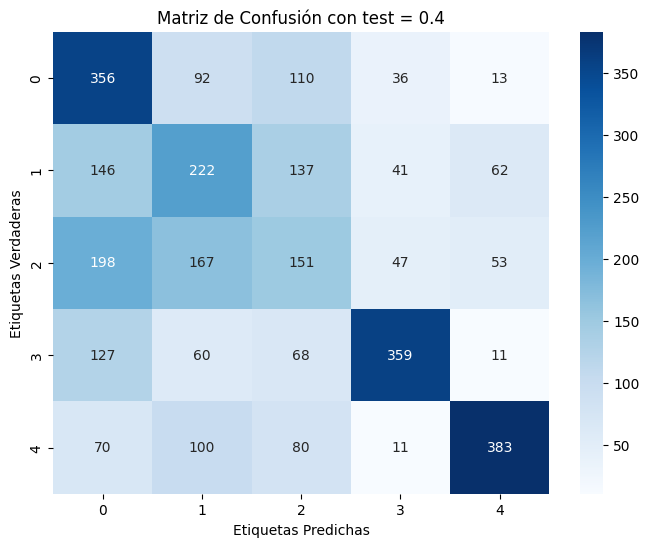

Exactitud del modelo: 0.47451612903225804
Precisión del modelo: 0.49953193926003925
Recall del modelo: 0.47451612903225804
Puntuación F1 del modelo: 0.4798995922147573
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.5.png


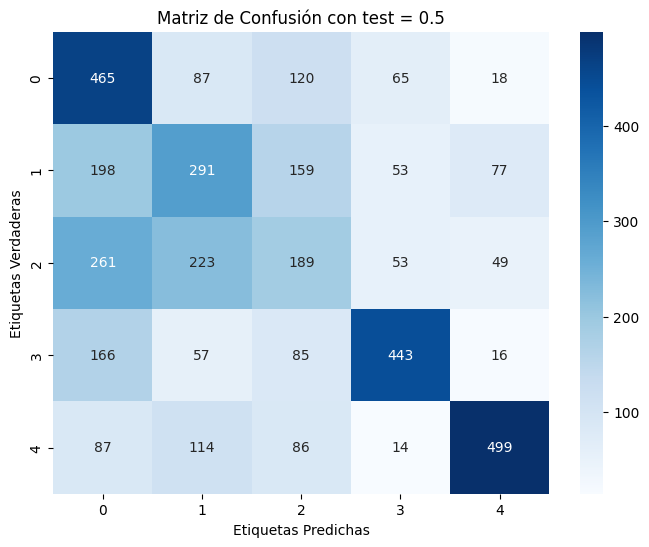

Exactitud del modelo: 0.48696774193548387
Precisión del modelo: 0.5077639728318475
Recall del modelo: 0.48696774193548387
Puntuación F1 del modelo: 0.48957462998840984
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.6.png


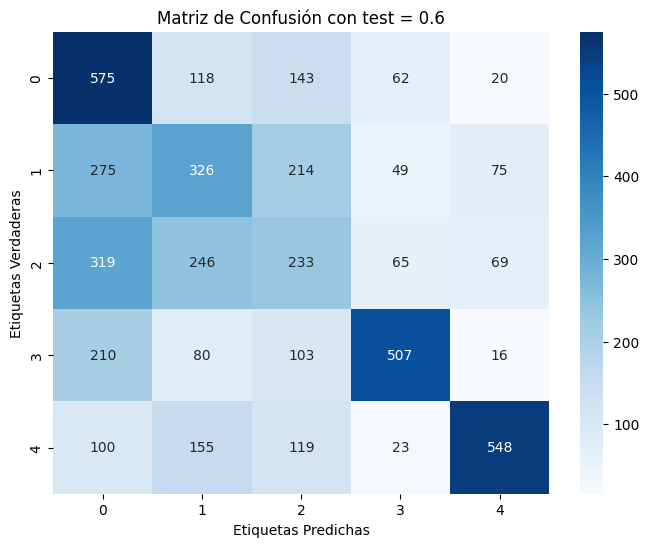

Exactitud del modelo: 0.470752688172043
Precisión del modelo: 0.49987475754846994
Recall del modelo: 0.470752688172043
Puntuación F1 del modelo: 0.4751885637618197
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.7.png


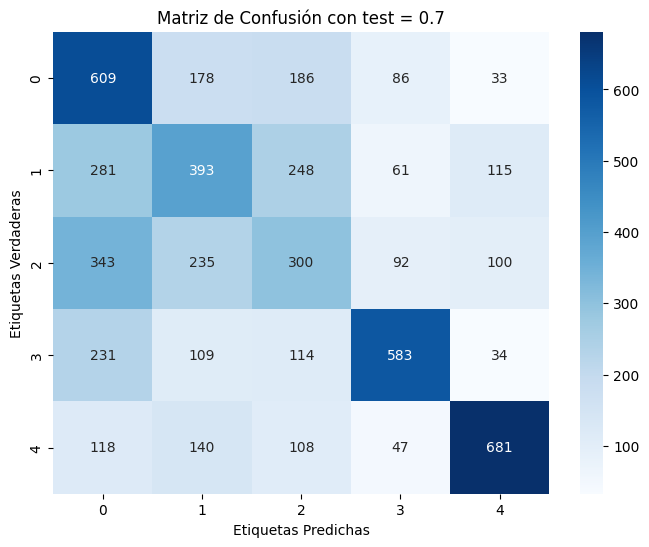

Exactitud del modelo: 0.4729953917050691
Precisión del modelo: 0.4898288232437363
Recall del modelo: 0.4729953917050691
Puntuación F1 del modelo: 0.47616706651213564
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.8.png


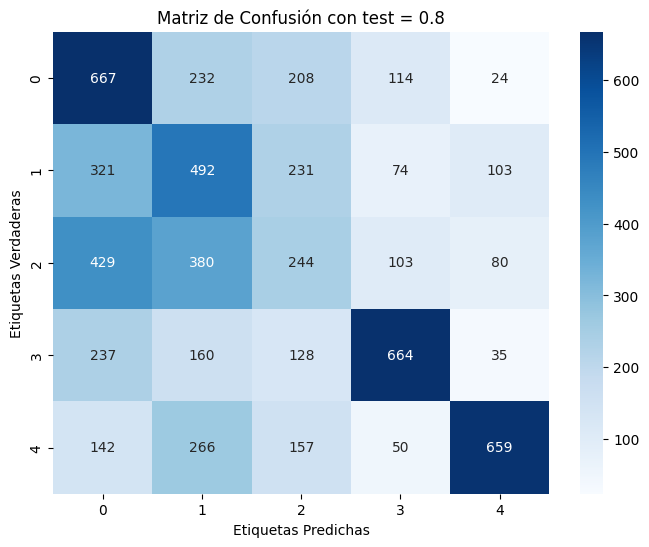

Exactitud del modelo: 0.4396774193548387
Precisión del modelo: 0.46888168780331413
Recall del modelo: 0.4396774193548387
Puntuación F1 del modelo: 0.4448073900989838
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.9.png


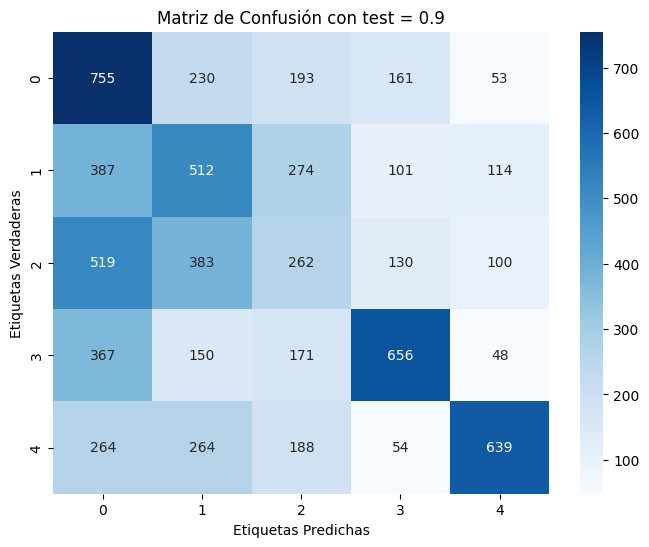

Exactitud del modelo: 0.40487455197132616
Precisión del modelo: 0.4341766370796506
Recall del modelo: 0.40487455197132616
Puntuación F1 del modelo: 0.40785109954539994
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_4_estimators/random_forest_roberta_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_cruz_4_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_2.png


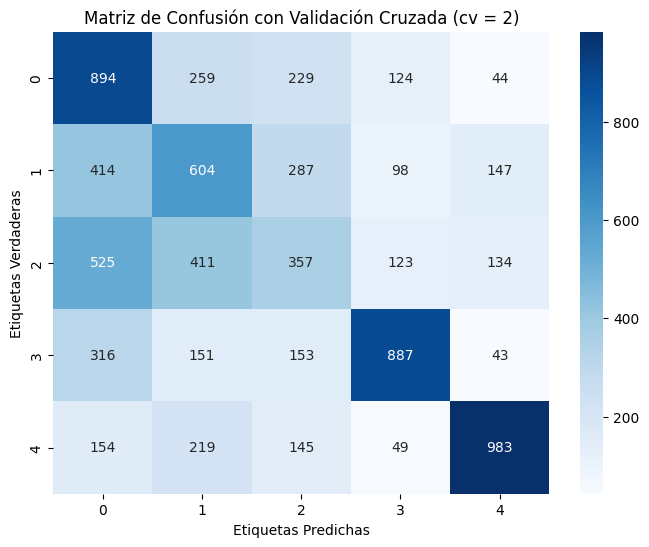

Exactitud media: 0.4806451612903226
Precisión media: 0.49609810312594477
Recall media: 0.4806451612903226
Puntuación F1 media: 0.4817995396494956
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_3.png


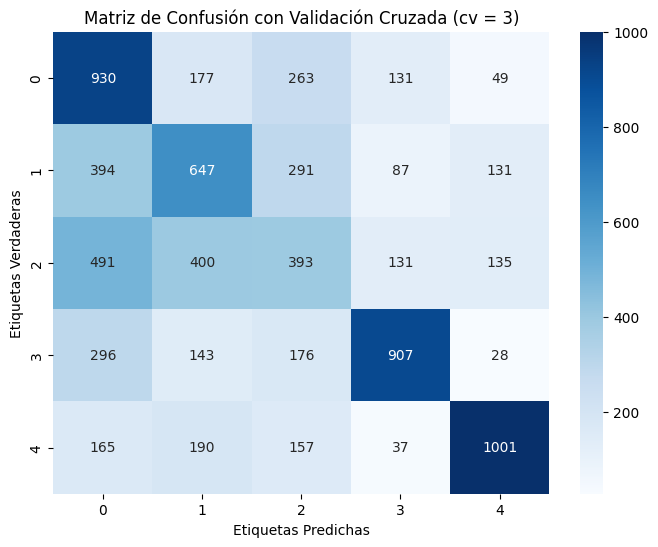

Exactitud media: 0.5003870967741936
Precisión media: 0.5154893354386962
Recall media: 0.5003870967741936
Puntuación F1 media: 0.5020398648795557
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_4.png


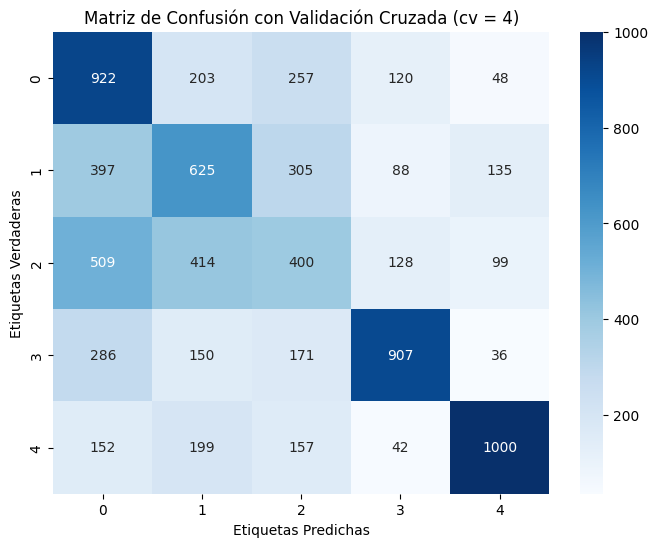

Exactitud media: 0.49729032258064515
Precisión media: 0.5148717019200352
Recall media: 0.49729032258064515
Puntuación F1 media: 0.5000180121964871
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_5.png


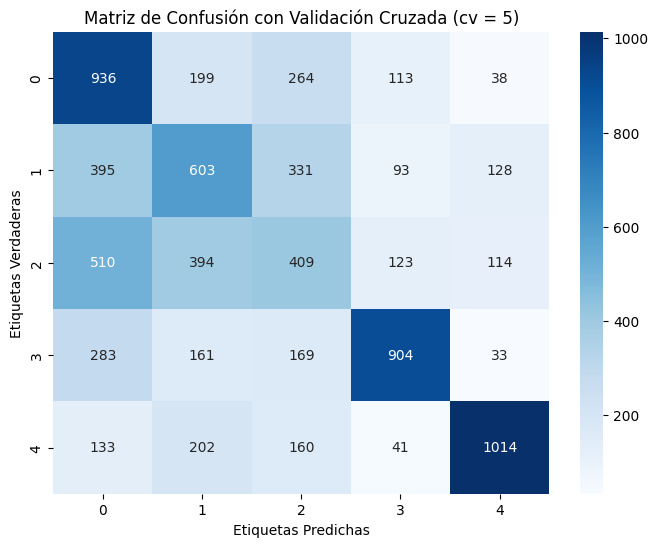

Exactitud media: 0.49883870967741933
Precisión media: 0.516405730759422
Recall media: 0.49883870967741933
Puntuación F1 media: 0.5016983276395648
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_6.png


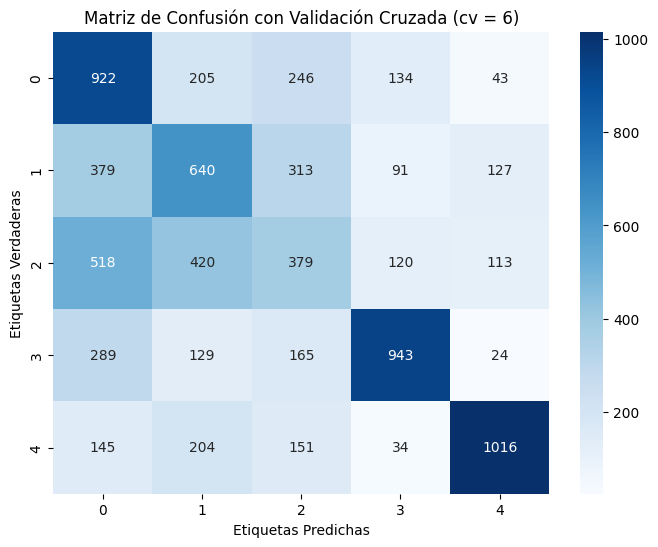

Exactitud media: 0.5032258064516129
Precisión media: 0.5186460805096584
Recall media: 0.5032258064516129
Puntuación F1 media: 0.5051551385353732
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_7.png


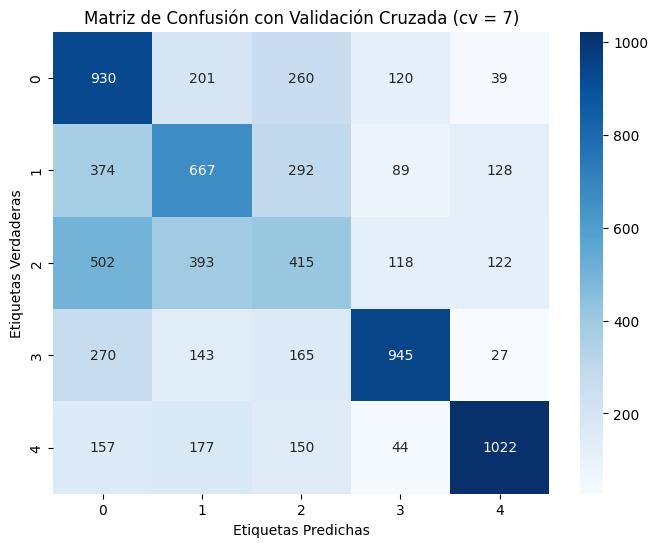

Exactitud media: 0.5134193548387097
Precisión media: 0.5287979232829583
Recall media: 0.5134193548387097
Puntuación F1 media: 0.5156052504629154
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_8.png


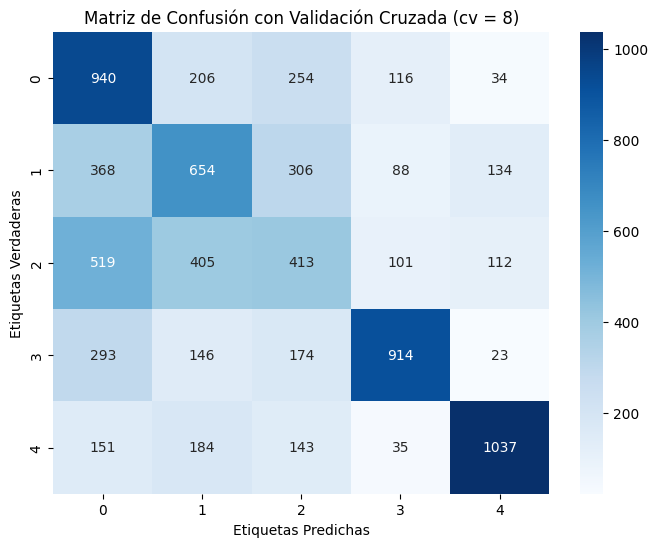

Exactitud media: 0.5107096774193548
Precisión media: 0.5293698364837044
Recall media: 0.5107096774193548
Puntuación F1 media: 0.5136667994167179
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_9.png


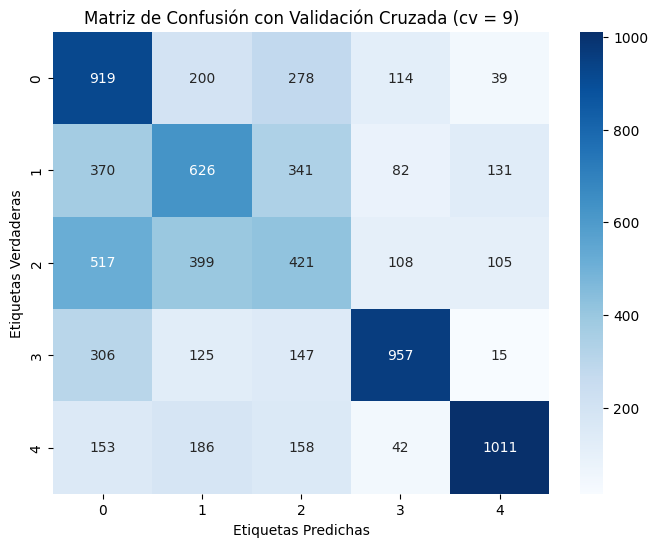

Exactitud media: 0.5076129032258064
Precisión media: 0.5275712467327143
Recall media: 0.5076129032258064
Puntuación F1 media: 0.5116858997961234
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_10.png


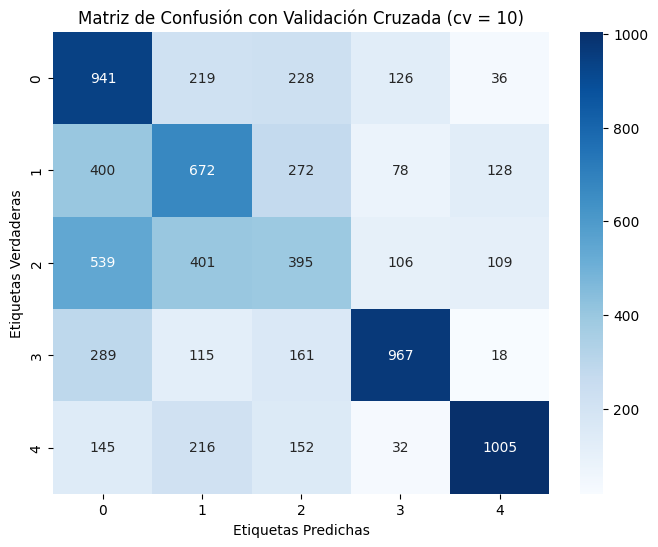

Exactitud media: 0.5135483870967742
Precisión media: 0.5323769552137374
Recall media: 0.5135483870967742
Puntuación F1 media: 0.5159576176079163
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_4_estimators/random_forest_roberta_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_sim_5_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.1.png


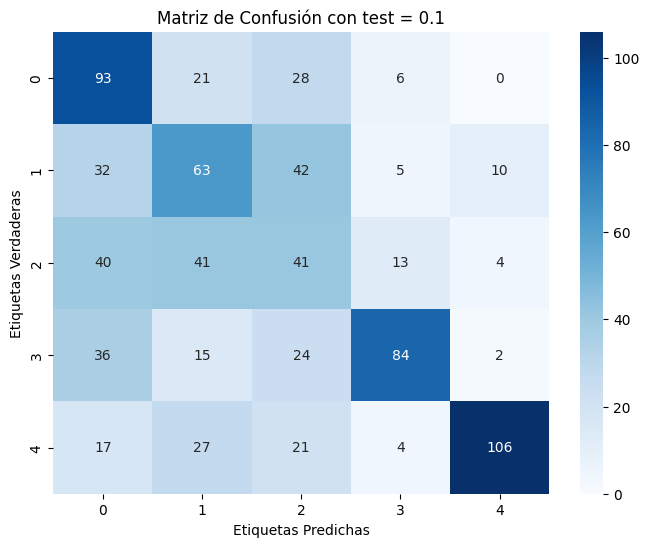

Exactitud del modelo: 0.4993548387096774
Precisión del modelo: 0.5545937595536629
Recall del modelo: 0.4993548387096774
Puntuación F1 del modelo: 0.5133945399190948
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.2.png


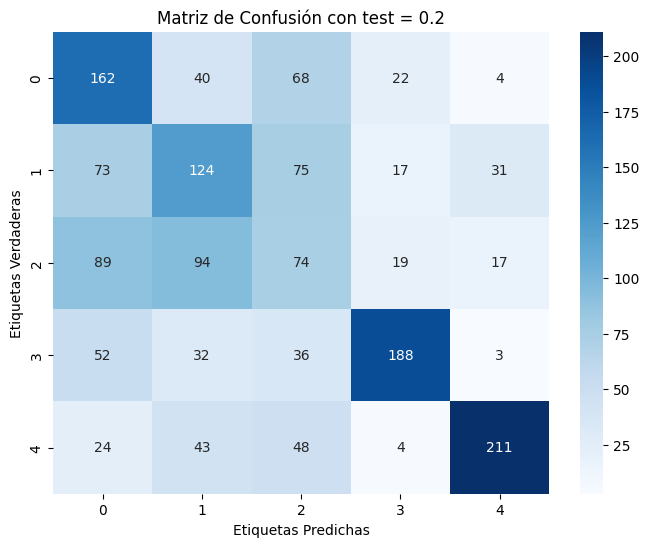

Exactitud del modelo: 0.4896774193548387
Precisión del modelo: 0.5204589026088738
Recall del modelo: 0.4896774193548387
Puntuación F1 del modelo: 0.49963074185598755
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.3.png


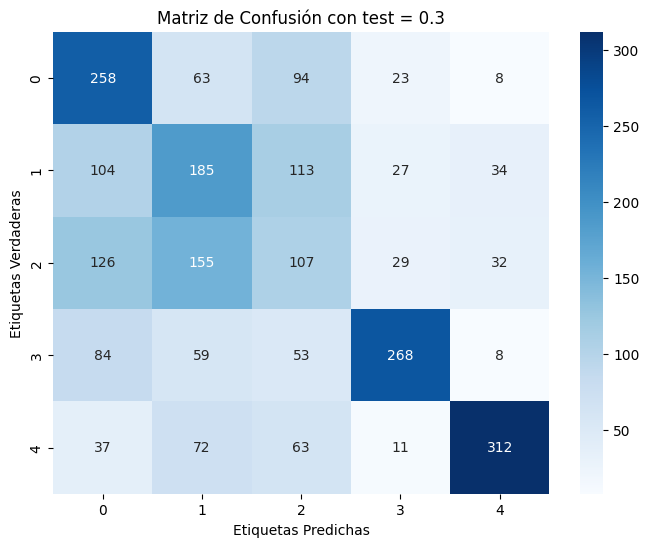

Exactitud del modelo: 0.4860215053763441
Precisión del modelo: 0.5188803522846664
Recall del modelo: 0.4860215053763441
Puntuación F1 del modelo: 0.49528297991638
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.4.png


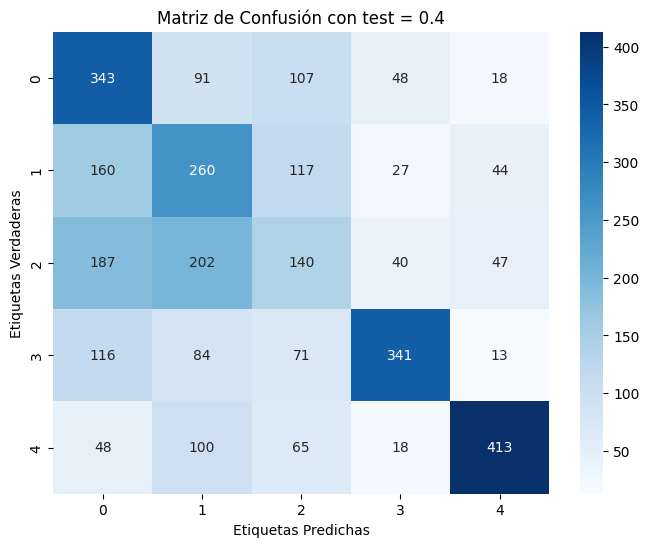

Exactitud del modelo: 0.4829032258064516
Precisión del modelo: 0.5088841901128877
Recall del modelo: 0.4829032258064516
Puntuación F1 del modelo: 0.4882779856177703
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.5.png


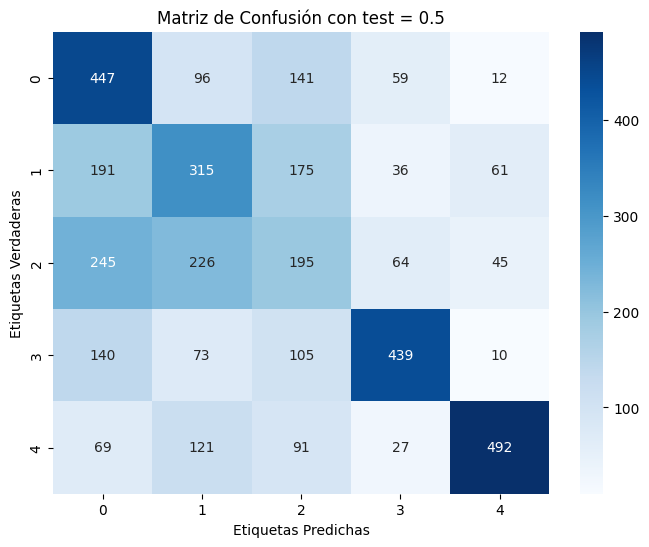

Exactitud del modelo: 0.4872258064516129
Precisión del modelo: 0.5138830345480967
Recall del modelo: 0.4872258064516129
Puntuación F1 del modelo: 0.49346112457498226
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.6.png


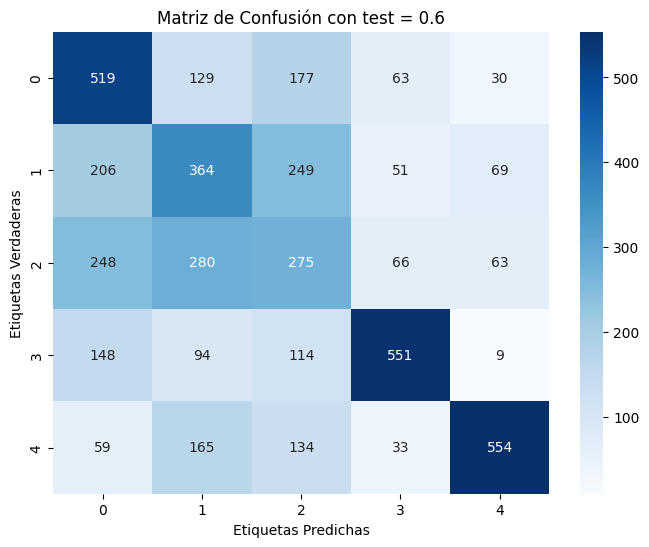

Exactitud del modelo: 0.4866666666666667
Precisión del modelo: 0.5134987579633656
Recall del modelo: 0.4866666666666667
Puntuación F1 del modelo: 0.4949163103926308
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.7.png


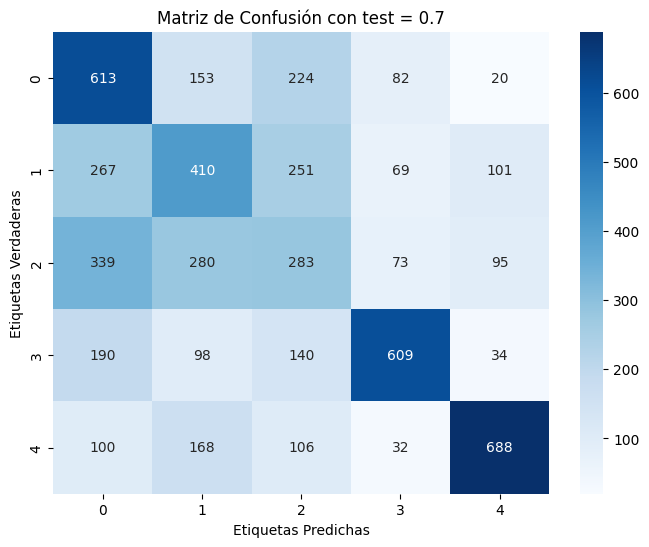

Exactitud del modelo: 0.479815668202765
Precisión del modelo: 0.49909584247263
Recall del modelo: 0.479815668202765
Puntuación F1 del modelo: 0.4846643014600672
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.8.png


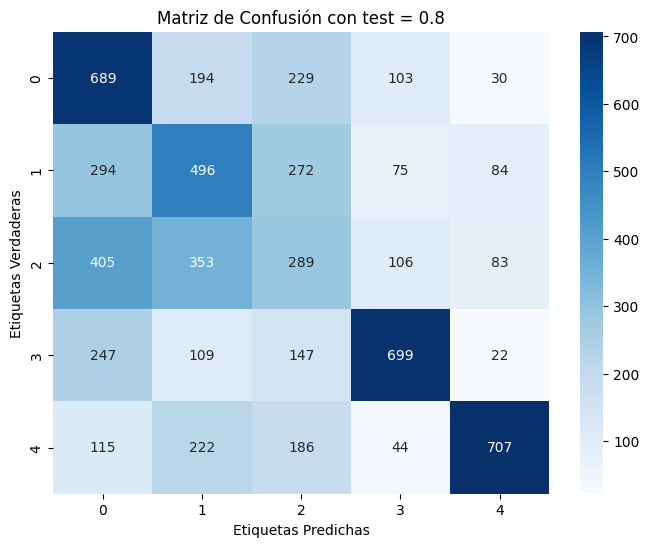

Exactitud del modelo: 0.4645161290322581
Precisión del modelo: 0.49271022204318665
Recall del modelo: 0.4645161290322581
Puntuación F1 del modelo: 0.47119887827045775
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.9.png


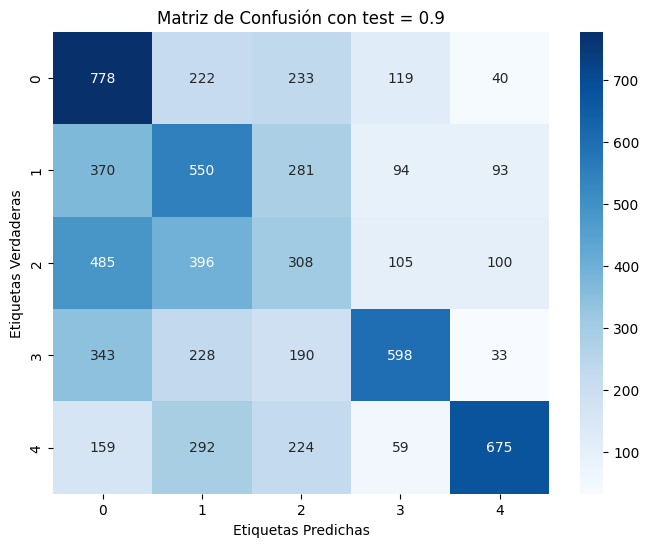

Exactitud del modelo: 0.41706093189964155
Precisión del modelo: 0.454672223665666
Recall del modelo: 0.41706093189964155
Puntuación F1 del modelo: 0.42290250581795247
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_5_estimators/random_forest_roberta_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_cruz_5_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_2.png


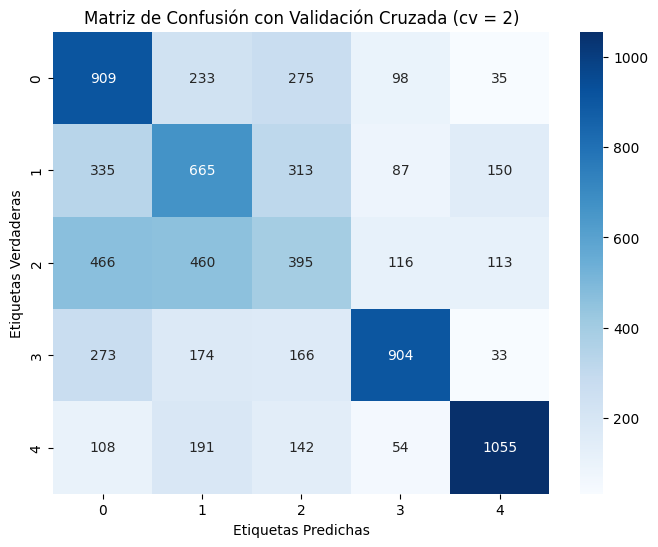

Exactitud media: 0.5068387096774194
Precisión media: 0.5211705544502956
Recall media: 0.5068387096774194
Puntuación F1 media: 0.5092099557391294
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_3.png


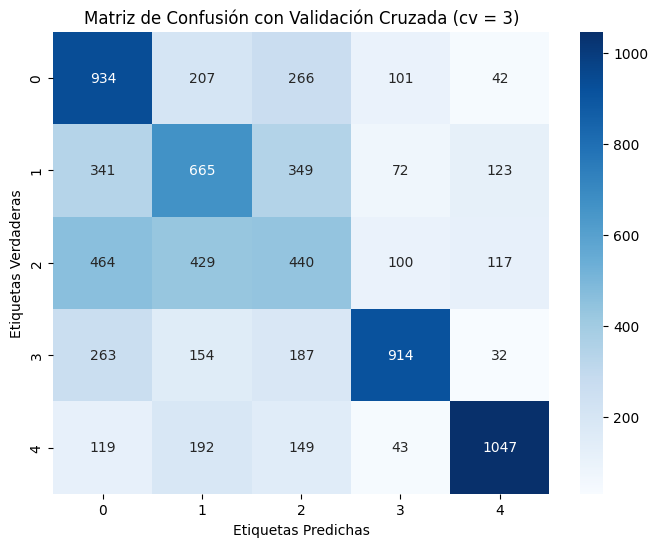

Exactitud media: 0.5161290322580645
Precisión media: 0.5345637312361491
Recall media: 0.5161290322580645
Puntuación F1 media: 0.5201961060701125
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_4.png


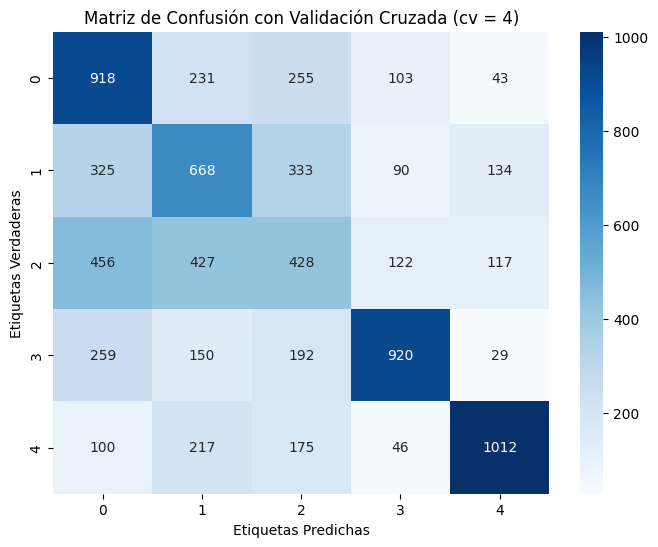

Exactitud media: 0.5091612903225806
Precisión media: 0.5252687021393463
Recall media: 0.5091612903225806
Puntuación F1 media: 0.5128383128424352
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_5.png


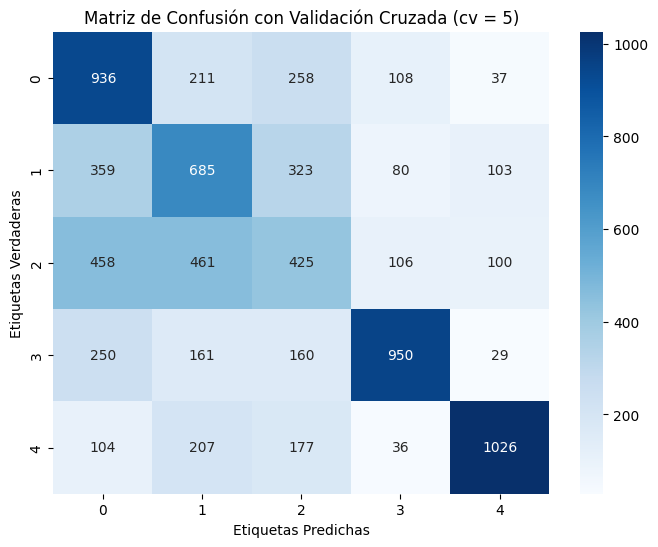

Exactitud media: 0.5189677419354839
Precisión media: 0.5384512290224636
Recall media: 0.5189677419354839
Puntuación F1 media: 0.5233343455082158
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_6.png


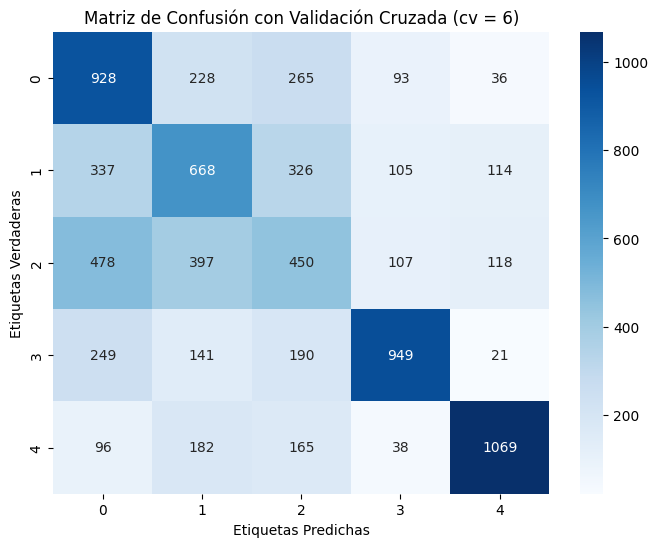

Exactitud media: 0.5243870967741936
Precisión media: 0.5403735029764098
Recall media: 0.5243870967741936
Puntuación F1 media: 0.5281411470067908
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_7.png


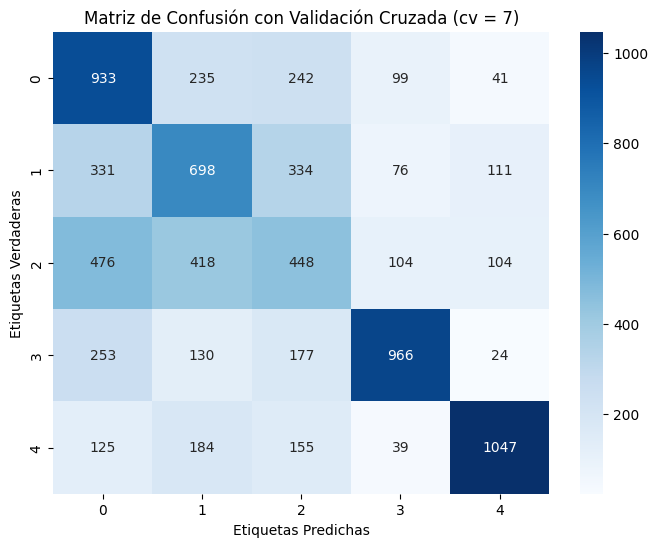

Exactitud media: 0.528
Precisión media: 0.5462893605837931
Recall media: 0.528
Puntuación F1 media: 0.5321659533429582
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_8.png


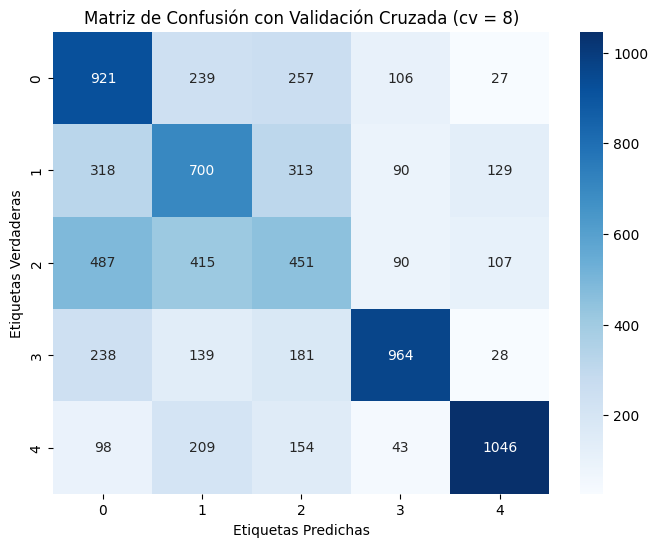

Exactitud media: 0.5267096774193548
Precisión media: 0.5436863939181864
Recall media: 0.5267096774193548
Puntuación F1 media: 0.5307295783901173
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_9.png


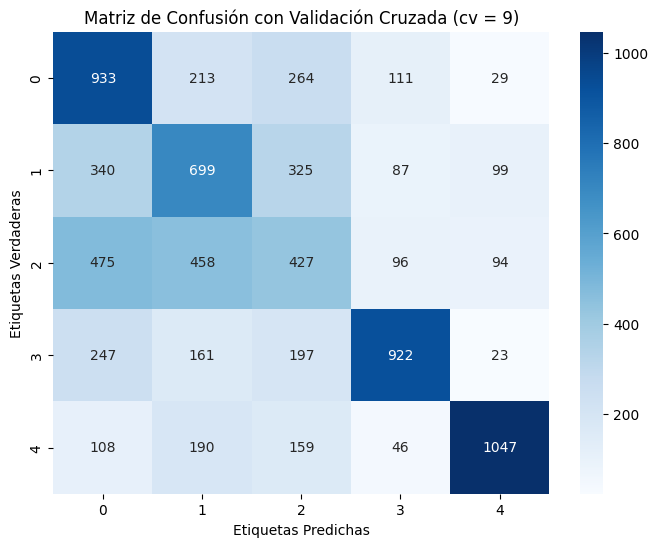

Exactitud media: 0.5197419354838709
Precisión media: 0.5403987026491484
Recall media: 0.5197419354838709
Puntuación F1 media: 0.5246073855478649
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_10.png


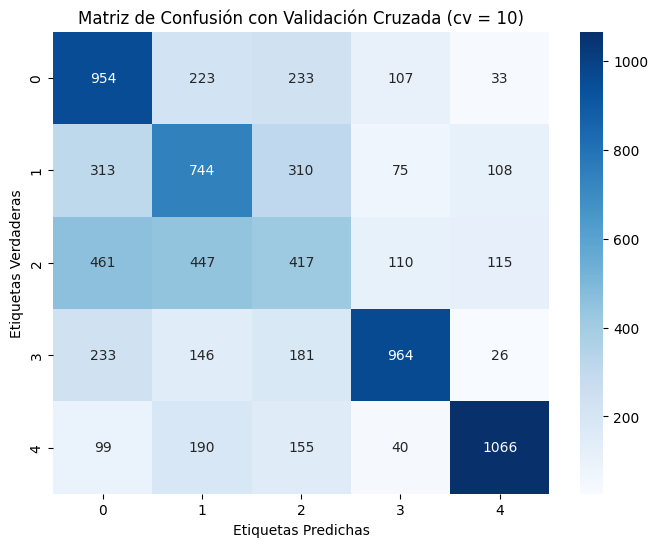

Exactitud media: 0.5348387096774193
Precisión media: 0.5489274519912137
Recall media: 0.5348387096774193
Puntuación F1 media: 0.5371211234196006
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_5_estimators/random_forest_roberta_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_sim_6_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.1.png


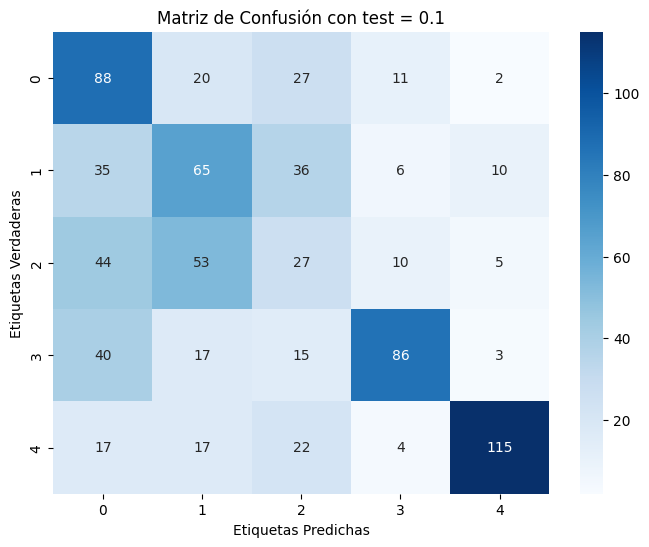

Exactitud del modelo: 0.4916129032258065
Precisión del modelo: 0.5323249717758581
Recall del modelo: 0.4916129032258065
Puntuación F1 del modelo: 0.5015192584243872
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.2.png


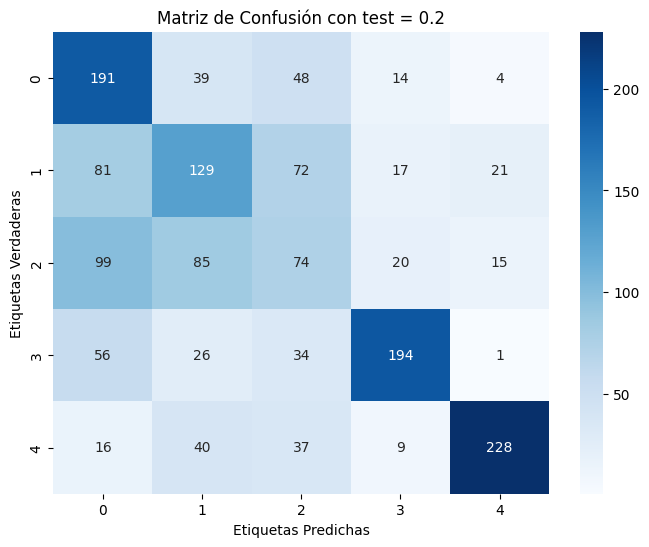

Exactitud del modelo: 0.5264516129032258
Precisión del modelo: 0.5523110060870761
Recall del modelo: 0.5264516129032258
Puntuación F1 del modelo: 0.5320724417603406
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.3.png


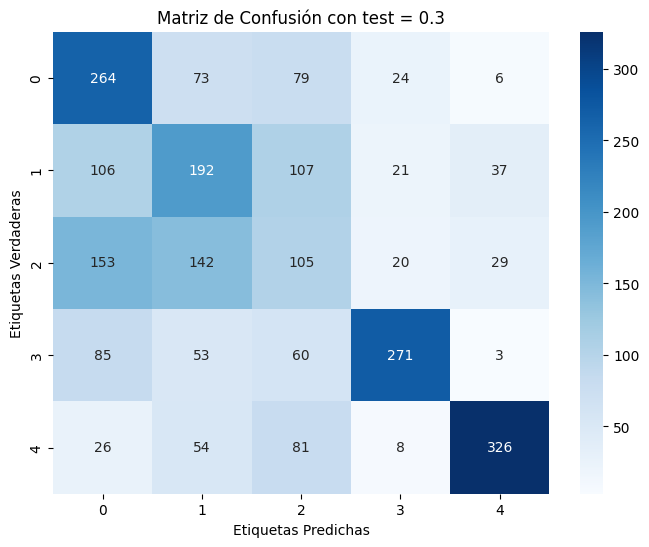

Exactitud del modelo: 0.49806451612903224
Precisión del modelo: 0.5342166068970804
Recall del modelo: 0.49806451612903224
Puntuación F1 del modelo: 0.5078532172077918
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.4.png


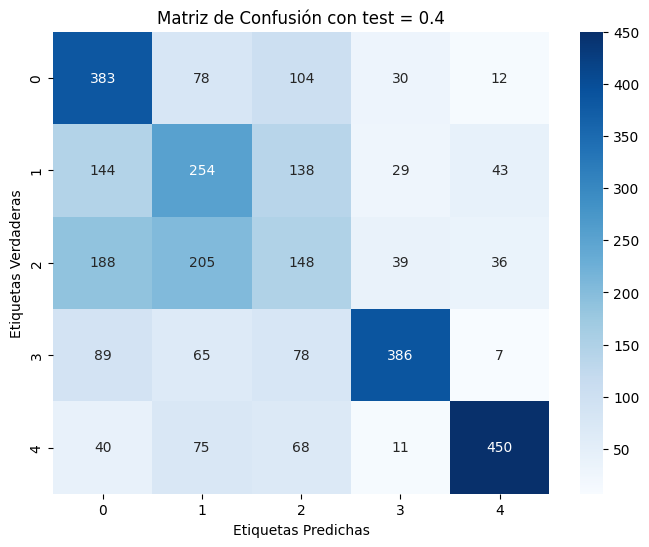

Exactitud del modelo: 0.5229032258064517
Precisión del modelo: 0.5451158348942807
Recall del modelo: 0.5229032258064517
Puntuación F1 del modelo: 0.5277827428771373
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.5.png


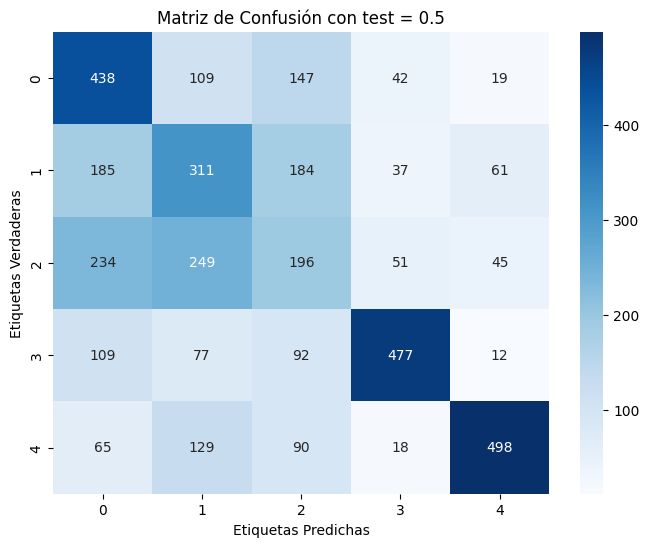

Exactitud del modelo: 0.49548387096774194
Precisión del modelo: 0.5223978495933477
Recall del modelo: 0.49548387096774194
Puntuación F1 del modelo: 0.5028907068399237
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.6.png


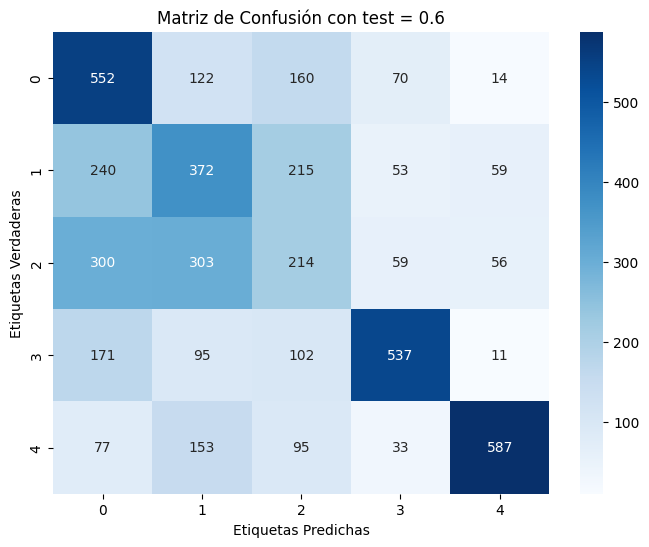

Exactitud del modelo: 0.4864516129032258
Precisión del modelo: 0.5125395307998748
Recall del modelo: 0.4864516129032258
Puntuación F1 del modelo: 0.491716269122214
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.7.png


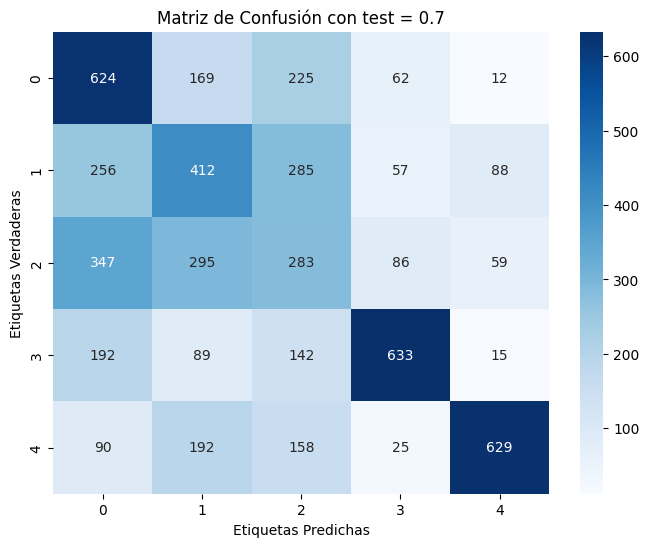

Exactitud del modelo: 0.47576036866359445
Precisión del modelo: 0.5091442169754046
Recall del modelo: 0.47576036866359445
Puntuación F1 del modelo: 0.48511279080338643
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.8.png


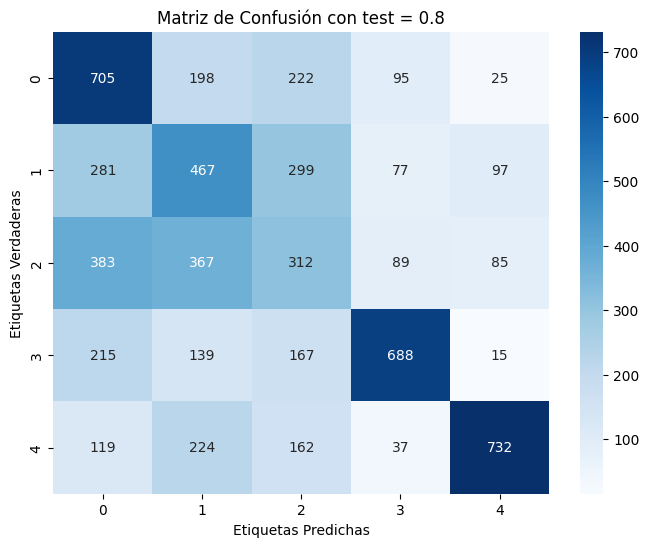

Exactitud del modelo: 0.46838709677419355
Precisión del modelo: 0.49800364205768705
Recall del modelo: 0.46838709677419355
Puntuación F1 del modelo: 0.4761717032993008
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.9.png


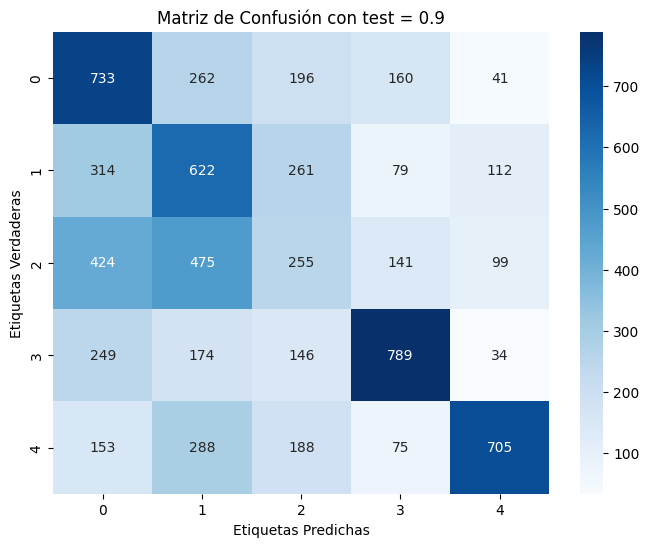

Exactitud del modelo: 0.44501792114695343
Precisión del modelo: 0.4650798799550708
Recall del modelo: 0.44501792114695343
Puntuación F1 del modelo: 0.44667259623822064
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_6_estimators/random_forest_roberta_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_cruz_6_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_2.png


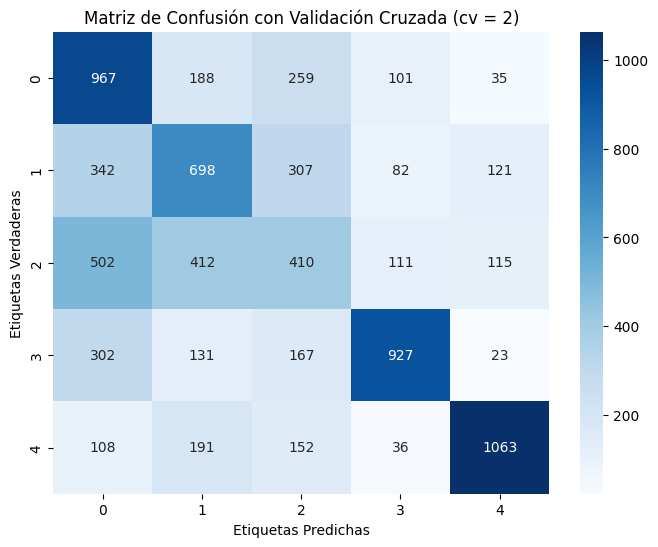

Exactitud media: 0.5245161290322581
Precisión media: 0.5407343521461724
Recall media: 0.5245161290322581
Puntuación F1 media: 0.5266589184647994
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_3.png


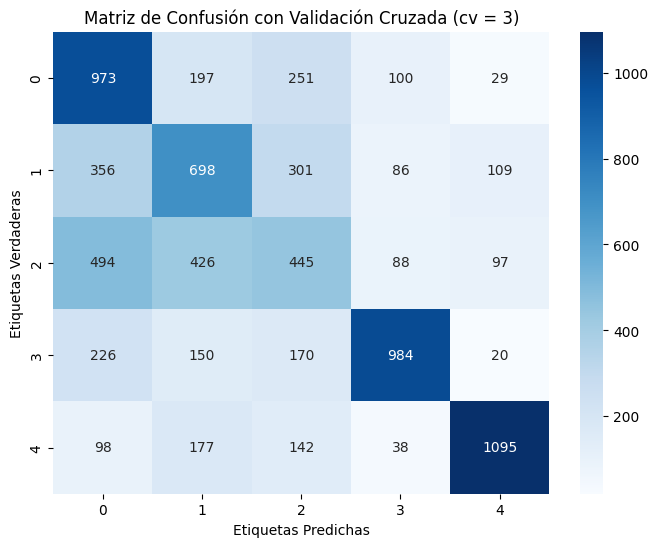

Exactitud media: 0.5412903225806451
Precisión media: 0.5574117443088304
Recall media: 0.5412903225806451
Puntuación F1 media: 0.5441724938799418
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_4.png


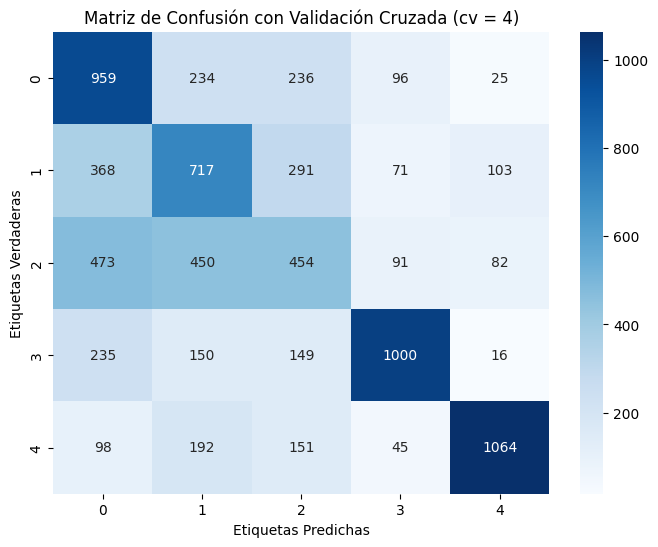

Exactitud media: 0.5411612903225806
Precisión media: 0.5615275502937092
Recall media: 0.5411612903225806
Puntuación F1 media: 0.545457451759559
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_5.png


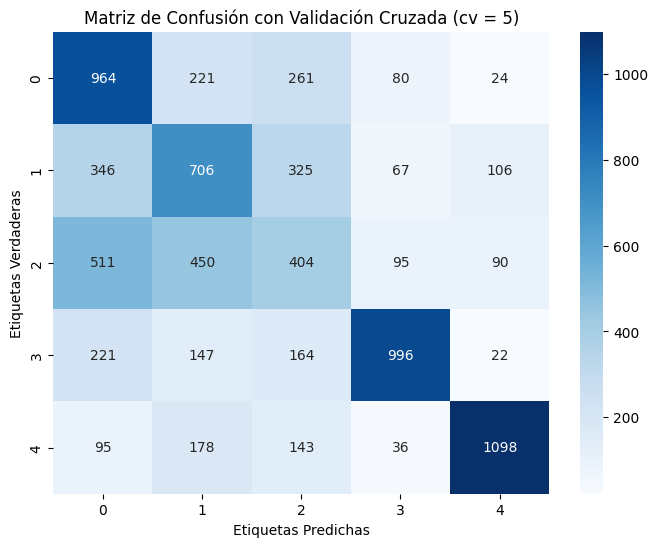

Exactitud media: 0.5378064516129032
Precisión media: 0.5557172912496091
Recall media: 0.5378064516129032
Puntuación F1 media: 0.5412328496791089
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_6.png


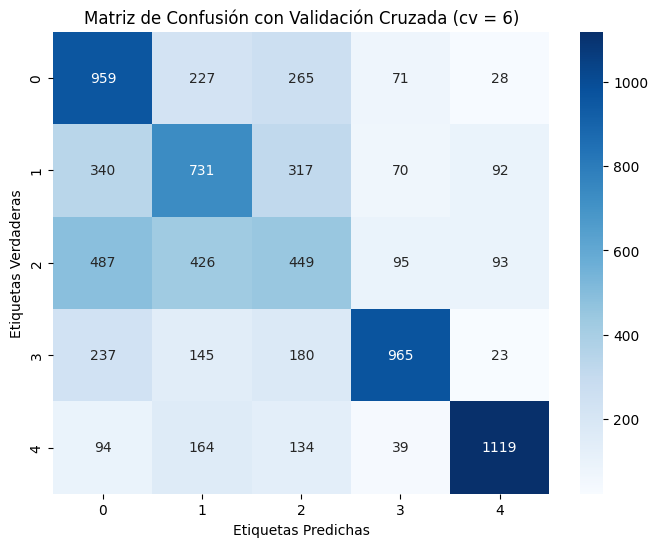

Exactitud media: 0.5449032258064516
Precisión media: 0.564532499541476
Recall media: 0.5449032258064516
Puntuación F1 media: 0.549240525727016
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_7.png


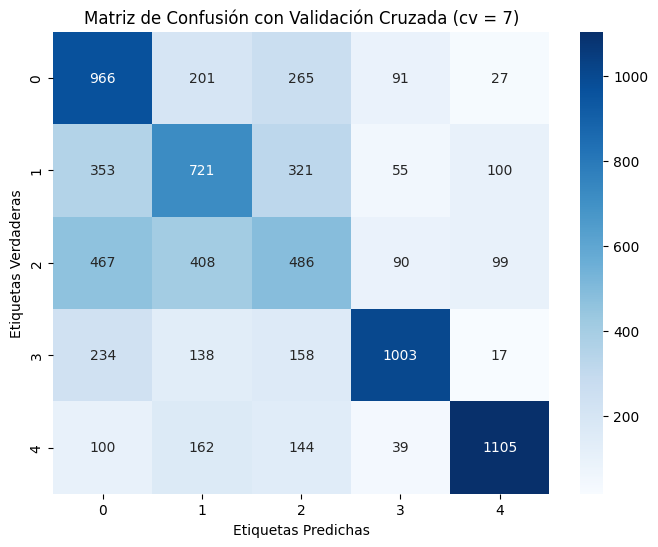

Exactitud media: 0.5523870967741935
Precisión media: 0.5712512850158853
Recall media: 0.5523870967741935
Puntuación F1 media: 0.5568482180206373
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_8.png


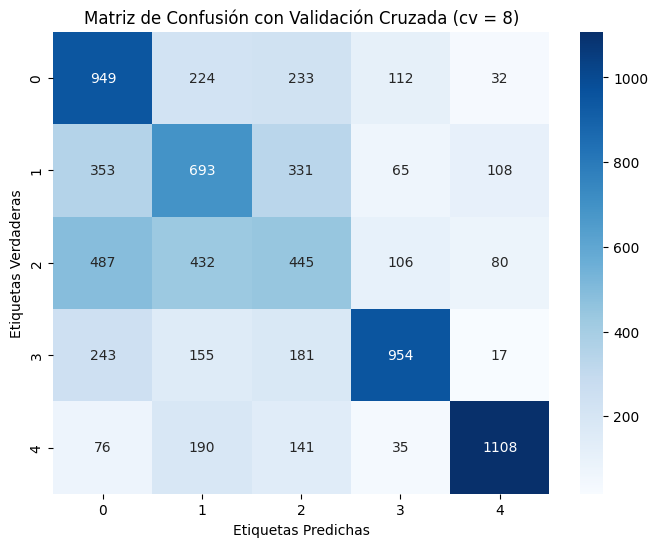

Exactitud media: 0.5353548387096774
Precisión media: 0.5534815140748265
Recall media: 0.5353548387096774
Puntuación F1 media: 0.539321500760067
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_9.png


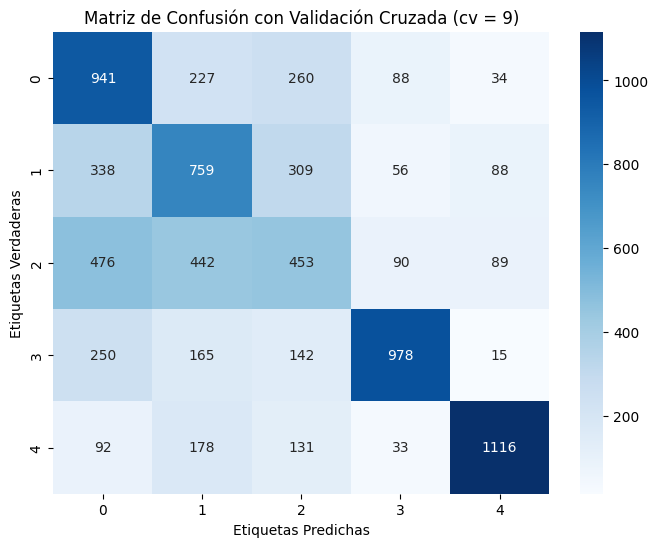

Exactitud media: 0.548
Precisión media: 0.5688502943728814
Recall media: 0.548
Puntuación F1 media: 0.5526381174864695
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_10.png


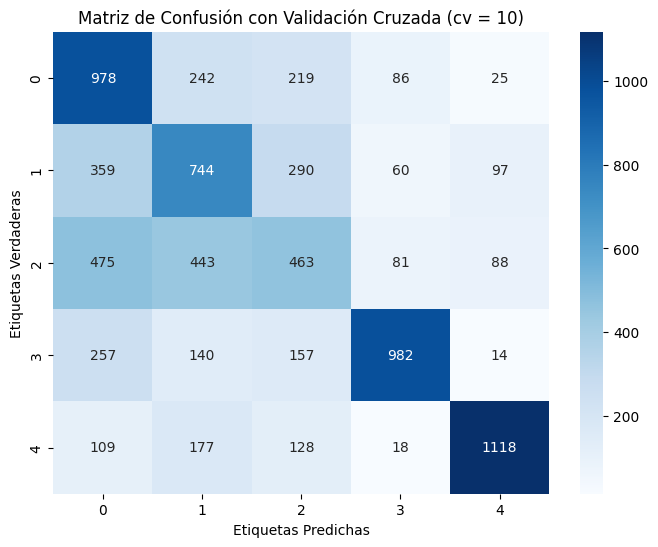

Exactitud media: 0.5529032258064516
Precisión media: 0.5753801816854556
Recall media: 0.5529032258064516
Puntuación F1 media: 0.5572858737908832
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_6_estimators/random_forest_roberta_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_sim_7_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.1.png


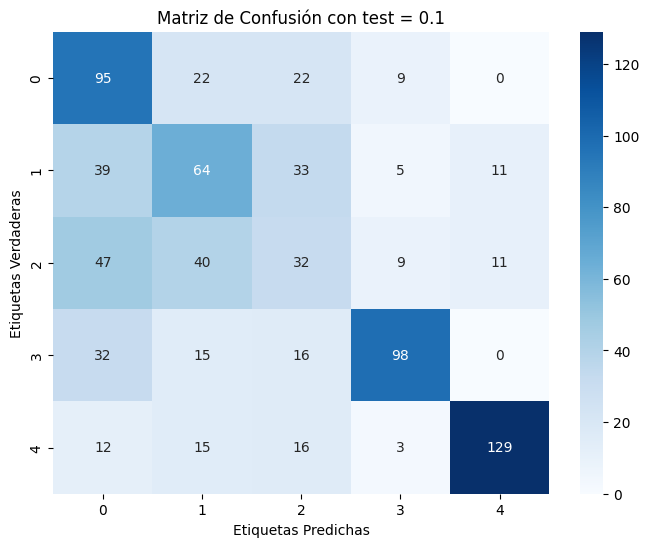

Exactitud del modelo: 0.5393548387096774
Precisión del modelo: 0.5664145306458278
Recall del modelo: 0.5393548387096774
Puntuación F1 del modelo: 0.5448489429717831
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.2.png


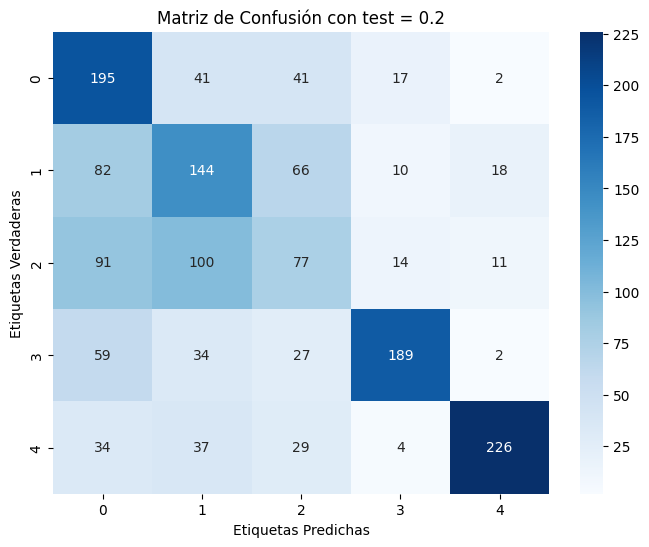

Exactitud del modelo: 0.5361290322580645
Precisión del modelo: 0.5727705924597064
Recall del modelo: 0.5361290322580645
Puntuación F1 del modelo: 0.5435033906603094
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.3.png


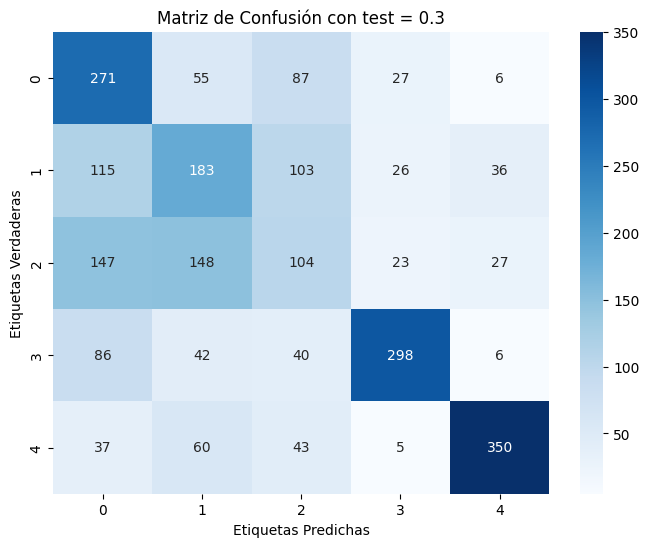

Exactitud del modelo: 0.5187096774193548
Precisión del modelo: 0.5421527266936124
Recall del modelo: 0.5187096774193548
Puntuación F1 del modelo: 0.5237888209776745
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.4.png


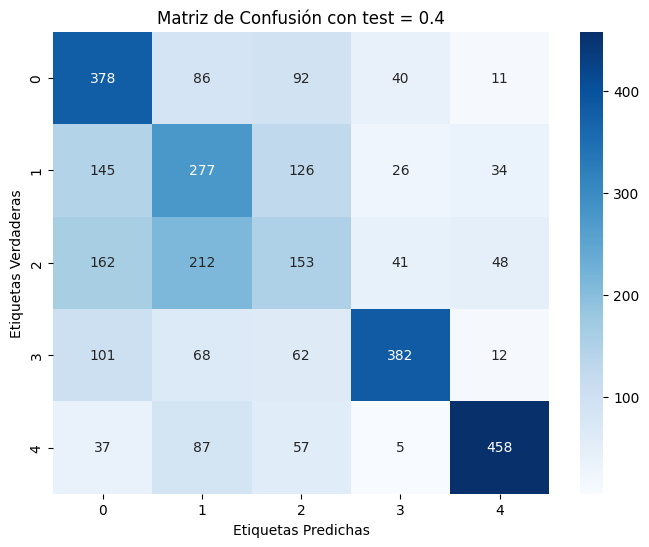

Exactitud del modelo: 0.5316129032258065
Precisión del modelo: 0.5513015978180211
Recall del modelo: 0.5316129032258065
Puntuación F1 del modelo: 0.5350105711091371
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.5.png


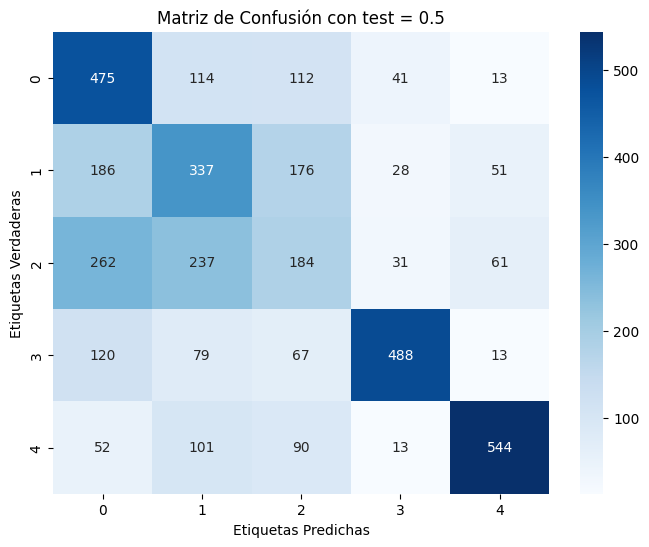

Exactitud del modelo: 0.5233548387096775
Precisión del modelo: 0.5463715958437371
Recall del modelo: 0.5233548387096775
Puntuación F1 del modelo: 0.5274686275083266
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.6.png


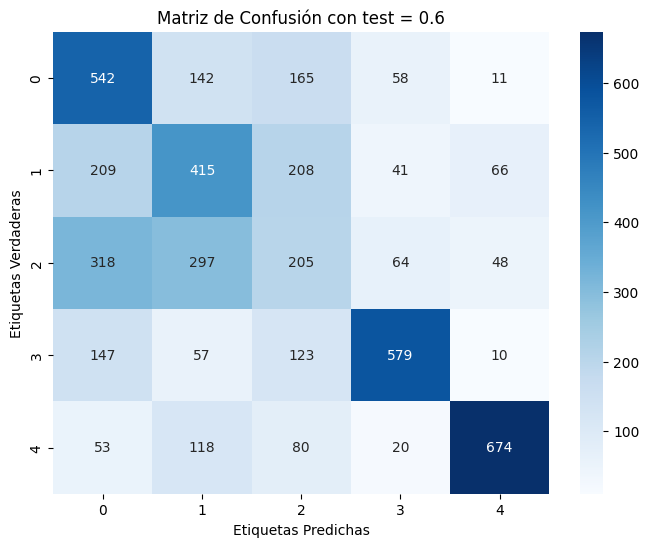

Exactitud del modelo: 0.5193548387096775
Precisión del modelo: 0.5373642745702728
Recall del modelo: 0.5193548387096775
Puntuación F1 del modelo: 0.5231188302109916
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.7.png


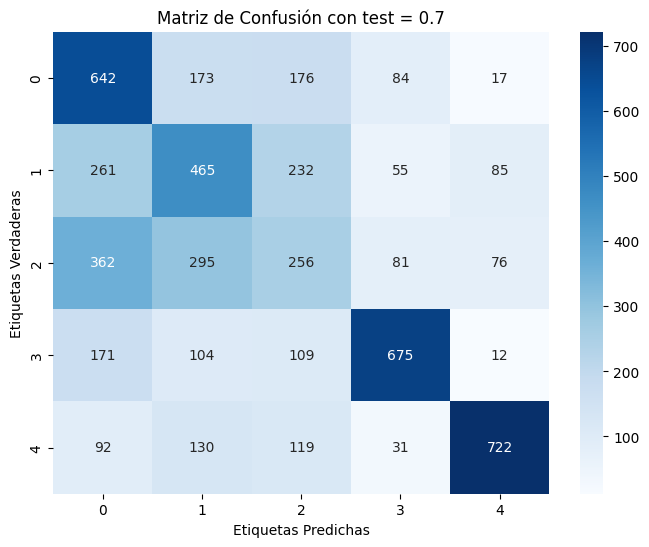

Exactitud del modelo: 0.5087557603686635
Precisión del modelo: 0.525379359348081
Recall del modelo: 0.5087557603686635
Puntuación F1 del modelo: 0.511841396546554
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.8.png


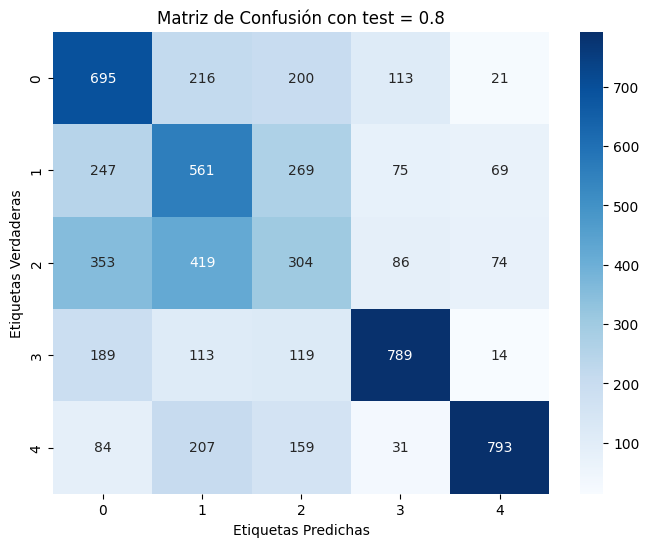

Exactitud del modelo: 0.506774193548387
Precisión del modelo: 0.5297404801606201
Recall del modelo: 0.506774193548387
Puntuación F1 del modelo: 0.5125162077262246
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.9.png


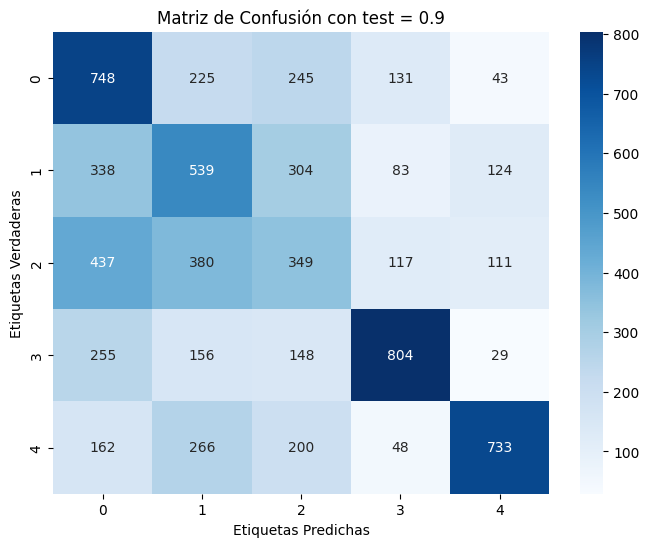

Exactitud del modelo: 0.454910394265233
Precisión del modelo: 0.4794285578344361
Recall del modelo: 0.454910394265233
Puntuación F1 del modelo: 0.4606117023698602
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_7_estimators/random_forest_roberta_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_cruz_7_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_2.png


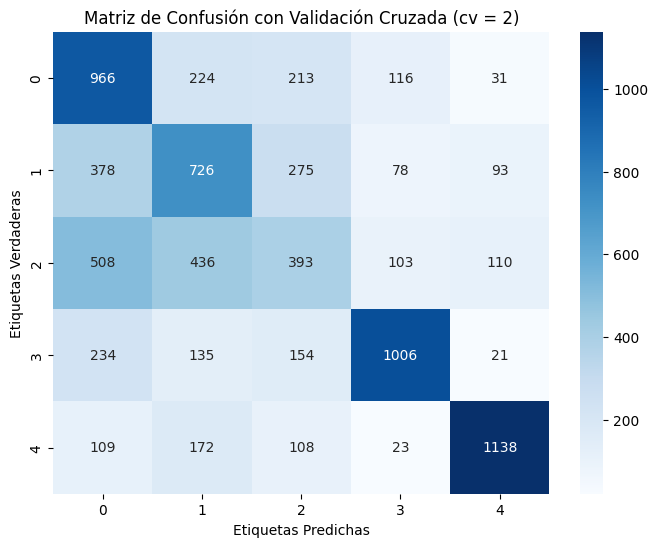

Exactitud media: 0.5456774193548387
Precisión media: 0.5576724521806987
Recall media: 0.5456774193548387
Puntuación F1 media: 0.5456865012423586
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_3.png


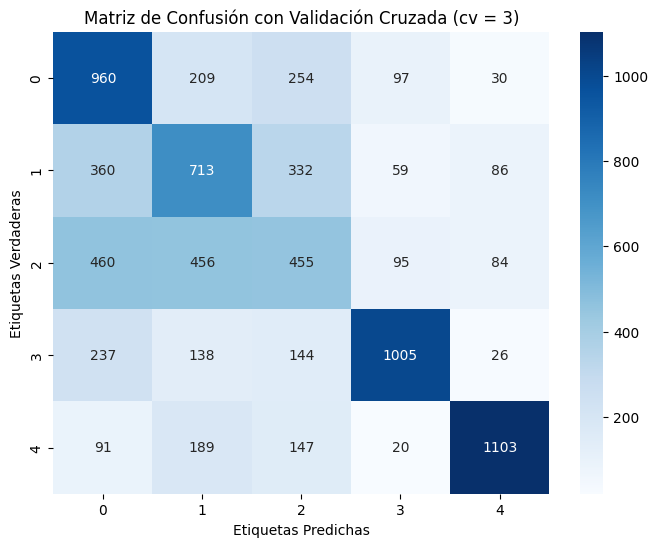

Exactitud media: 0.5465806451612903
Precisión media: 0.5665492526180946
Recall media: 0.5465806451612903
Puntuación F1 media: 0.5512432201001433
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_4.png


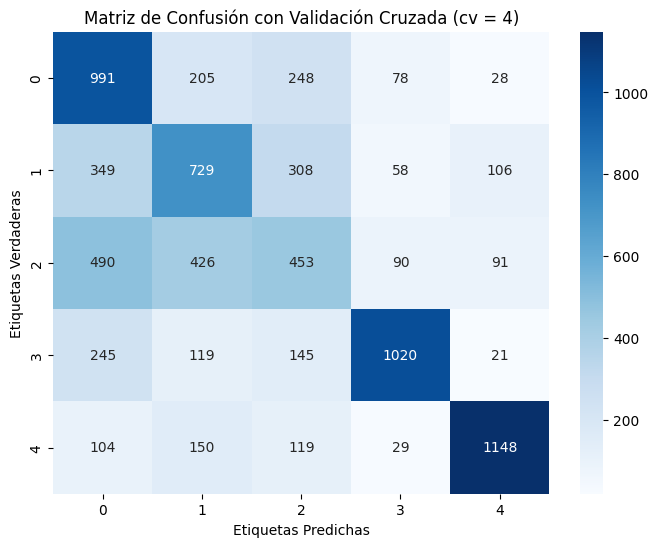

Exactitud media: 0.5601290322580645
Precisión media: 0.5763382638319459
Recall media: 0.5601290322580645
Puntuación F1 media: 0.5626189904920381
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_5.png


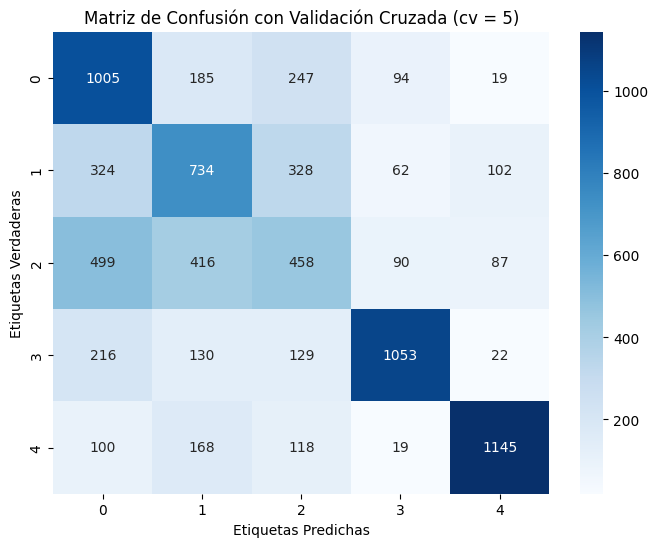

Exactitud media: 0.5670967741935484
Precisión media: 0.5815414085717168
Recall media: 0.5670967741935484
Puntuación F1 media: 0.5692432505522325
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_6.png


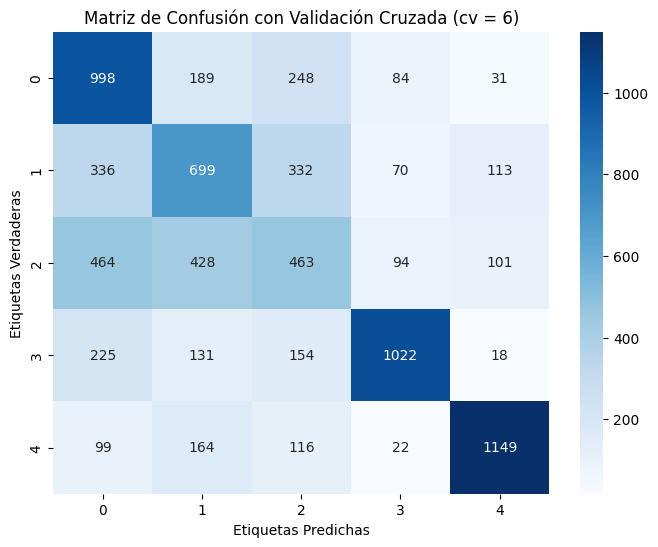

Exactitud media: 0.5588387096774193
Precisión media: 0.5723183277860864
Recall media: 0.5588387096774193
Puntuación F1 media: 0.5608628022908434
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_7.png


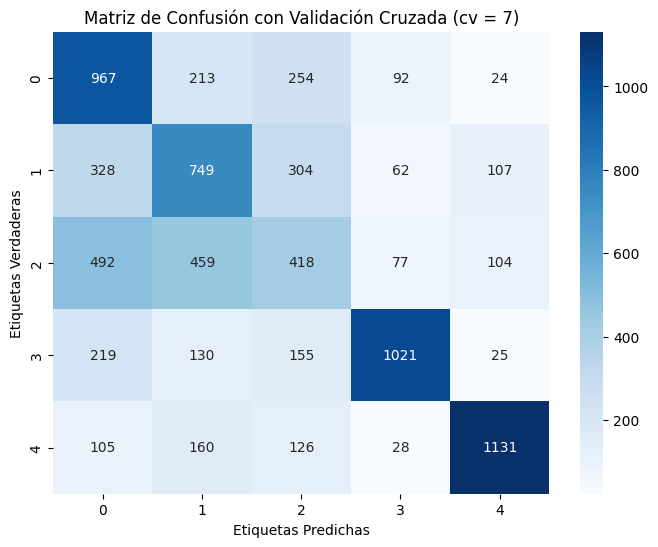

Exactitud media: 0.5530322580645162
Precisión media: 0.5678221179675301
Recall media: 0.5530322580645162
Puntuación F1 media: 0.5552294070914352
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_8.png


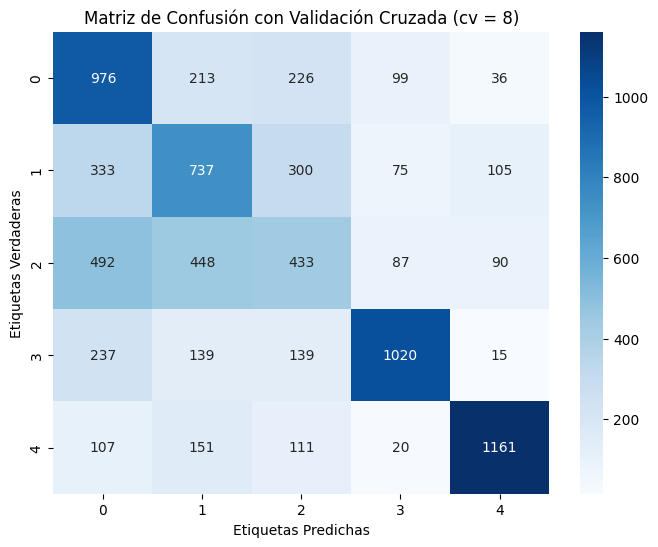

Exactitud media: 0.5583225806451613
Precisión media: 0.5717884942956983
Recall media: 0.5583225806451613
Puntuación F1 media: 0.559635261551358
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_9.png


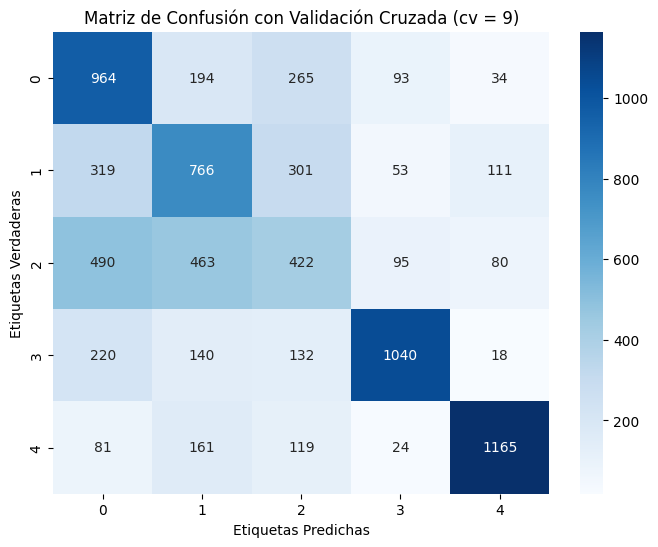

Exactitud media: 0.5621935483870968
Precisión media: 0.5748129508182278
Recall media: 0.5621935483870968
Puntuación F1 media: 0.5637592384396736
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_10.png


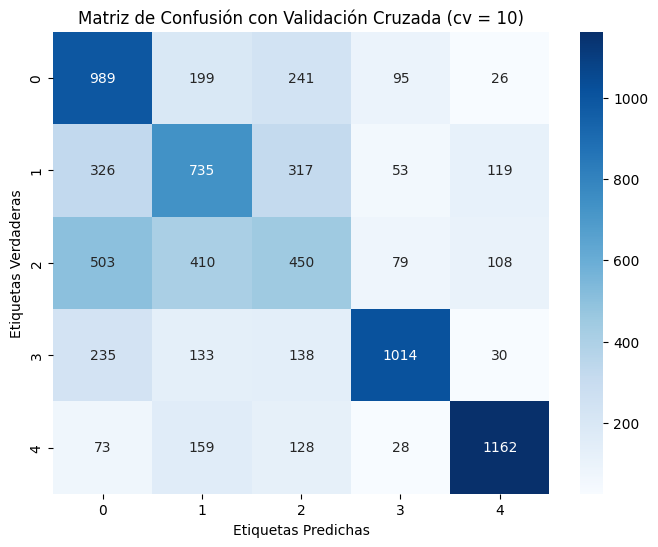

Exactitud media: 0.5612903225806452
Precisión media: 0.5741768374218572
Recall media: 0.5612903225806452
Puntuación F1 media: 0.5627078665825515
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_7_estimators/random_forest_roberta_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_sim_8_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.1.png


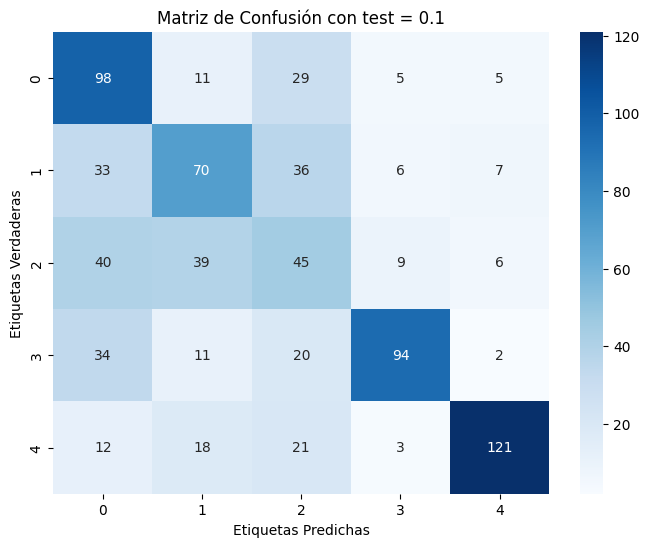

Exactitud del modelo: 0.552258064516129
Precisión del modelo: 0.592515714871152
Recall del modelo: 0.552258064516129
Puntuación F1 del modelo: 0.5628467912765495
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.2.png


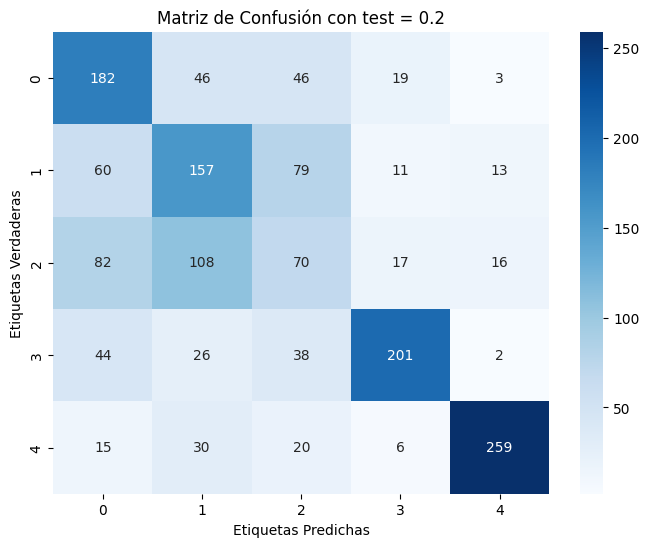

Exactitud del modelo: 0.5606451612903226
Precisión del modelo: 0.5783430154494378
Recall del modelo: 0.5606451612903226
Puntuación F1 del modelo: 0.5649855571631722
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.3.png


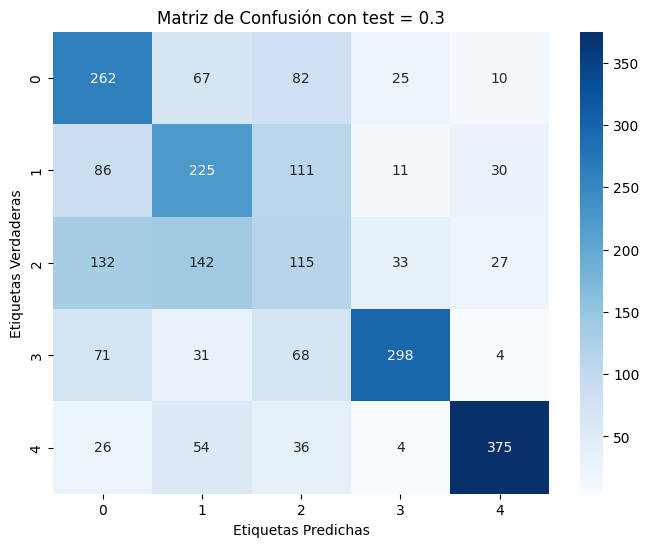

Exactitud del modelo: 0.5483870967741935
Precisión del modelo: 0.5694163070677604
Recall del modelo: 0.5483870967741935
Puntuación F1 del modelo: 0.5543187817443047
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.4.png


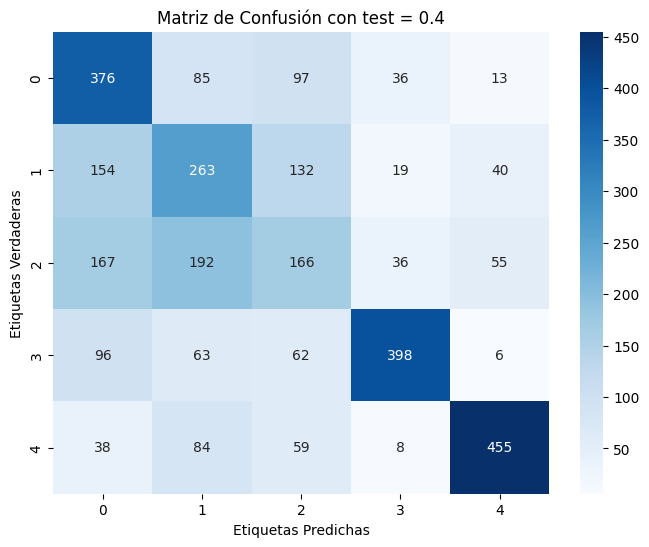

Exactitud del modelo: 0.5348387096774193
Precisión del modelo: 0.5551779114776524
Recall del modelo: 0.5348387096774193
Puntuación F1 del modelo: 0.5392217491688047
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.5.png


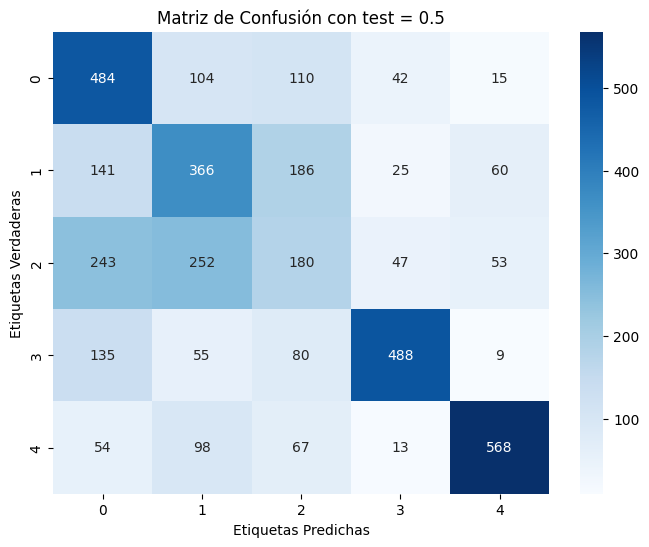

Exactitud del modelo: 0.5383225806451613
Precisión del modelo: 0.5543761273651324
Recall del modelo: 0.5383225806451613
Puntuación F1 del modelo: 0.5401170563041904
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.6.png


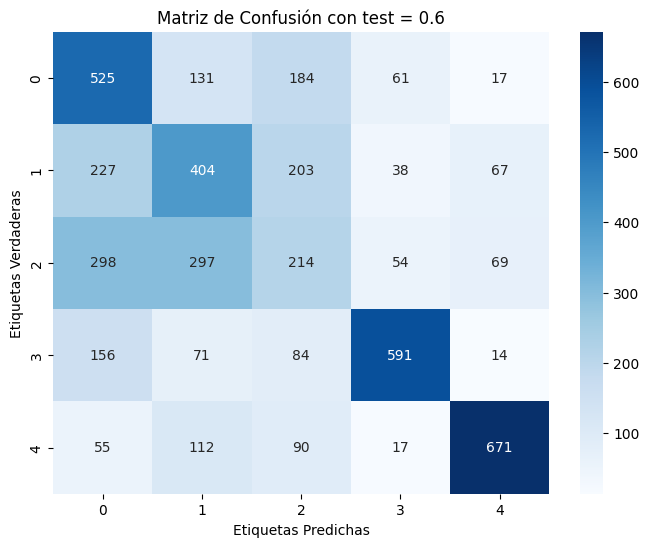

Exactitud del modelo: 0.5172043010752688
Precisión del modelo: 0.5336236127473165
Recall del modelo: 0.5172043010752688
Puntuación F1 del modelo: 0.5206924325842616
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.7.png


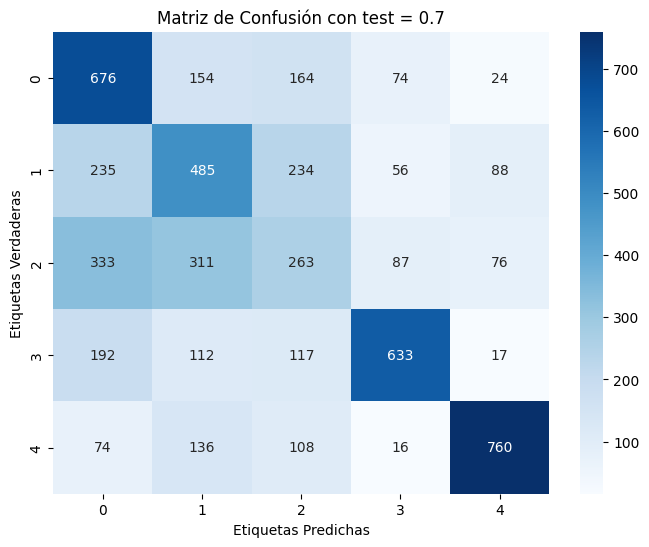

Exactitud del modelo: 0.5192626728110599
Precisión del modelo: 0.5337222506678819
Recall del modelo: 0.5192626728110599
Puntuación F1 del modelo: 0.5210374651142501
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.8.png


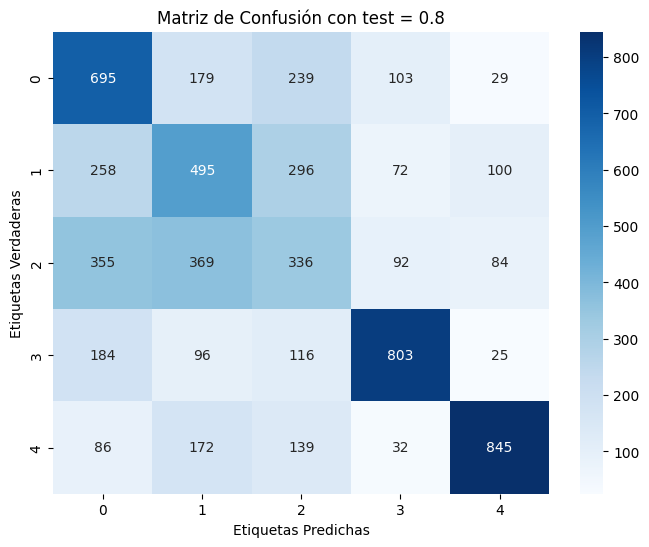

Exactitud del modelo: 0.5119354838709678
Precisión del modelo: 0.52646825573515
Recall del modelo: 0.5119354838709678
Puntuación F1 del modelo: 0.5162360629255482
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.9.png


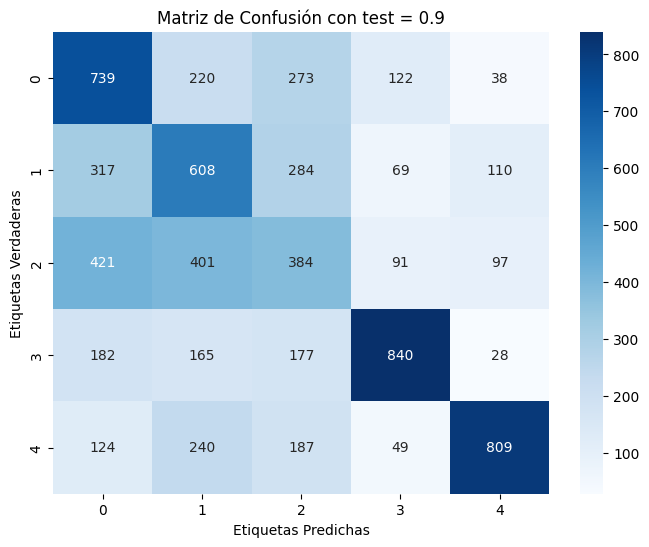

Exactitud del modelo: 0.4845878136200717
Precisión del modelo: 0.5097665202685082
Recall del modelo: 0.4845878136200717
Puntuación F1 del modelo: 0.4918698381436615
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_8_estimators/random_forest_roberta_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_cruz_8_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_2.png


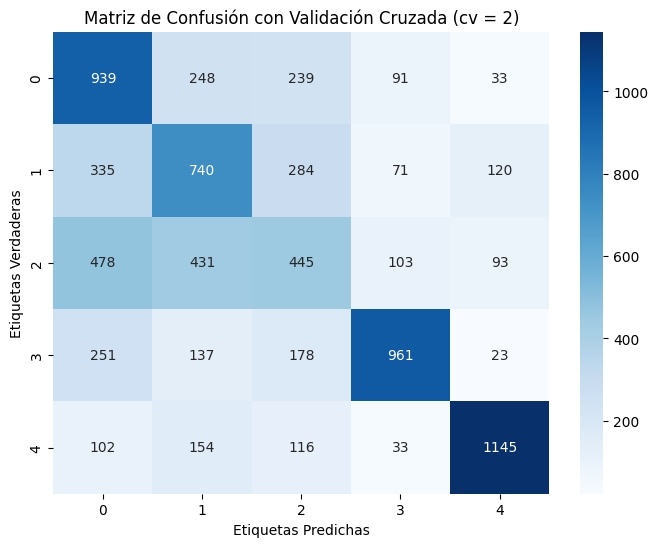

Exactitud media: 0.5458064516129032
Precisión media: 0.5609015904338309
Recall media: 0.5458064516129032
Puntuación F1 media: 0.5482277964484794
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_3.png


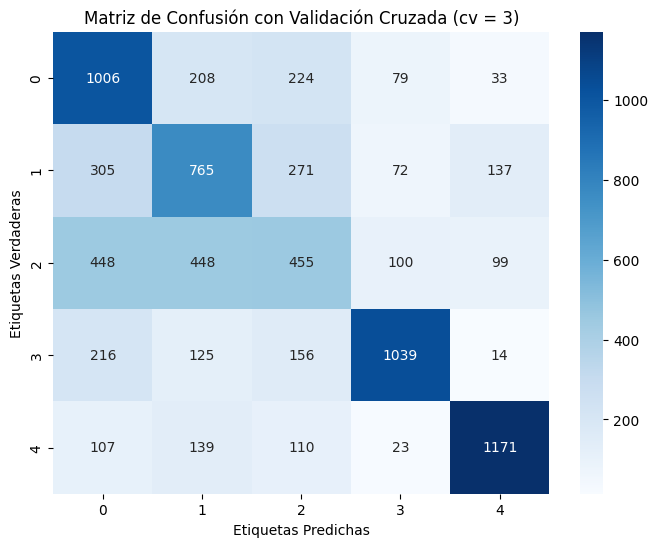

Exactitud media: 0.5723870967741935
Precisión media: 0.5816109824802074
Recall media: 0.5723870967741935
Puntuación F1 media: 0.5722702063617788
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_4.png


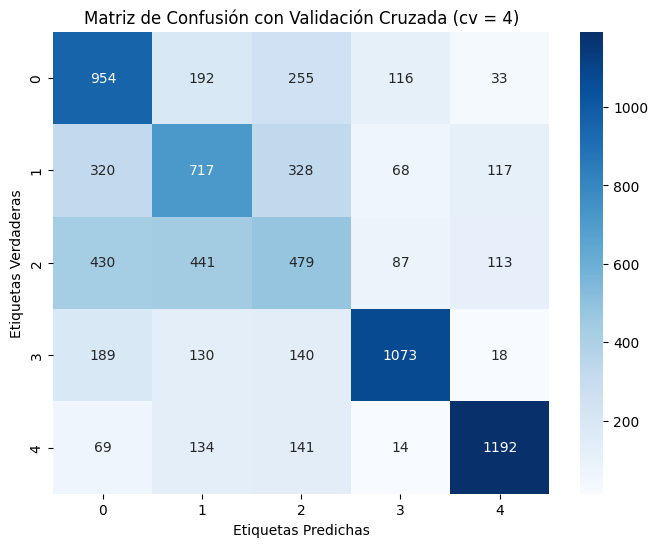

Exactitud media: 0.5696774193548387
Precisión media: 0.5773012081928227
Recall media: 0.5696774193548387
Puntuación F1 media: 0.5708465805642727
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_5.png


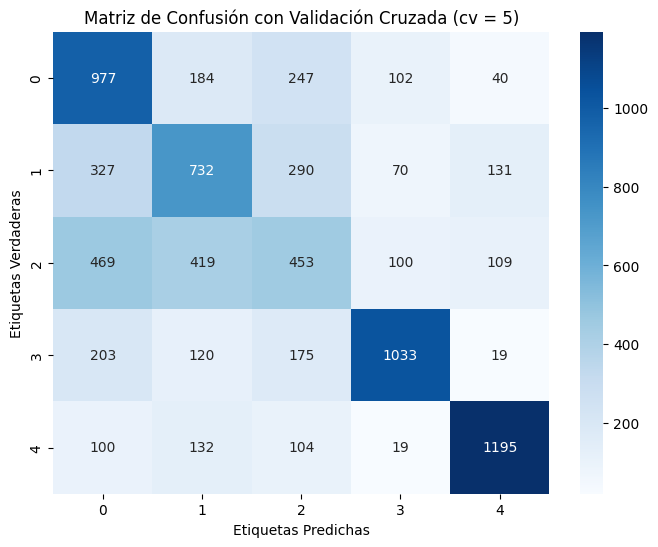

Exactitud media: 0.5664516129032258
Precisión media: 0.5737831628408862
Recall media: 0.5664516129032258
Puntuación F1 media: 0.566194831489434
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_6.png


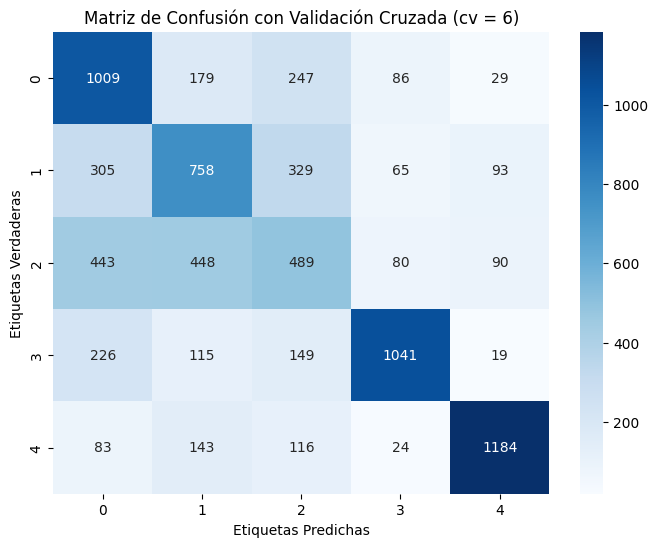

Exactitud media: 0.5781935483870968
Precisión media: 0.5914787133203465
Recall media: 0.5781935483870968
Puntuación F1 media: 0.5805302278088513
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_7.png


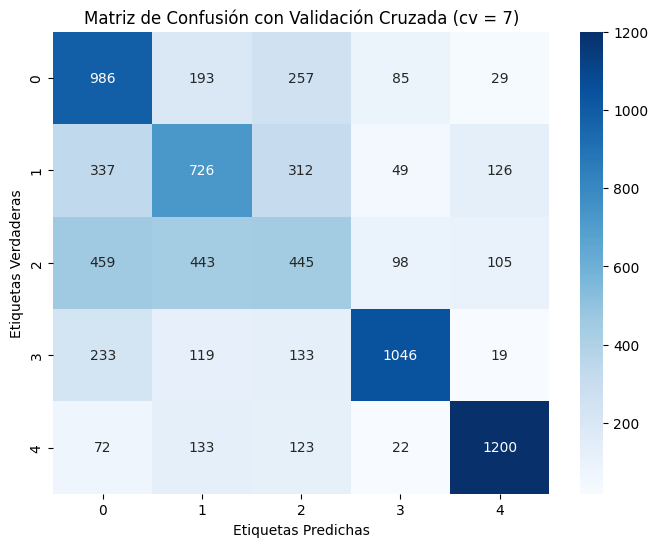

Exactitud media: 0.5681290322580645
Precisión media: 0.5777261457644902
Recall media: 0.5681290322580645
Puntuación F1 media: 0.5686193027709682
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_8.png


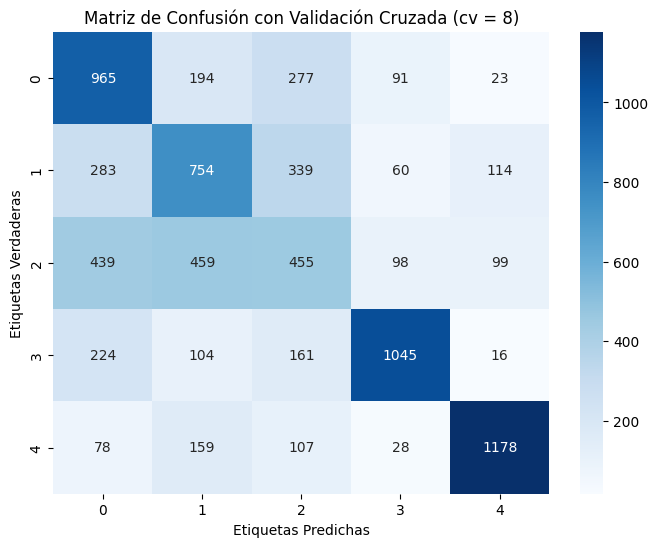

Exactitud media: 0.5673548387096774
Precisión media: 0.5781432935472259
Recall media: 0.5673548387096774
Puntuación F1 media: 0.5693965130045877
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_9.png


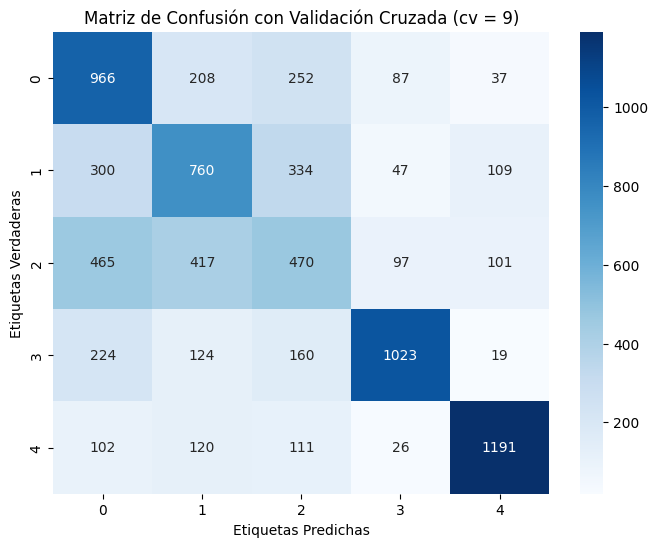

Exactitud media: 0.5690322580645162
Precisión media: 0.5813988070848687
Recall media: 0.5690322580645162
Puntuación F1 media: 0.5711224056655145
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_10.png


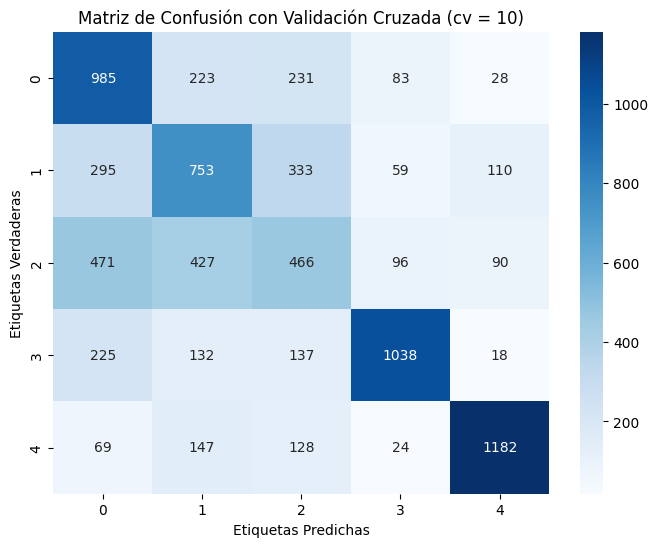

Exactitud media: 0.5708387096774193
Precisión media: 0.5830764228358067
Recall media: 0.5708387096774193
Puntuación F1 media: 0.5727566666139452
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_8_estimators/random_forest_roberta_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_sim_9_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.1.png


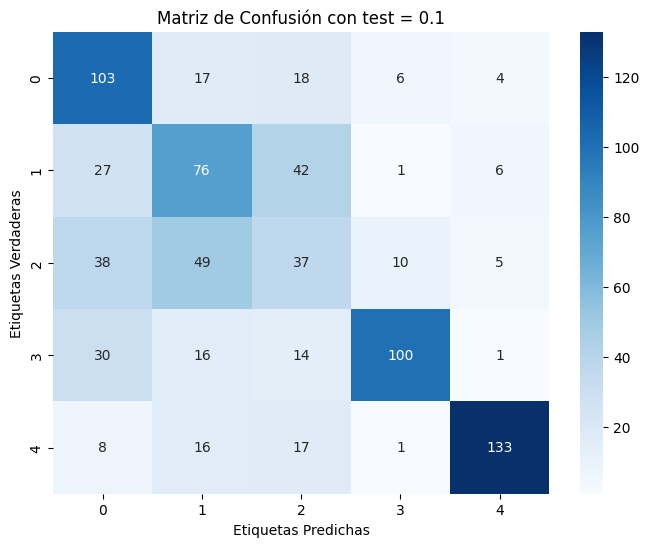

Exactitud del modelo: 0.5793548387096774
Precisión del modelo: 0.6106054500065523
Recall del modelo: 0.5793548387096774
Puntuación F1 del modelo: 0.5865868772708026
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.2.png


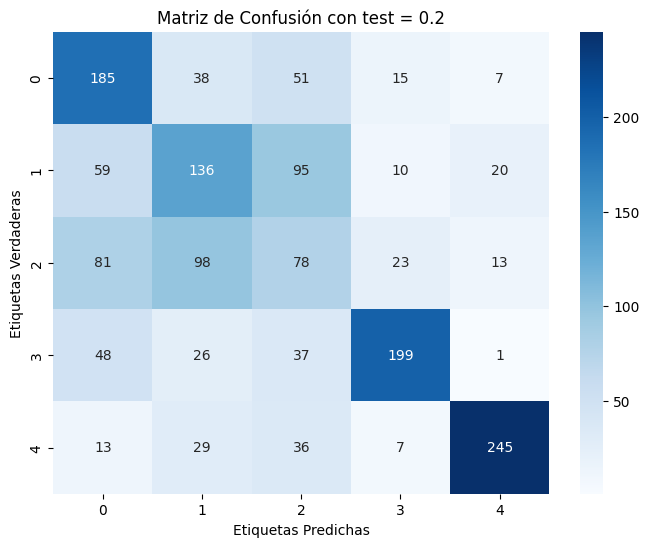

Exactitud del modelo: 0.5438709677419354
Precisión del modelo: 0.5666150019007401
Recall del modelo: 0.5438709677419354
Puntuación F1 del modelo: 0.5510725138114829
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.3.png


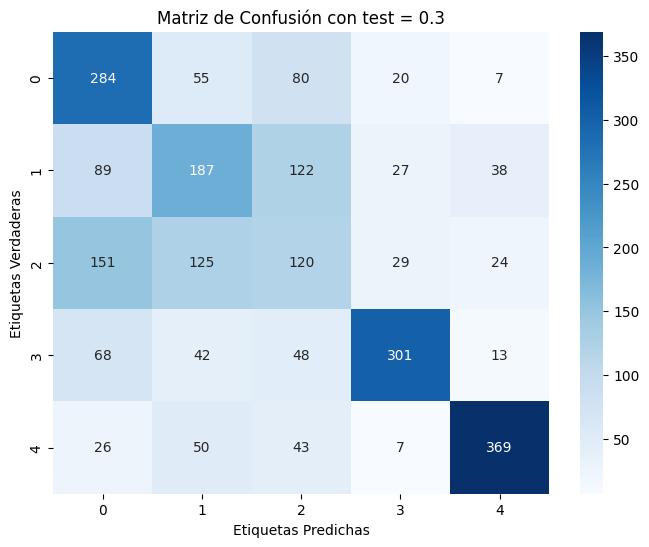

Exactitud del modelo: 0.5423655913978495
Precisión del modelo: 0.5587211929139937
Recall del modelo: 0.5423655913978495
Puntuación F1 del modelo: 0.5458149773117279
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.4.png


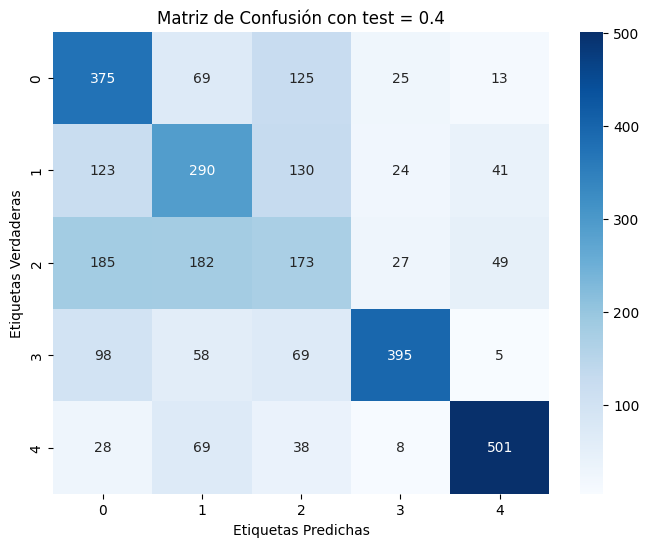

Exactitud del modelo: 0.5593548387096774
Precisión del modelo: 0.5773226664954965
Recall del modelo: 0.5593548387096774
Puntuación F1 del modelo: 0.562991689243883
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.5.png


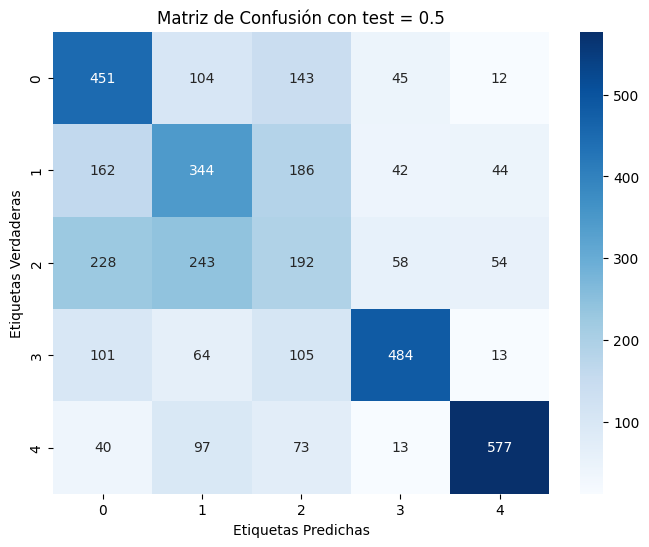

Exactitud del modelo: 0.5285161290322581
Precisión del modelo: 0.5448798373178793
Recall del modelo: 0.5285161290322581
Puntuación F1 del modelo: 0.5328382865892023
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.6.png


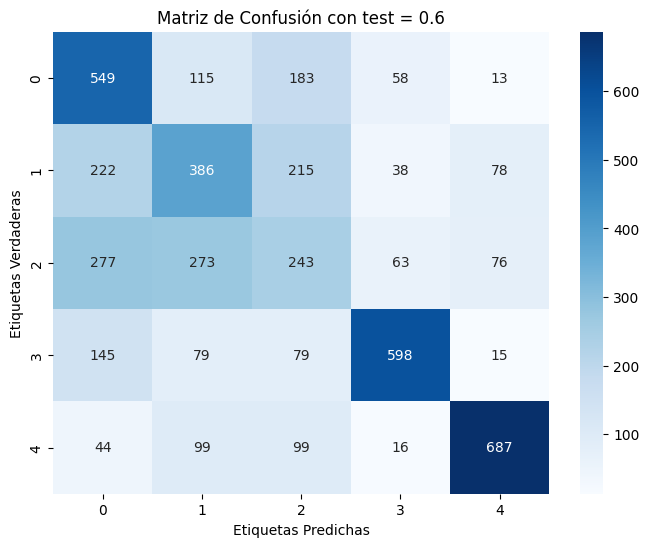

Exactitud del modelo: 0.5296774193548387
Precisión del modelo: 0.5420189778542535
Recall del modelo: 0.5296774193548387
Puntuación F1 del modelo: 0.5320803757528898
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.7.png


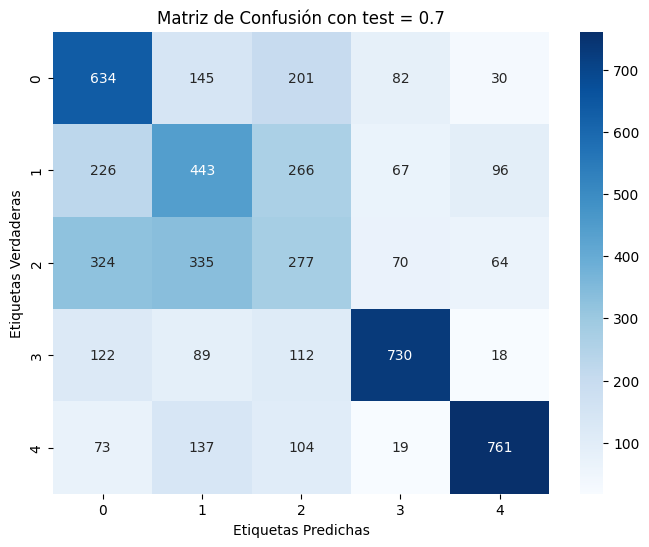

Exactitud del modelo: 0.5244239631336406
Precisión del modelo: 0.5347411970258169
Recall del modelo: 0.5244239631336406
Puntuación F1 del modelo: 0.5270605847549782
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.8.png


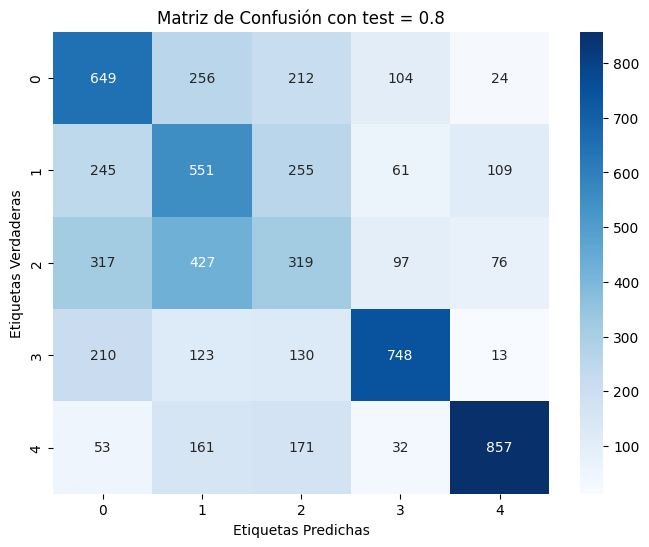

Exactitud del modelo: 0.5038709677419355
Precisión del modelo: 0.5233261831234907
Recall del modelo: 0.5038709677419355
Puntuación F1 del modelo: 0.5098634925766328
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.9.png


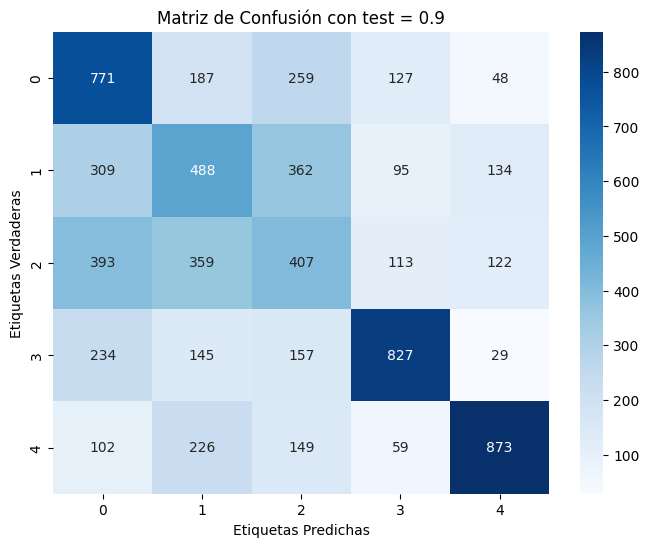

Exactitud del modelo: 0.48258064516129034
Precisión del modelo: 0.49655100395661744
Recall del modelo: 0.48258064516129034
Puntuación F1 del modelo: 0.4865136205143359
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_9_estimators/random_forest_roberta_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_cruz_9_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_2.png


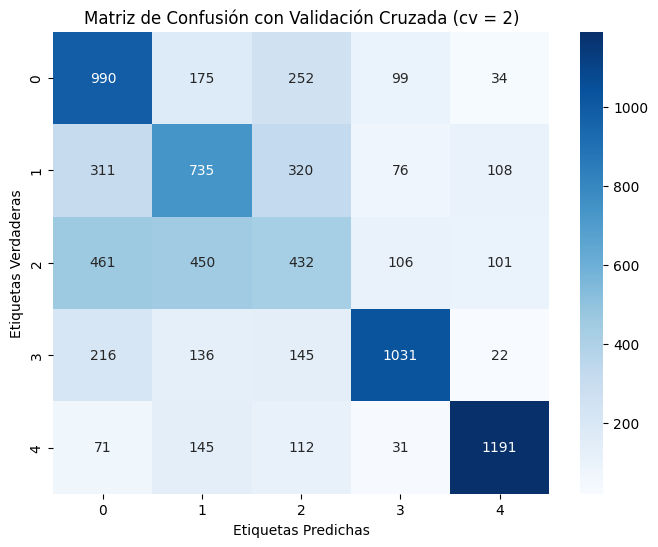

Exactitud media: 0.5650322580645162
Precisión media: 0.5718648371807323
Recall media: 0.5650322580645162
Puntuación F1 media: 0.5646714958326751
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_3.png


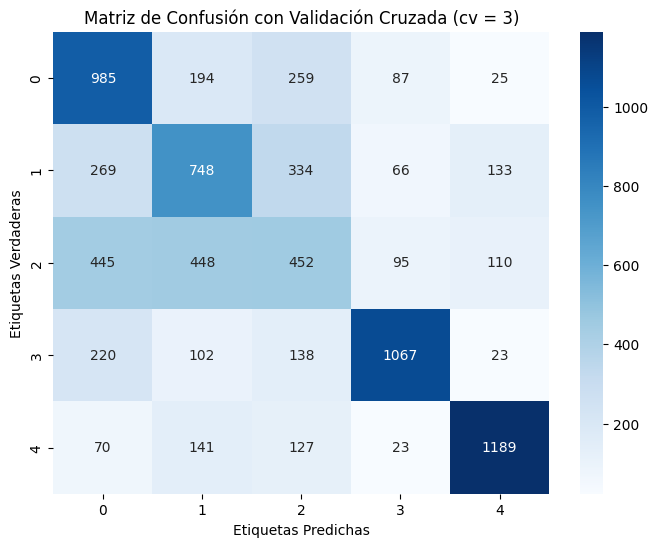

Exactitud media: 0.5730322580645161
Precisión media: 0.5798303669031096
Recall media: 0.5730322580645161
Puntuación F1 media: 0.57329466919701
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_4.png


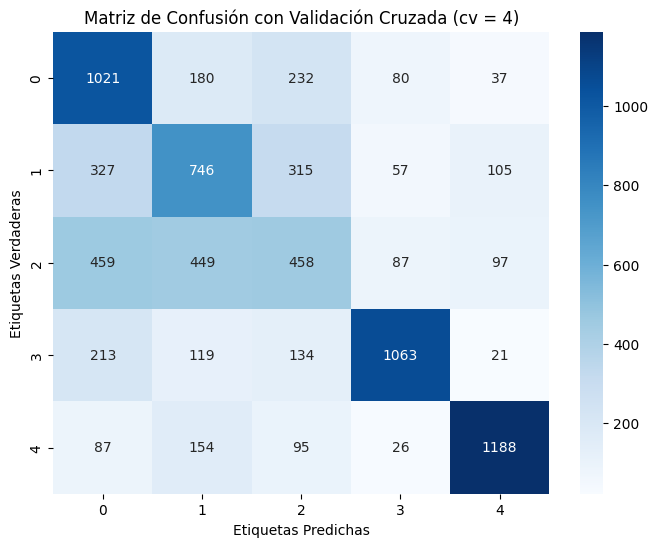

Exactitud media: 0.5775483870967741
Precisión media: 0.5876868381774429
Recall media: 0.5775483870967741
Puntuación F1 media: 0.5778103663362673
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_5.png


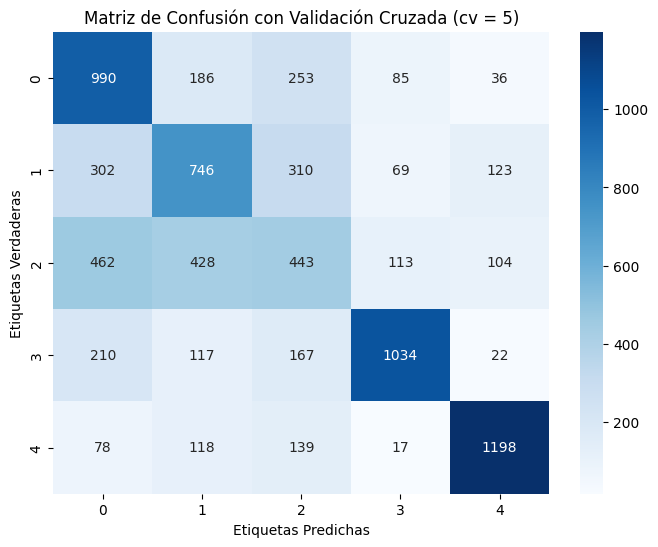

Exactitud media: 0.5691612903225807
Precisión media: 0.5765053656732779
Recall media: 0.5691612903225807
Puntuación F1 media: 0.5692478754431558
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_6.png


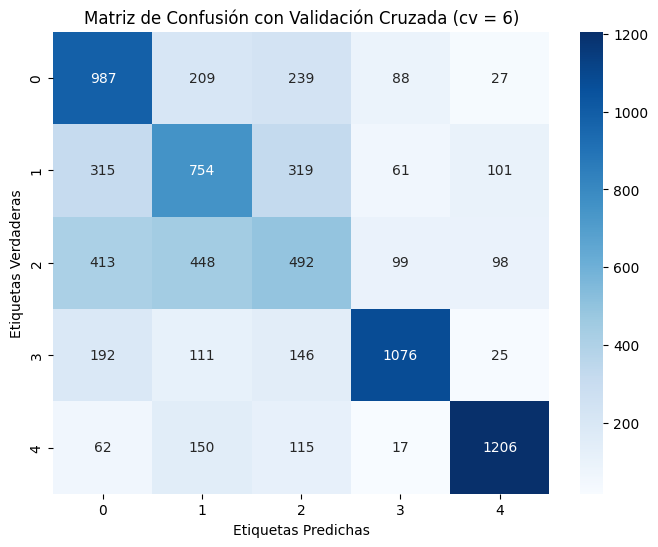

Exactitud media: 0.5825806451612904
Precisión media: 0.5915254293147714
Recall media: 0.5825806451612904
Puntuación F1 media: 0.5838860512677583
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_7.png


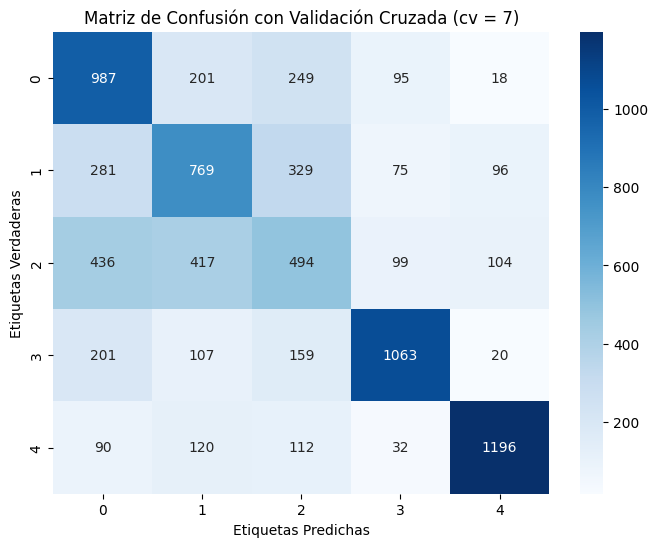

Exactitud media: 0.5818064516129032
Precisión media: 0.5904764515702263
Recall media: 0.5818064516129032
Puntuación F1 media: 0.5831276165915709
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_8.png


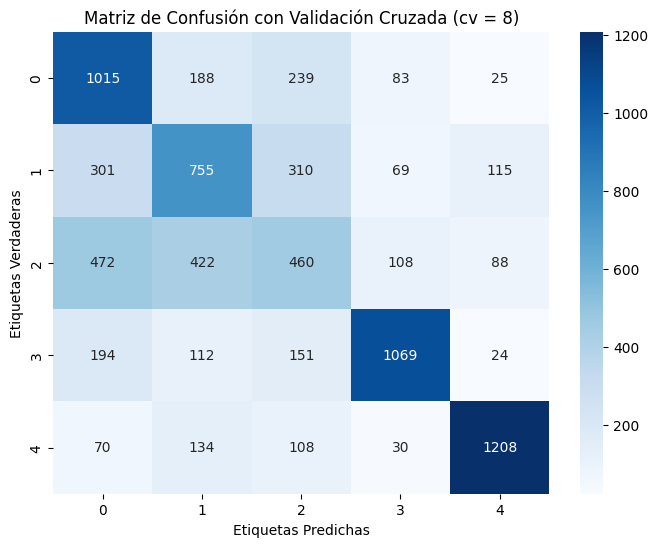

Exactitud media: 0.5815483870967741
Precisión media: 0.588014694426835
Recall media: 0.5815483870967741
Puntuación F1 media: 0.5810727346116017
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_9.png


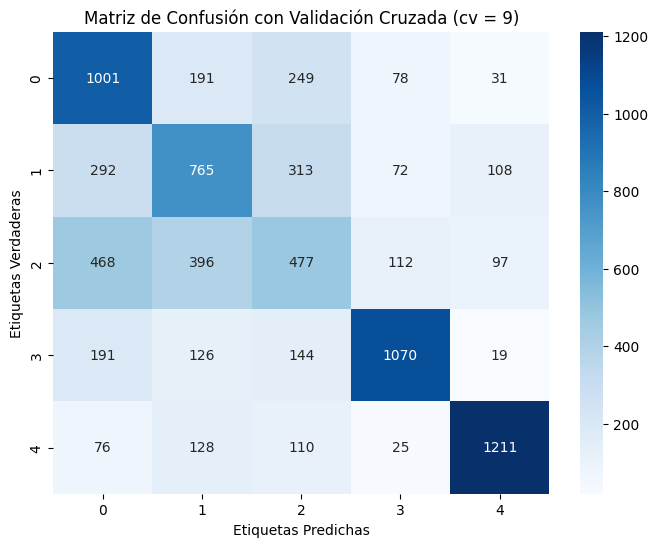

Exactitud media: 0.583741935483871
Precisión media: 0.5906798675889076
Recall media: 0.583741935483871
Puntuación F1 media: 0.5838173748400436
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_10.png


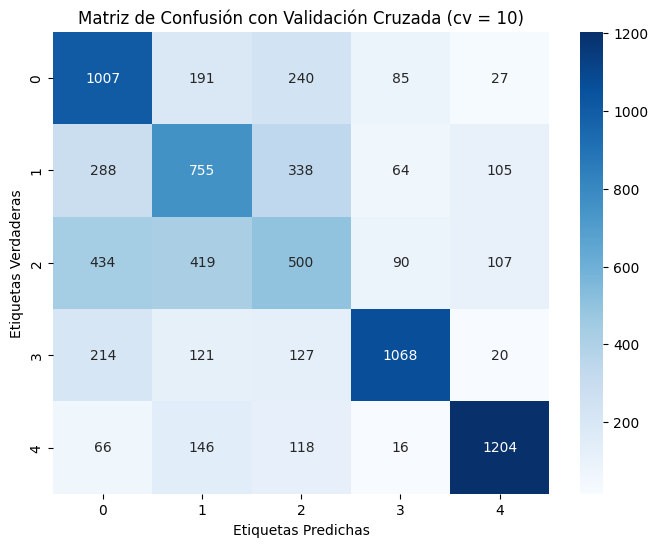

Exactitud media: 0.5850322580645161
Precisión media: 0.594403728316186
Recall media: 0.5850322580645161
Puntuación F1 media: 0.5862358000858529
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_9_estimators/random_forest_roberta_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_sim_10_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.1.png


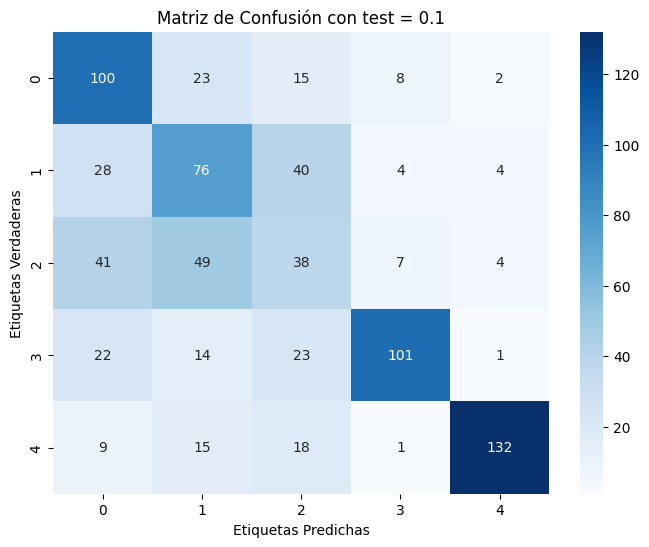

Exactitud del modelo: 0.5767741935483871
Precisión del modelo: 0.6124004367244551
Recall del modelo: 0.5767741935483871
Puntuación F1 del modelo: 0.5865646786776424
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.2.png


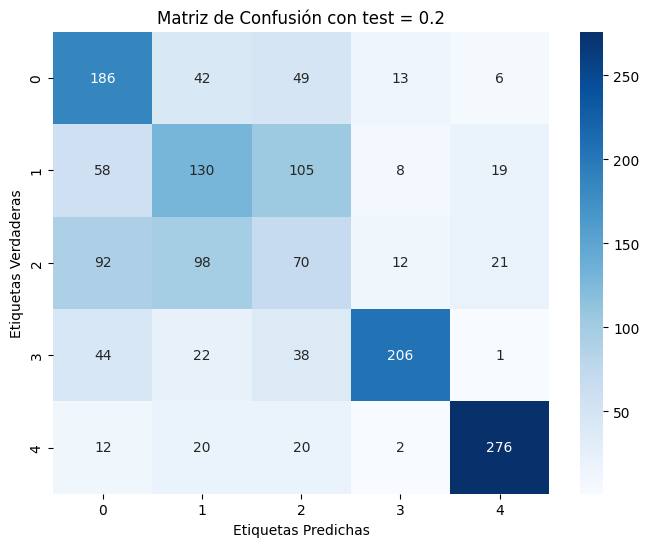

Exactitud del modelo: 0.56
Precisión del modelo: 0.5769859731767376
Recall del modelo: 0.56
Puntuación F1 del modelo: 0.5639439048144516
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.3.png


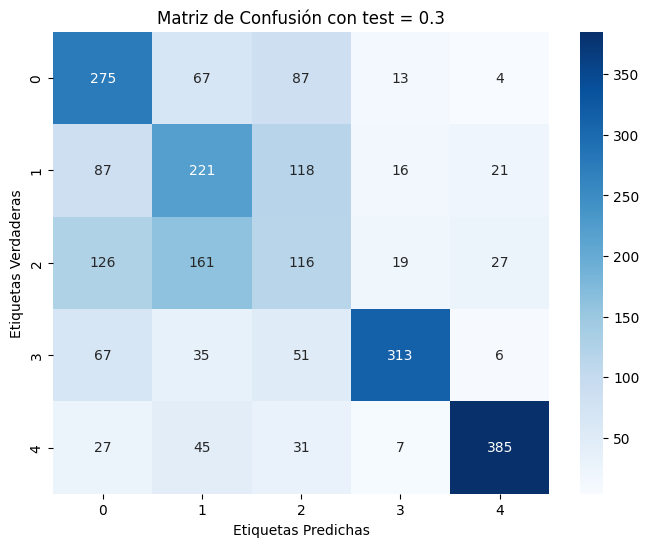

Exactitud del modelo: 0.5634408602150538
Precisión del modelo: 0.5871204915718365
Recall del modelo: 0.5634408602150538
Puntuación F1 del modelo: 0.5700101605776929
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.4.png


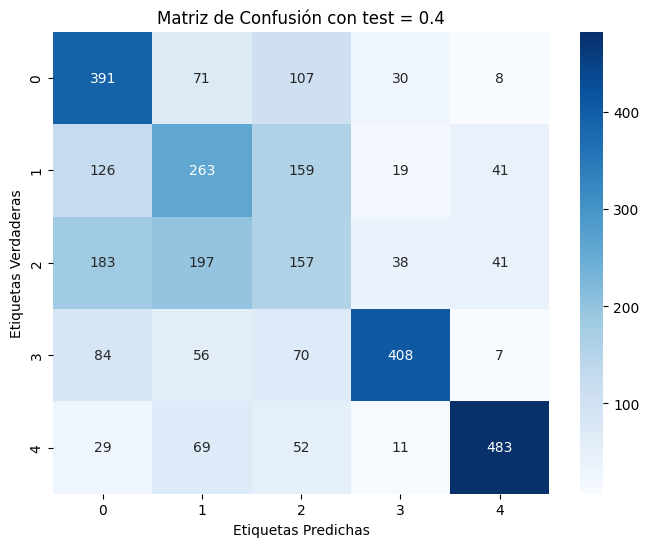

Exactitud del modelo: 0.5490322580645162
Precisión del modelo: 0.5656083415285617
Recall del modelo: 0.5490322580645162
Puntuación F1 del modelo: 0.5526047138055643
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.5.png


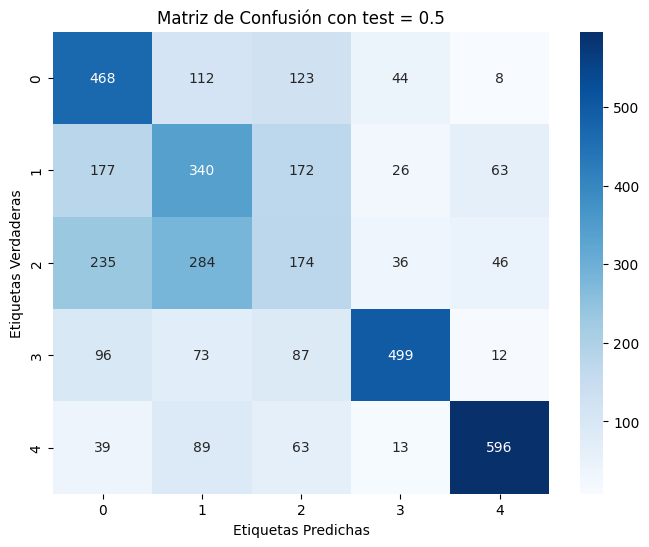

Exactitud del modelo: 0.536
Precisión del modelo: 0.5516127832890385
Recall del modelo: 0.536
Puntuación F1 del modelo: 0.538419894897241
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.6.png


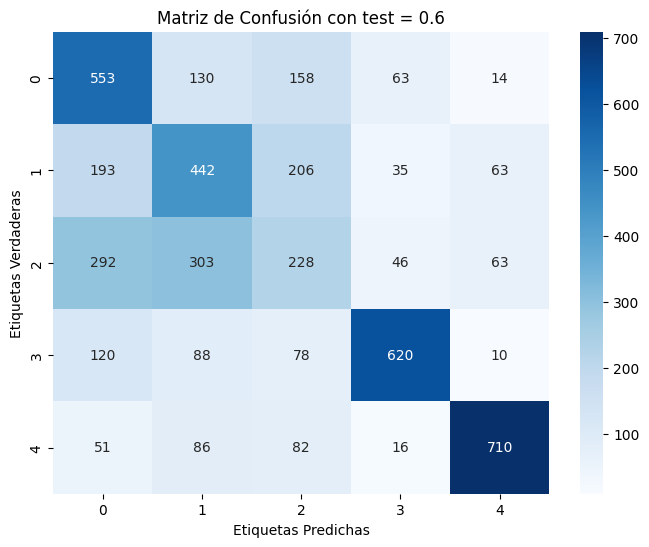

Exactitud del modelo: 0.5490322580645162
Precisión del modelo: 0.5605157696155295
Recall del modelo: 0.5490322580645162
Puntuación F1 del modelo: 0.5506254680221586
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.7.png


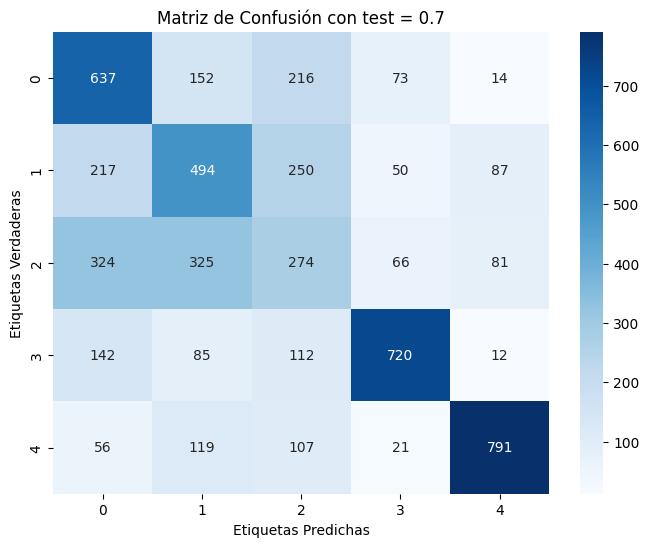

Exactitud del modelo: 0.5375115207373272
Precisión del modelo: 0.5494121571549399
Recall del modelo: 0.5375115207373272
Puntuación F1 del modelo: 0.5406745608706726
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.8.png


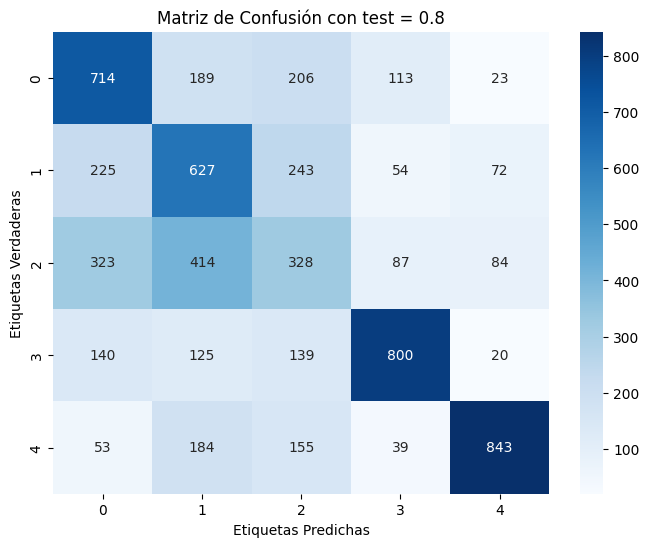

Exactitud del modelo: 0.5341935483870968
Precisión del modelo: 0.5505646613444745
Recall del modelo: 0.5341935483870968
Puntuación F1 del modelo: 0.53828401579251
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.9.png


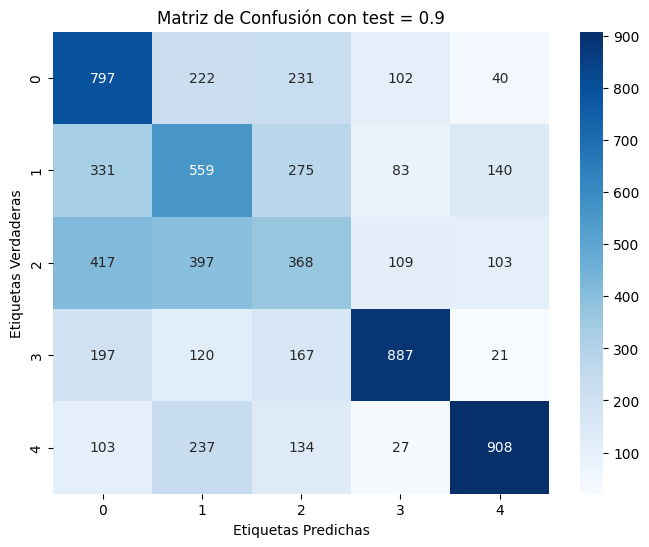

Exactitud del modelo: 0.5045161290322581
Precisión del modelo: 0.5191488569600571
Recall del modelo: 0.5045161290322581
Puntuación F1 del modelo: 0.5077766689973131
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_sim_10_estimators/random_forest_roberta_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta Random_Forest_val_cruz_10_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_2.png


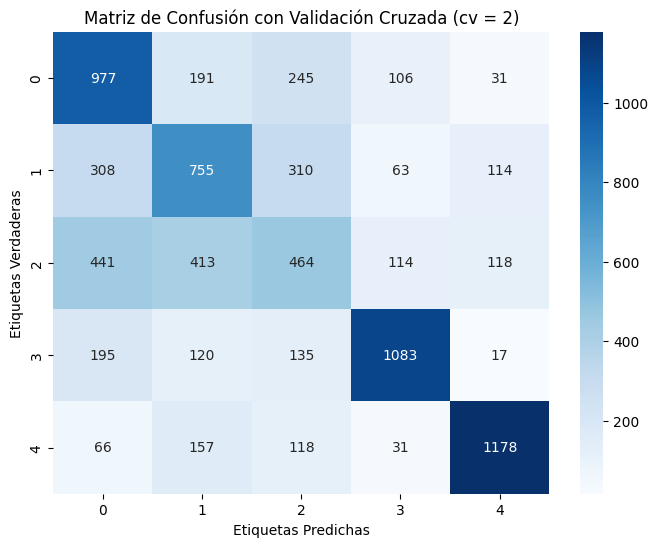

Exactitud media: 0.5750967741935484
Precisión media: 0.5802312173080837
Recall media: 0.5750967741935484
Puntuación F1 media: 0.5746936604311883
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_3.png


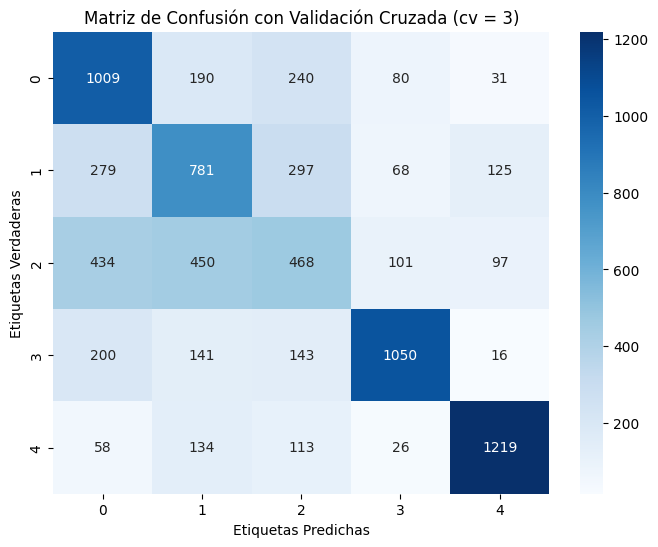

Exactitud media: 0.5841290322580646
Precisión media: 0.5905797047059181
Recall media: 0.5841290322580646
Puntuación F1 media: 0.5837586089499551
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_4.png


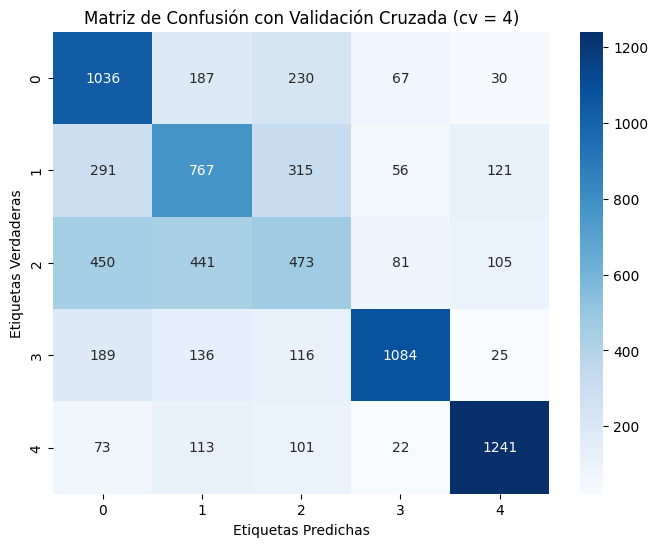

Exactitud media: 0.5936774193548388
Precisión media: 0.6000977177800308
Recall media: 0.5936774193548388
Puntuación F1 media: 0.592651322162642
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_5.png


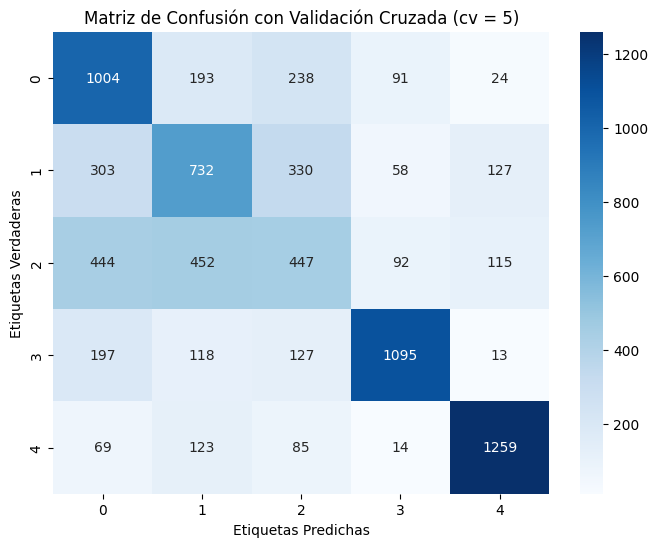

Exactitud media: 0.5854193548387097
Precisión media: 0.5888378430531156
Recall media: 0.5854193548387097
Puntuación F1 media: 0.5835152634598388
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_6.png


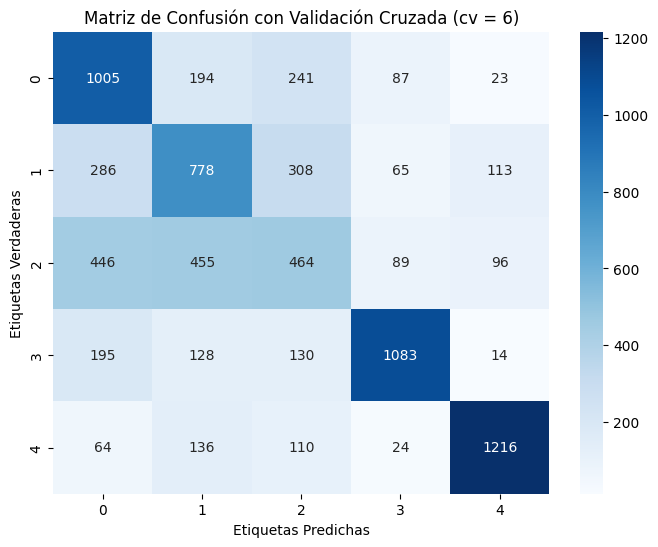

Exactitud media: 0.5865806451612903
Precisión media: 0.5938101734555797
Recall media: 0.5865806451612903
Puntuación F1 media: 0.5865714766164087
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_7.png


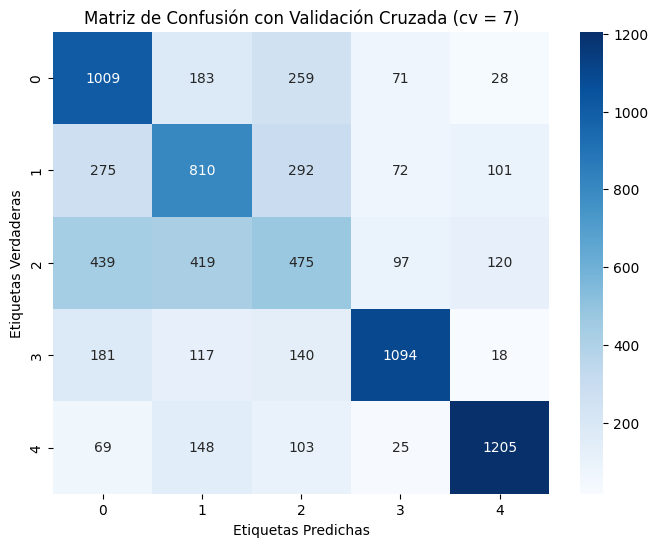

Exactitud media: 0.5926451612903226
Precisión media: 0.5984675220801812
Recall media: 0.5926451612903226
Puntuación F1 media: 0.5922908141785531
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_8.png


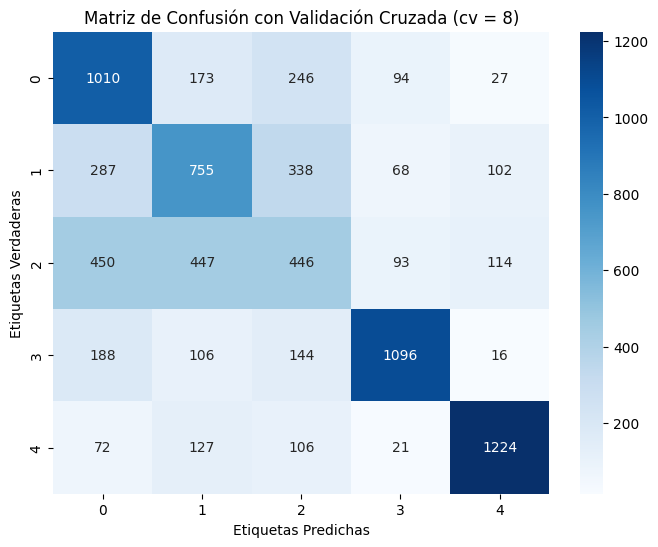

Exactitud media: 0.5846451612903226
Precisión media: 0.5890782718474527
Recall media: 0.5846451612903226
Puntuación F1 media: 0.5837064289875129
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_9.png


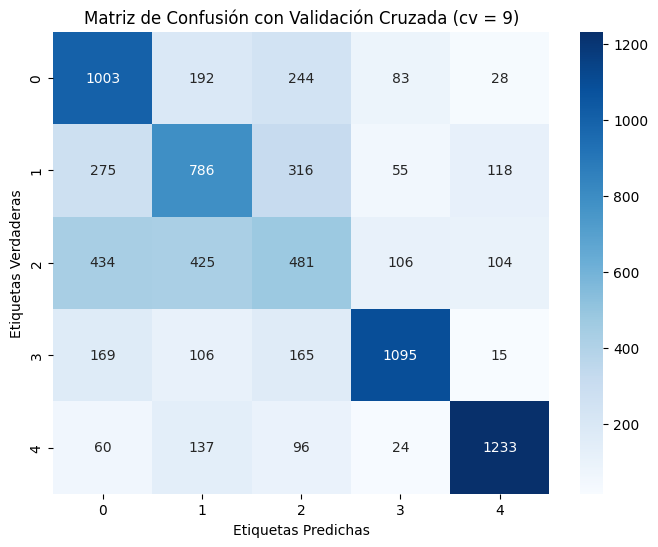

Exactitud media: 0.5932903225806452
Precisión media: 0.598033845057796
Recall media: 0.5932903225806452
Puntuación F1 media: 0.5929299640644098
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_10.png


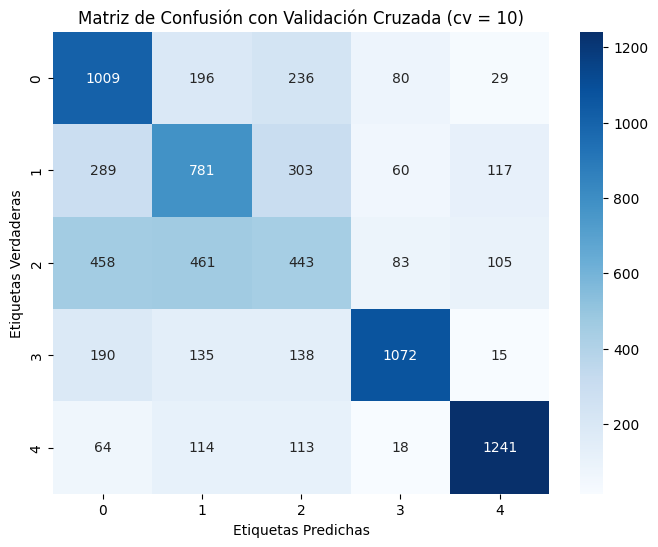

Exactitud media: 0.5865806451612903
Precisión media: 0.5928339166418779
Recall media: 0.5865806451612903
Puntuación F1 media: 0.5857065810901966
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/Random_Forest_val_cruz_10_estimators/random_forest_roberta_embedding_val_cruz.json


In [4]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/random_forest_roberta_embedding_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/random_forest_roberta_embedding_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}
for h in range(1,11):
    experimento = 1
    for i in lista_valores:
        resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = random_forest_classification(datos,h,test_size_1=i)
        experimento = experimento + 1
    
    almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)
    
    lista = list(range(2, 11))
    for j in lista:
        resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = random_forest_classification(datos,h,cv=j)
    
    almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)